# COMP 641 Group Programming Project    

**Project Title:** Predicting 30-Day Readmission in Diabetes Patients    

__________________________________________________________________________________________________________________
**Group Members:**  
Aaron Hofman  
Arunachalesh M Kembhavimath  
Phone Pyae Zaw  
Jaztin Tabunda  

__________________________________________________________________________________________________________________

## Data Science Project Instructions – Master’s Program

Course Title: COMP 641 – Fundamentals of Data Science
Project Title:  End to End Data Science Project
Due Date: December 12, 2025

Overview
This project is a capstone-style assignment designed to apply the core concepts of data science covered throughout the course. You will identify a real-world problem, acquire and prepare data, conduct exploratory and statistical analysis, build and evaluate models, and present your findings in both technical and non-technical formats.

Objectives
By completing this project you will:
        Frame a real-world problem in data science terms.
        Collect, clean, and analyze data.
        Apply data science methods (EDA, modeling, evaluation).
        Communicate results effectively to stakeholders.
        Practice reproducibility and ethical data practices.

Proposal  Submission: (Due: Week 3)

Submit a one-page proposal including:
1. Project title and team members
2. Problem statement
3. Source of data (must be accessible)
4. Planned methods/techniques (e.g., regression, classification, clustering)
5. Ethical considerations

Project Components

Data Collection & Cleaning

    Students must acquire data from a reliable source, such as public datasets, APIs, or through web scraping techniques.
    Any challenges encountered during the data sourcing process should be clearly documented and explained.
    Students must clean and preprocess the data, including handling missing values and performing appropriate feature engineering steps.

Exploratory Data Analysis (EDA)

    Students are required to visualize data trends, identify outliers, and explore data distributions to gain insight into the dataset.
    At least three visualizations must be included, using tools such as matplotlib, seaborn, or similar libraries.
    A written narrative must accompany the visualizations, summarizing key findings from the exploratory analysis.

Modeling & Analysis

    Students must choose appropriate machine learning models based on the nature of their problem, such as regression, clustering, or classification.
    The dataset should be split into training and testing sets, or evaluated using cross-validation techniques.
    Model performance must be assessed using relevant evaluation metrics, such as accuracy, RMSE, or AUC.

Ethics & Bias Discussion

    Students must identify and discuss any potential biases present in the data collection process or modeling approach.
    The discussion should include the possible impact of these biases on stakeholders or end users of the system.

Presentation (Due: December 12)

Students are required to deliver a 5–10 minute in-class presentation summarizing their project. The presentation should clearly explain the problem addressed, the data used, the methods applied, and what are the key findings. Visual aids such as charts, graphs, or dashboards must be included to support the narrative. The presentation should be accessible to a broad audience and avoid excessive technical jargon.

 

Final Report (Due: December 12)

            Students must submit a technical report that is between 5 to 10 pages in length.
            The report should include an introduction and clearly framed problem statement. A detailed description of the data and methodology used must be provided in the report. Students must present and interpret the results of their analysis and modeling.


## References/Sources

Dataset Files  
https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008  

ICD9 Codes  
https://www.aapc.com/codes/icd9-codes-range/  
https://www.aapc.com/codes/icd9-codes-range/136/  
https://www.aapc.com/codes/icd9-codes-range/152/  

## Project Environment Preparation

### Project Imports:

In [8]:
# from ucimlrepo import fetch_ucirepo
import pandas as pd
import os
from tqdm.auto import tqdm
import numpy as np

# for EDA visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# for machine learning model
from sklearn.linear_model import LogisticRegression      
from sklearn.model_selection import train_test_split

# for logistic regression test analysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# for finding the path in the project directory
from pathlib import Path

### Preparing CSV File paths for loading and Output Purposes:

This is just to set up the paths where we will be saving the encoded dataset for the model and the place where the csv file is

In [11]:
# Location of diabetic_data.csv.
# "<insert file path of csv file/dataset>"
import_df_location = "C:\\Users\\Jaztin T\\Downloads\\COMP-641-ProjectJupyterNotebook\\diabetic_data.csv"
# Locations for output files.
# "<insert file path of where you want output files to be>"
file_save_loaction = "C:\\Users\\Jaztin T\\Downloads\\COMP-641-ProjectJupyterNotebook"

# File location provided check.
if (import_df_location == ""):
    raise ValueError("import_df_location cannot be empty.")
if (file_save_loaction == ""):
    raise ValueError("file_save_loaction cannot be empty.")

### Setting up Variables for Output Text Information Files:

The following variables are used to produce the Output text files at the end of the notebook file

In [14]:
# Output text.
list_of_unique_and_nunique = ""
check_duplicates_in_first_two = ""
replacing_race_with_integers = ""
replacing_gender_with_integers = ""
replace_age_categories_with_integers = ""
removing_weight_column = ""
condensed_insurance_information = ""
replacing_medical_specialty_with_integers = ""
replacing_diagnoses_codes_with_integers = ""
replacing_medication_used_indication_with_integers = ""
replacing_max_glu_serum_with_integers = ""
replacing_A1Cresult_with_integers = ""
replacing_change_with_integers = ""
replacing_diabetesMed_with_integers = ""
replacing_readmitted_with_integers = ""

## Data Collection & Cleaning

### Data Loading 

The Main Diabetes Dataset is from diabetic_data.csv. This includes the information on hospital readmissions and patients.    

The other datasets are originally from the IDS_mapping.csv  file. These datasets have the meaning of some columns values in the Main Diabetes Dataset. They were split from the IDS_mapping.csv to their own .csv files. Then they were loaded in to their respective dataframes for ease of use later in the EDA stage.

In [18]:
# Importing datasets and loading them into their respective dataframes (Assuming it's in the same directory as jupyter notebook file)
# Main Diabetes dataset
DiabetesDF = pd.read_csv('diabetic_data.csv')

# Admission Source Type dataset. Derived from IDS_mapping.csv
# combined with the main diabetes dataset, one can tell the origin of the patient prior to hospital admission
admissionSourceDF = pd.read_csv('admission_source_types.csv')

# Admission Type dataset. Derived from IDS_mapping.csv
# combined with the main diabetes dataset, one can tell the patient's type of visit to the hospital (e.g. urgent, emergency, elective)
admissionTypeDF = pd.read_csv('admission_type.csv')

# Discharge disposition type dataset. Derived from IDS_mapping.csv
# combined with the main diabetes dataset, one can tell where the patient went after discharge from hospital
dischargeDispositionDF = pd.read_csv('discharge_disposition.csv')

# dictionary of dataframes in case we want to loop through each dataframe later
dataFrames = {
    "Diabetes Dataset": DiabetesDF,
    "Admission Source Dataset": admissionSourceDF,
    "Admission Type Dataset": admissionTypeDF,
    "Discharge Disposition Dataset": dischargeDispositionDF
}

### Data Initial Inspection - Seeing what we are dealing with

#### Summary/Overview of Each Dataframe (Prior to Cleaning)

In [21]:
# for each dataframe we have, we'll get a brief summary
for name, dataFrame in dataFrames.items():
    print(name + "----------------------------------------------\n")
    print(dataFrame.info())
    print("----------------------------------------------\n")

Diabetes Dataset----------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 


Looking at each dataset, we find information regarding each dataset's features, data types, number of rows/entries, number of columns, and whether or not the datasets contain 'null' values. Firstly, one can see that the shape (rows x columns) of the diabetes dataset is 101766 rows/entries by 50 columns/features. The dataset contains demographics, encounters, and lab results, with values stored as integers and objects/strings. Besides this, at a glance, one may notice that most columns in the diabetes dataset have "non-null" values in them. However, there are still columns in the dataset that contain "null" values. Namely, **max_glu_serum** and **A1Cresult** clearly have null values in their columns. To go into specifics, **max_glu_serum** has 5346 non-null values and **A1Cresult** has 17018 non-null values out of the 101766 rows/entries. Besides the main diabetes dataset, it's important to note that we have 1 'null' value in every other dataset's "description" column. In other words, once we merge the mapping datasets to the main diabetes dataset, one would most likely find more null values

#### Descriptive Statistics of the Diabetes Dataset (Prior to Cleaning)

In [24]:
# we'll look at the numerical and categorical stats for the Diabetes DF 
print("Diabetes DF's numerical stats ----------------------------------------------\n")
print(DiabetesDF.describe())
print("\nDiabetes DF's categorical stats ----------------------------------------------\n")
# ensure we show the descriptive statistics for all columns
pd.set_option('display.max_columns', None)
print(DiabetesDF.describe(include="object"))
print("----------------------------------------------\n")

Diabetes DF's numerical stats ----------------------------------------------

       encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.0

Looking at the descriptive statistics for the numerical and categorical data, we can list some of the visible observations and problems with the dataset.    

Observations:
- There are 8 categories for admission type
- There are 28 categories for discharge disposition types
- There are 25 categories for admission source type
- The minimum number of days a patient is in the hospital is 1 day. The maximum number of days is 14 days. The average is about 4 (mean = 4.395).
- The min number of lab procedures in one visit is 1. The max is 132 lab procedures in one visit. The average is about 43 (mean = 43.09).
- The min number of procedures besides lab procedures in one visit is 0. The max is 6. The average is about 1 (mean = 1.339).
- The min number of medications administered at the time of encounter is 0. The max is 81. The average is about 16 (mean = 16.021). 
- The min number of outpatient visits of the patient in the year preceding the encounter is 0. The max is 42. The average is about 0 (mean = 0.369). 
- The min number of emergency visits of the patient in the year preceding the encounter is 0. The max is 76. The average is about 0 (mean = 0.197).
- The min number of inpatient visits of the patient in the year preceding the encounter is 0. The max is 21. The average is about 0 (mean = 0.635).
- The min number of diagnoses at the time of encounter is 1. The max is 16. The average is about 7 (mean = 7.422).
- There are 6 different races categories
- There are 3 different gender categories
- There are 10 different age categories
- There are 10 different weight categories
- There are 18 different payer code categories
- There are 73 different medical specialty categories
- There are more than 700 different diagnostic categories for diag 1, 2 and 3
- There are 3 different categories for lab results (A1CResult, max_glu_serum)
- There is a maximum of 4 categories for drug-prescribed related columns (metformin, repaglinide, etc.)
- There are 2 different categories regarding change in diabetes prescription (change, and diabetesMed) 
- There are 3 categories for the readmitted category

Problems:
- Significant amount of Null values in A1CResult
- Significant amount of Null values in max_glu_serum
- "?" values in some columns (weight, payer_code, medical_specialty, etc.) are the most frequent occurring values. In other words, these would need to be changed to null values to properly calculate the number of null elements in the dataset. 
- Readmitted in 30 days column has 3 categories. Must convert to 2 categories (Readmitted within 30 days or not). Might involve dropping the rows or consolidating 2 categories as one.
- Examide and Citoglipton columns may be dropped since the entire dataset is one category for those columns


#### First Five Elements of each Dataset (Prior to Cleaning)

In [27]:
for name, dataFrame in dataFrames.items():
    print(name + "----------------------------------------------\n")
    print(f"{dataFrame.head(5)} \n")
    print("----------------------------------------------\n")

Diabetes Dataset----------------------------------------------

   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital payer_code         medical_specialty  num_lab_proc

Upon looking at the first five elements of each data, one can see the data we are dealing with in each column, and some obvious issues, as previously seen. One obvious issue is the fact that the first 5 rows lack a weight value in the Diabetes dataset. In other words, the weight column should most likely be excluded since it doesn't look like we can get valuable information from it. Additionally, it shows that one would have to look out for "?" values in the dataset. Besides the issues we've seen already, it looks like we'll have to look into translating the diagnostic columns/features or dropping the the columns entirely because we aren't given any other information/dataset other than that it's an ICD9 code.

#### Missing value counts per column (Prior to Cleaning)

In [30]:
for name, dataFrame in dataFrames.items():
    print(name + "'s Missing Value Counts Per Column:-------------------------------------------------------------\n")
    print(str(dataFrame.isna().sum()) + "\n")

Diabetes Dataset's Missing Value Counts Per Column:-------------------------------------------------------------

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
na

Here we have the "missing value counts per column" which will look for the number of null values in the dataset. From just glancing at the "missing value counts per column", one might come to the conclusion that only max_glu_serum (94% null) and A1Cresult (83% null) have missing values. However, as stated previously, we need to also consider that other columns in the diabetes dataset mark empty data cells with "?" mark. With that being said, merging the other datasets into the main diabetes datasets will be done to get a more accurate number of "null" values. Additionally, the count will include looking at rows with "?"

#### Looking at the options for each Category in all datasets (Prior to Cleaning)

In [33]:
for name, dataFrame in dataFrames.items():
    for column in dataFrame.select_dtypes(include=['object']):
        print(f"{column}'s categories from {name} dataset:")
        print(dataFrame[column].unique())
        print("\n")

race's categories from Diabetes Dataset dataset:
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']


gender's categories from Diabetes Dataset dataset:
['Female' 'Male' 'Unknown/Invalid']


age's categories from Diabetes Dataset dataset:
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']


weight's categories from Diabetes Dataset dataset:
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']


payer_code's categories from Diabetes Dataset dataset:
['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']


medical_specialty's categories from Diabetes Dataset dataset:
['Pediatrics-Endocrinology' '?' 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedics'
 'Gastroenterology' 'Surgery-Cardiovascular/Thoracic' 'Nephrology'
 'Orthopedics-Reconstructive' 'Psychiatry' 'Emergency/Trauma'
 'Pulmonology' 'Surgery-Neu

Looking at the options in each category, one may find more issues with the dataset.

Problems:
- **Gender** category contains 'Unknown/Invalid' category which counts as a "null" value. Most likely will change to NaN
- **Description** categories from the IDF datasets have categories that are synonymous to null ('Not Mapped', 'Not Available', 'NULL'). Most likely will change to NaN
- We see the "?" category in multiple columns again. Most likely will change to NaN
- **Discharge Disposition** contains a value that isn't a discharge. "Admitted as an inpatient to this hospital" will be handled when the categories are consolidated.
- The **medical_specialty**, and **diagnostic** (diag_1, diag_2, diag_3) categories have too many options. Most likely needs to be consolidated.
- The **readmitted** catgeories is 3 categories:  
NO - No record of readmission, >30 - Greater than 30 days readmission, <30 - Less than 30 days readmission.  
Most likely will need to make this 2 categories for the machine learning model:  
Yes - readmitted in 30 days, No - Not readmitted in 30 days. However, we can just leave it right now for EDA Visualization.  

##### For Output Text Information File

In [36]:
# Method that prints both a list of the unique elements and the number of unique elements from a provided column name.
# The user can also state when this print method was used.
def unique_element_and_count_string(column_name, before_or_after_or_empty):
    string_to_return = f"Unique Elements {before_or_after_or_empty}: {str(DiabetesDF[column_name].unique())}\n"
    string_to_return += f"Unique Element Count {before_or_after_or_empty}: {str(DiabetesDF[column_name].nunique())}\n"
    return string_to_return

column_names_list = DiabetesDF.columns.tolist()
# Save list and count of unique elements from each column.
list_of_unique_and_nunique += "List and count of unique elements from each column in dataframe.\n"
for element in column_names_list:
    list_of_unique_and_nunique += f"Column Name: {element}\n"
    list_of_unique_and_nunique += unique_element_and_count_string(element, "")
    list_of_unique_and_nunique += "\n"

#### Checking for Duplicate Entries (Prior to Cleaning)

In [38]:
# each entry in the dataset has a unique patient id and encounter id
# a duplicate entry in this case would be if there are multiple rows with the same patient id AND encounter id

# we use the duplicated method to check for any duplicates entries that have the same patient id AND encounter id. 
series = DiabetesDF.duplicated(subset=['encounter_id', 'patient_nbr'])

# any() will return true if a duplicate is found
print(series.any())


False


A duplicate entry would mean that a patient id and encounter id would be the same as a different row. A patient can come back multiple times to the same hospitals, so checking by just the patient id is not sufficient to find duplicates. In this case, there are no duplicates in the dataset.

##### For Output Text Information File

In [41]:
# Checking for duplicates in encounter_id and patient_nbr.
first_two_column_names = column_names_list[:2]
list_of_groups = []
for element in first_two_column_names:
    current_duplicate_check = DiabetesDF.groupby(element)
    list_of_groups.append(current_duplicate_check)
check_duplicates_in_first_two += "During earlier analysis, duplicate elements were found in patient_nbr.\n\n"

### Making Adjustments/Cleaning the Dataframes 

From the initial inspection of the dataset, we identified the following problems:  
- Missing/Null Values  
  - A1Cresult, weight, max_glu_serum have a large number of missing/null values  
- Categories Synonymous to Null/NaN, but not being read as Null/NaN  
  - "?", 'Unknown/Invalid', 'Not Mapped', 'Not Available', 'NULL' are used in multiple categories, but aren't appearing in the non-null count
- Columns with a high cardinality of categories  
  - admission_source, discharge_disposition, and medical_specialty have too many unique values
  - diag_1, diag_2, and diag_3 also have too many unique values 
- Columns lacking information  
  - examide and citoglipton contain only one unique value  
- Target Variable is split into 3 categories  
  - Readmitted has 3 categories: 'NO', '>30', '<30'    
 
Solutions to the aforementioned problems:
- Drop weight column since most of the weights aren't recorded. A1Cresult and max_glu_serum are important so we might keep them, but will try to work around by redfining "None" values as "No Test Taken" to signify that the values here aren't missing, rather, the patient just didn't take the tests.
- Rename the Null-Synonymous values in all columns to NaN to standardize the value for null in the dataset
- Consolidate the admission_source, discharge_disposition, medical specialty, diag_1, diag_2, and diag_3 columns
- Drop the examide and citoglipton columns
- Leave the readmitted category unchanged for now

#### Merge the IDF Mapping Datasets with the Diabetes Dataset

In [45]:
# we store the merged Diabetes dataset and the IDF mappings into a new dataframe variable in case we need to reference the original diabetes dataset 
# we merge in admissionSource
diabetes_with_idf = pd.merge(DiabetesDF, admissionSourceDF, on = 'admission_source_id')

# we merge in admission type
diabetes_with_idf = pd.merge(diabetes_with_idf, admissionTypeDF, on = 'admission_type_id')

# we merge in discharge disposition
diabetes_with_idf = pd.merge(diabetes_with_idf, dischargeDispositionDF, on = 'discharge_disposition_id')

# rename the the added columns correctly
diabetes_with_idf.rename(columns={'description_x': 'admission_source', 
                                  'description_y': 'admission_type', 'description': 'discharge_disposition'}, inplace=True)

# drop the id columns for each since we don't need it for EDA
#diabetes_with_idf.drop(columns=['admission_type_id', 'discharge_disposition_id', 'admission_source_id'], inplace=True)

print(diabetes_with_idf.head(5))

   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital payer_code         medical_specialty  num_lab_procedures  \
0                 1          ?  Pediatrics-Endocrinolo

#### Drop Columns

We drop the weight column because almost 97% of values are blank.  
We drop the Examide and Citoglipton categories because all patients in the dataset weren't prescribed Examide and Citoglipton so there is no variability in the data 

In [48]:
# Drop 'weight' column from the dataset with idf, since it doesn't give much information 
# axis = 1 basically means drop the entire column. axis = 0 means drop the rows
diabetes_with_idf.drop('weight', axis=1, inplace=True)

# Drop the Examide and Citoglipton categories because none of the patients were prescribed it
diabetes_with_idf.drop('examide', axis=1, inplace=True)
diabetes_with_idf.drop('citoglipton', axis=1, inplace=True) 

#### Replacing "None" for "No Test Taken"

We replace "None" for "No Test Taken" since these values aren't technically null. They mean that the patient wasn't given the test.

In [51]:
diabetes_with_idf['A1Cresult'] = diabetes_with_idf['A1Cresult'].replace([None, 'None'], 'No Test Taken')
diabetes_with_idf['max_glu_serum'] = diabetes_with_idf['max_glu_serum'].replace([None, 'None'], 'No Test Taken')

#### Replacing Null-Synonymous values with NaN

We replace the following values in the dataset with NaN to standardize Null values:
- '?'
- 'Unknown/Invalid'
- 'Not Mapped'
- ' Not Mapped'
- 'Not Available'
- ' Not Available'
- 'NULL'

In [54]:
diabetes_with_idf = diabetes_with_idf.replace(['?', 'Unknown/Invalid', 'Not Mapped', ' Not Mapped', 'NULL', 'Not Available', ' Not Available'], np.nan)

#### Helper Function for Consolidations

In [56]:
# helper function to do the consolidations
def map_groups(colVal):
    # if the value isn't NaN
    if not pd.isna(colVal):
        # we make sure to take into account the white space in front and trailing the string/column value
        colVal = colVal.strip()
        
        # for each grouping, we check if the passed in colVal is in the list of options for each grouping
        # if so, it will return the first match 
        for grouping, options in groupings.items():
            if colVal in options:
                return grouping
    return colVal

#### Consolidating the medical_specialty column

The medical_specialty column contains 84 distinct values. It has been consolidated to 17 categories in which related categories were grouped together. The columns are as follows:
- 'Pediatrics' 
- 'Primary Care/Internal Medicine'
- 'Cardiology/Cardiovascular' 
- 'Surgery' 
- 'Orthopedics/Musculoskeletal'
- 'Gastroenterology' 
- 'Nephrology' 
- 'Behavioral/Mental Health'
- 'Emergency/Trauma' 
- 'Obstetrics/Gynecology' 
- 'Oncology/Hematology'
- 'Other/Rare' 
- 'Endocrinology/Metabolism' 
- 'Neurology/Neurophysiology'
- 'Diagnostics/Imaging/Lab' 
- 'Infectious Disease/Immunology'

In [59]:
# This is the dictionary that contains the new groups : old options  
groupings = {
    # Pediatrics related categories
    'Pediatrics': [ 'Pediatrics', 'Pediatrics-CriticalCare', 'Pediatrics-Pulmonology', 'Pediatrics-Hematology-Oncology', 'Pediatrics-Neurology',
        'Pediatrics-EmergencyMedicine', 'Pediatrics-InfectiousDiseases', 'Pediatrics-AllergyandImmunology', 'Pediatrics-Endocrinology',
        'Anesthesiology-Pediatric', 'Psychiatry-Child/Adolescent', 'Cardiology-Pediatric'],

    # Endocrinology related categories
    'Endocrinology/Metabolism': ['Endocrinology', 'Endocrinology-Metabolism'],

    # Primary Care / Internal Medicine related categories
    'Primary Care/Internal Medicine': [ 'InternalMedicine', 'Family/GeneralPractice', 'Hospitalist', 
                                          'Osteopath', 'Resident', 'PhysicianNotFound', 'Pulmonology'],

    # Cardiology specialties related categories
    'Cardiology/Cardiovascular': ['Cardiology'],

    # Neurology/Neurophysiology related categories
    'Neurology/Neurophysiology': ['Neurology', 'Neurophysiology'],

    # Nephrology related categories
    'Nephrology': ['Nephrology'],

    # All surgery related categories
    'Surgery': ['Surgery-General', 'Surgery-Neuro', 'Surgery-Colon&Rectal', 'Surgery-Plastic', 'Surgery-Thoracic', 
                'Surgery-PlasticwithinHeadandNeck', 'Surgery-Pediatric', 'Surgery-Maxillofacial', 'Surgery-Vascular', 'Surgeon', 
                'SurgicalSpecialty', 'Surgery-Cardiovascular', 'Surgery-Cardiovascular/Thoracic', 'Urology'],

    # Infectious Disease and Immunology related categories
    'Infectious Disease/Immunology': ['InfectiousDiseases', 'AllergyandImmunology'],

    # Obstetrics/Gynecology related categories
    'Obstetrics/Gynecology': ['ObstetricsandGynecology', 'Gynecology', 'Obstetrics', 'Obsterics&Gynecology-GynecologicOnco', 'Perinatology'],

    # Oncology/Hematology related categories
    'Oncology/Hematology': ['Hematology/Oncology', 'Hematology', 'Oncology'],

    # Behavioral/Mental Health related categories
    'Behavioral/Mental Health': ['Psychiatry', 'Psychiatry-Addictive', 'Psychology'],

    # Orthopedics/Musculoskeletal related categories
    'Orthopedics/Musculoskeletal': ['Orthopedics', 'Orthopedics-Reconstructive', 'SportsMedicine', 'PhysicalMedicineandRehabilitation', 'Podiatry'],

    # Diagnostics/Imaging/Lab related categories
    'Diagnostics/Imaging/Lab': ['Radiology', 'Radiologist', 'Pathology'],
	
	# Gastroenterology related categories
	'Gastroenterology': ['Gastroenterology'],
	
	# Emergency/Trauma related categories
	'Emergency/Trauma': ['Emergency/Trauma'],

    # All other other/rare specialties 
    'Other/Rare': ['Otolaryngology', 'Speech', 'OutreachServices', 'DCPTEAM', 
                     'Proctology', 'Rheumatology', 'Dentistry', 'Dermatology', 'Anesthesiology', 'Ophthalmology']
}

# we apply the mapping and store this consolidation in a new column
diabetes_with_idf['medical_specialty_consol'] = diabetes_with_idf['medical_specialty'].apply(map_groups)

# just checking if it worked
print(diabetes_with_idf['medical_specialty_consol'].unique())
print(len(diabetes_with_idf['medical_specialty_consol'].unique()))

['Pediatrics' nan 'Primary Care/Internal Medicine'
 'Cardiology/Cardiovascular' 'Surgery' 'Orthopedics/Musculoskeletal'
 'Gastroenterology' 'Nephrology' 'Behavioral/Mental Health'
 'Emergency/Trauma' 'Obstetrics/Gynecology' 'Oncology/Hematology'
 'Other/Rare' 'Endocrinology/Metabolism' 'Neurology/Neurophysiology'
 'Diagnostics/Imaging/Lab' 'Infectious Disease/Immunology']
17


#### Consolidating diag_1, diag_2, diag_3 columns

Instead of having >800 codes to diagnose the patient being admitted, the codes are consolidated into <50 generalized categories based on their codes. 
- Numeric Codes represent: Diseases and Disorders diagnosed to patient
- V Codes represent: Reasons for a patient to come in (preventative care, routine check-ups, etc.)
- E Codes represent: External causes of Injury

All Numeric Codes will be mapped to their corresponding codes according to this source:  
- https://www.aapc.com/codes/icd9-codes-range/
  
All V Codes will be mapped to their corresponding codes according to this source:  
- https://www.aapc.com/codes/icd9-codes-range/136/
  
All E Codes will be just labeled as "E-Codes: External Causes of Injury and Poison" since they're external factors that don't usually factor in readmissions in diabetes patients

##### Helper function convert ICD-9 Diagnostic codes to the category we want

In [63]:
def icd9_to_category(code):
    # case if we find a NaN entry
    if pd.isna(code):
        return code

    # we first try to catch the codes with a V or E
    if code.startswith('V'):
        # we get the number part of the code
        code = code[1:]
        # convert it to an int for comparison purposes
        code = int(float(code))

        # converting the code to its corresponding v code
        if 1 <= code <= 6:
            return "V-Code: Communicable Disease Hazards"
        elif 7 <= code <= 9:
            return "V-Code: Isolation/Prophylactic Measures/Other Hazards"
        elif 10 <= code <= 19:
            return "V-Code: Personal/Family Health Hazards"
        elif 20 <= code <= 29:
            return "V-Code: Reproduction & Development"
        elif 30 <= code <= 39:
            return "V-Code: Type of Birth"
        elif 40 <= code <= 49:
            return "V-Code: Condition Influencing Health Status"
        elif 50 <= code <= 59:
            return "V-Code: Specific Procedures & Aftercare"
        elif 60 <= code <= 69:
            return "V-Code: Other Health Service Circumstances"
        elif 70 <= code <= 82:
            return "V-Code: Examination & Investigation (No Diagnosis)"
        elif 83 <= code <= 84:
            return "V-Code: Genetics"
        elif code == 85:
            return "V-Code: Body Mass Index"
        elif code == 86:
            return "V-Code: Estrogen Receptor Status"
        elif code == 87:
            return "V-Code: Other Personal Exposures"
        elif code == 88:
            return "V-Code: Acquired Absence of Organs/Tissue"
        elif code == 89:
            return "V-Code: Suspected Conditions Not Found"
        elif code == 90:
            return "V-Code: Retained Foreign Body"
        elif code == 91:
            return "V-Code: Multiple Gestation Placenta Status"
        else:
            return 'Other V-Code'
    elif code.startswith('E'):
        # since E codes are external causes and don't really play a role in readmissions, we won't 
        return 'E-Codes: External Causes of Injury and Poison'

    # we convert the code from a string/object to an num for comparison 
    # we don't need to get into specifics so we get the int
    code = int(float(code))

    # This performs the mapping for the codes that don't start with E or V
    if 1 <= code <= 139:
        return 'INFECTIOUS/PARASITIC'
    elif 140 <= code <= 239:
        return 'NEOPLASMS'
    elif 240 <= code <= 248:
        return 'ENDOCRINE/NUTRITIONAL/METABOLIC/IMMUNITY'
    elif 249 <= code <= 250:
        return 'Diabetes Mellitus'
    elif 251 <= code <= 279:
        return 'ENDOCRINE/NUTRITIONAL/METABOLIC/IMMUNITY'
    elif 280 <= code <= 289:
        return 'BLOOD/BLOOD-FORMING ORGANS'
    elif 290 <= code <= 319:
        return 'MENTAL/BEHAVIORAL/NEURODEVELOPMENTAL'
    elif 320 <= code <= 389:
        return 'NERVOUS SYSTEM/SENSE ORGANS'
    elif 390 <= code <= 459:
        return 'CIRCULATORY SYSTEM'
    elif 460 <= code <= 519:
        return 'RESPIRATORY SYSTEM'
    elif 520 <= code <= 579:
        return 'DIGESTIVE SYSTEM'
    elif 580 <= code <= 629:
        return 'GENITOURINARY SYSTEM'
    elif 630 <= code <= 679:
        return 'PREGNANCY/CHILDBIRTH/PUERPERIUM'
    elif 680 <= code <= 709:
        return 'SKIN/SUBCUTANEOUS TISSUE'
    elif 710 <= code <= 739:
        return 'MUSCULOSKELETAL SYSTEM/CONNECTIVE TISSUE'
    elif 740 <= code <= 759:
        return 'CONGENITAL ANOMALIES'
    elif 760 <= code <= 779:
        return 'PERINATAL PERIOD CONDITIONS'
    elif 780 <= code <= 799:
        return 'SYMPTOMS/SIGNS/ILL-DEFINED CONDITIONS'
    elif 800 <= code <= 999:
        return 'INJURY/POISONING'
    else:
        return 'Unknown Code'

##### Applying the Consolidation

In [65]:
# we apply the mapping to all 3 diagnostic columns and store each consolidation in a new column
diabetes_with_idf['diag_1_consol'] = diabetes_with_idf['diag_1'].apply(icd9_to_category)
diabetes_with_idf['diag_2_consol'] = diabetes_with_idf['diag_2'].apply(icd9_to_category)
diabetes_with_idf['diag_3_consol'] = diabetes_with_idf['diag_3'].apply(icd9_to_category)

# just checking if it worked
print('diag_1_consol')
print(diabetes_with_idf['diag_1_consol'].unique())
print(len(diabetes_with_idf['diag_1_consol'].unique()))
print('\n')

print('diag_2_consol')
print(diabetes_with_idf['diag_2_consol'].unique())
print(len(diabetes_with_idf['diag_2_consol'].unique()))
print('\n')

print('diag_3_consol')
print(diabetes_with_idf['diag_3_consol'].unique())
print(len(diabetes_with_idf['diag_3_consol'].unique()))
print('\n')

diag_1_consol
['Diabetes Mellitus' 'ENDOCRINE/NUTRITIONAL/METABOLIC/IMMUNITY'
 'PREGNANCY/CHILDBIRTH/PUERPERIUM' 'INFECTIOUS/PARASITIC' 'NEOPLASMS'
 'CIRCULATORY SYSTEM' 'RESPIRATORY SYSTEM' 'INJURY/POISONING'
 'SKIN/SUBCUTANEOUS TISSUE' 'MUSCULOSKELETAL SYSTEM/CONNECTIVE TISSUE'
 'DIGESTIVE SYSTEM' 'V-Code: Specific Procedures & Aftercare'
 'SYMPTOMS/SIGNS/ILL-DEFINED CONDITIONS' 'GENITOURINARY SYSTEM'
 'MENTAL/BEHAVIORAL/NEURODEVELOPMENTAL' 'NERVOUS SYSTEM/SENSE ORGANS'
 'BLOOD/BLOOD-FORMING ORGANS' nan 'CONGENITAL ANOMALIES'
 'V-Code: Condition Influencing Health Status'
 'V-Code: Other Health Service Circumstances'
 'V-Code: Reproduction & Development'
 'V-Code: Examination & Investigation (No Diagnosis)'
 'E-Codes: External Causes of Injury and Poison'
 'V-Code: Isolation/Prophylactic Measures/Other Hazards']
25


diag_2_consol
[nan 'Diabetes Mellitus' 'NEOPLASMS' 'CIRCULATORY SYSTEM'
 'RESPIRATORY SYSTEM' 'BLOOD/BLOOD-FORMING ORGANS' 'INJURY/POISONING'
 'MUSCULOSKELETAL SYSTEM/CO

#### Consolidating the admission_source column

The admission_source column contains 21 distinct values. It has been consolidated to 17 categories in which related categories were grouped together. The new categories are as follows:
- Referral/Planned Admission
- Transfer from Short-Term Facil.
- Transfer from Long-Term  Facil.
- Emergency/Unplanned Admission
- Birth-related Admissions

In [68]:
# This is the dictionary that contains the new groups : old options  
groupings = {
    "Referral/Planned Admission": [
        "Physician Referral",
        "Clinic Referral",
        "HMO Referral"
    ],
    "Transfer from Short-Term Facil.": [
        "Transfer from a hospital",
        "Transfer from critial access hospital",
        "Transfer from another health care facility",
        "Transfer from hospital inpt/same fac reslt in a sep claim",
        "Transfer from Ambulatory Surgery Center"
    ],
    "Transfer from Long-Term  Facil.": [
        "Transfer from a Skilled Nursing Facility (SNF)",
        "Transfer From Another Home Health Agency",
        "Readmission to Same Home Health Agency",
        "Transfer from Hospice"
    ],
    "Emergency/Unplanned Admission": [
        "Emergency Room",
        "Court/Law Enforcement"
    ],
    "Birth-related Admissions": [
        "Normal Delivery",
        "Premature Delivery",
        "Sick Baby",
        "Extramural Birth",
        "Born inside this hospital",
        "Born outside this hospital"
    ],
}

# we apply the mapping and store this consolidation in a new column
diabetes_with_idf['admission_source_consol'] = diabetes_with_idf['admission_source'].apply(map_groups)

# just checking if it worked
print(diabetes_with_idf['admission_source_consol'].unique())
print(len(diabetes_with_idf['admission_source_consol'].unique()))

['Referral/Planned Admission' 'Emergency/Unplanned Admission'
 'Transfer from Short-Term Facil.' 'Transfer from Long-Term  Facil.' nan
 'Birth-related Admissions']
6


#### Consolidating the discharge_disposition column

The discharge_disposition column contains 29 distinct values. It has been consolidated to 8 categories in which related categories were grouped together. The categories are as follows:
- Home
- Outpatient Care
- Short-term / Inpatient Care
- Long-term Care and Nursing Facilities
- Hospice / Death
- AMA
- Other / Specialty

In [71]:
# This is the dictionary that contains the new groups : old options  
groupings = {
    "Home": [
        "Discharged to home",
        "Discharged/transferred to home with home health service",
        "Discharged/transferred to home under care of Home IV provider"
    ],
    "Outpatient Care": [
        "Still patient or expected to return for outpatient services",
        "Discharged/transferred/referred another institution for outpatient services",
        "Discharged/transferred/referred to this institution for outpatient services",
        "Neonate discharged to another hospital for neonatal aftercare"
    ],
    "Short-term / Inpatient Care": [
        "Discharged/transferred to another short term hospital",
        "Discharged/transferred to another type of inpatient care institution",
        "Discharged/transferred within this institution to Medicare approved swing bed",
        "Discharged/transferred to a Critical Access Hospital (CAH).",
        "Discharged/transferred to another rehab fac including rehab units of a hospital .",
        "Admitted as an inpatient to this hospital"
    ],
    "Long-term Care and Nursing Facilities": [
        "Discharged/transferred to SNF",
        "Discharged/transferred to ICF",
        "Discharged/transferred to a long term care hospital.",
        "Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare."
    ],
    "Hospice / Death": [
        "Expired",
        "Hospice / home",
        "Hospice / medical facility",
        "Expired at home. Medicaid only, hospice.",
        "Expired in a medical facility. Medicaid only, hospice.",
        "Expired, place unknown. Medicaid only, hospice."
    ],
    "AMA": [
        "Left AMA"
    ],
    "Other / Specialty": [
        "Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere",
        "Discharged/transferred to a federal health care facility.",
        "Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital"
    ]
}

# we apply the mapping and store this consolidation in a new column
diabetes_with_idf['discharge_disposition_consol'] = diabetes_with_idf['discharge_disposition'].apply(map_groups)

# just checking if it worked
print(diabetes_with_idf['discharge_disposition_consol'].unique())
print(len(diabetes_with_idf['discharge_disposition_consol'].unique()))

[nan 'Home' 'Long-term Care and Nursing Facilities'
 'Short-term / Inpatient Care' 'Hospice / Death' 'AMA' 'Outpatient Care'
 'Other / Specialty']
8


#### Looking at the Cleaned Dataframe for EDA

In [73]:
print(diabetes_with_idf.info())
print(diabetes_with_idf.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 56 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   encounter_id                  101766 non-null  int64 
 1   patient_nbr                   101766 non-null  int64 
 2   race                          99493 non-null   object
 3   gender                        101763 non-null  object
 4   age                           101766 non-null  object
 5   admission_type_id             101766 non-null  int64 
 6   discharge_disposition_id      101766 non-null  int64 
 7   admission_source_id           101766 non-null  int64 
 8   time_in_hospital              101766 non-null  int64 
 9   payer_code                    61510 non-null   object
 10  medical_specialty             51817 non-null   object
 11  num_lab_procedures            101766 non-null  int64 
 12  num_procedures                101766 non-null  int64 
 13 

#### For Output Text Information File

In [75]:
# Print drop reason.
removing_weight_column += "Dropped 'weight' column due to too many missing elements (97% missing).\n\n"

## EDA

EDA — Readmission for Diabetes Patients (Group Project)  

### Set-up things

In [79]:
# Reproducibility + display
np.random.seed(641)
pd.set_option("display.max_columns", 120)
pd.set_option("display.width", 140)

# --- paths ---
REPO_ROOT = Path(".").resolve()
FIG_DIR   = REPO_ROOT / "figures"
FIG_DIR.mkdir(parents=True, exist_ok=True)

# Matplotlib defaults
plt.rcParams["figure.figsize"] = (7.5, 4.5)
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False

Loading the dataframe that has been cleaned in the pre-processing stage `diabetes_with_idf`

In [81]:
# The EDA-ready dataframe
df =  diabetes_with_idf
#df = DiabetesDF
print("Shape:", df.shape)
df.head(3)

Shape: (101766, 56)


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,admission_source,admission_type,discharge_disposition,medical_specialty_consol,diag_1_consol,diag_2_consol,diag_3_consol,admission_source_consol,discharge_disposition_consol
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,No Test Taken,No Test Taken,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,Physician Referral,NaN,NaN,Pediatrics,Diabetes Mellitus,NaN,NaN,Referral/Planned Admission,NaN
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,No Test Taken,No Test Taken,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,Emergency Room,Emergency,Discharged to home,NaN,ENDOCRINE/NUTRITIONAL/METABOLIC/IMMUNITY,Diabetes Mellitus,ENDOCRINE/NUTRITIONAL/METABOLIC/IMMUNITY,Emergency/Unplanned Admission,Home
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,No Test Taken,No Test Taken,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,Emergency Room,Emergency,Discharged to home,NaN,PREGNANCY/CHILDBIRTH/PUERPERIUM,Diabetes Mellitus,V-Code: Reproduction & Development,Emergency/Unplanned Admission,Home


Labeling purposes - Just in case

In [83]:
# Encodings (kept here so plots show human-readable labels)
race_map   = {0:"?", 1:"Caucasian", 2:"AfricanAmerican", 3:"Asian", 4:"Hispanic", 5:"Other"}
gender_map = {0:"Unknown/Invalid", 1:"Male", 2:"Female"}
age_map    = {0:"[0-10)",1:"[10-20)",2:"[20-30)",3:"[30-40)",4:"[40-50)",5:"[50-60)",
              6:"[60-70)",7:"[70-80)",8:"[80-90)",9:"[90-100)"}
# Target: 0=no, 1=<30, 2=>30
readmit_map = {0:"no", 1:"<30", 2:">30"}

# Labs
a1c_map = {0:"None", 1:"norm", 2:">7", 3:">8"}
glu_map = {0:"None", 1:"norm", 2:">200", 3:">300"}

# Insulin (0=no, 1=steady, 2=up, 3=down)
insulin_map = {0:"no", 1:"steady", 2:"up", 3:"down"}

# Convenient helper to map safely if the column exists
def map_labels(series, mapping):
    s = series.copy()
    try:
        s = s.astype("Int64")
    except Exception:
        pass
    return s.map(mapping).fillna(series)

# Convenience: name of target column
TARGET = "readmitted"

### UNIVARIATE

#### 1. Readmissions Bar Chart - Distributions

In [86]:
# folder_exists, status_string, nested_directory = create_folder(str(FIG_DIR), subfolder_names[0])

# if (folder_exists):
#     counts = df[TARGET].value_counts().sort_index()
#     labels = [readmit_map.get(int(k), str(k)) for k in counts.index]

#     plt.figure()
#     plt.bar(labels, counts.values)
#     plt.title("Target distribution — Readmission status")
#     plt.xlabel("Class")
#     plt.ylabel("Count")
#     plt.tight_layout()
#     plt.savefig(FIG_DIR / "target_distribution_readmitted.png", dpi=150)
#     plt.show()

#     # also percentages (for write-up)
#     (counts / counts.sum() * 100).round(2)
# else:
#     output_text_information_to_txt_file(nested_directory + "/Error", status_string)

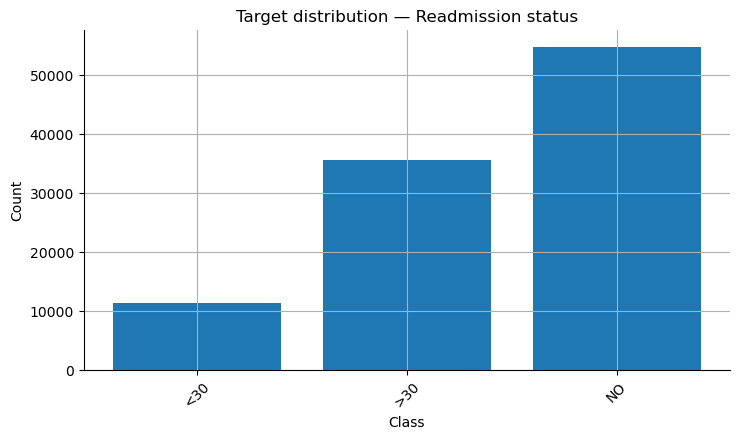

readmitted
<30    11.16
>30    34.93
NO     53.91
Name: count, dtype: float64

In [87]:
counts = df[TARGET].value_counts().sort_index()

plt.figure()
plt.bar(counts.index, counts.values)
plt.title("Target distribution — Readmission status")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45)  # added for readability
plt.tight_layout()
plt.show()

# Percentages for write-up
percentages = (counts / counts.sum() * 100).round(2)
percentages

The outcome is imbalanced (one class is much smaller than the others): no is 53.91%, <30 is 11.16%, and >30 is 34.93%. Because <30 is the minority class (the small group we care about), plain accuracy can be misleading. 

We will use stratified splits (we keep the same class proportions in train and test) and evaluate with recall (of all true <30 cases, how many we correctly find) and precision (of the cases we predict as <30, how many are actually <30>). We will also track PR-AUC (the area under the precision–recall curve) which is a better summary than accuracy when classes are imbalanced. Finally, we will tune the decision threshold (the cutoff where a probability becomes a positive prediction) to hit a target recall for <30.

#### 2. Age — distribution (counts)

In [90]:
# folder_exists, status_string, nested_directory = create_folder(str(FIG_DIR), subfolder_names[1])

# if (folder_exists):
#     col = "age"
#     counts = df[col].value_counts().sort_index()
#     labels = [age_map.get(int(k), str(k)) for k in counts.index]

#     plt.figure()
#     plt.bar(labels, counts.values)
#     plt.title("Age distribution")
#     plt.xlabel("Age bucket")
#     plt.ylabel("Count")
#     plt.xticks(rotation=30)
#     plt.tight_layout()
#     plt.savefig(nested_directory + "/age_distribution.png", dpi=150)
#     plt.show()

#     print(counts)
# else:
#     output_text_information_to_txt_file(nested_directory + "/Error", status_string)

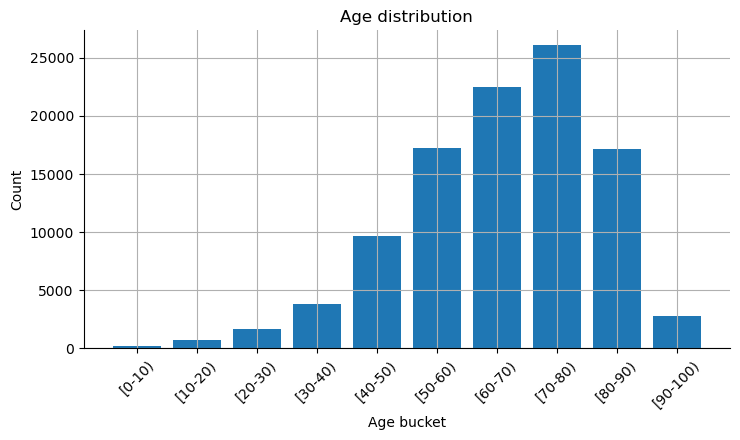

age
[0-10)        161
[10-20)       691
[20-30)      1657
[30-40)      3775
[40-50)      9685
[50-60)     17256
[60-70)     22483
[70-80)     26068
[80-90)     17197
[90-100)     2793
Name: count, dtype: int64

In [91]:
col = "age"

# Count occurrences of each age bucket
counts = df[col].value_counts().sort_index()

# Use the actual values from the dataframe as x-axis labels
labels = counts.index.astype(str)

plt.figure()
plt.bar(labels, counts.values)
plt.title("Age distribution")
plt.xlabel("Age bucket")
plt.ylabel("Count")
plt.xticks(rotation=45)  # rotated labels for readability
plt.tight_layout()
plt.show()

# Display counts for write-up
counts

Encounter counts skew older as the largest bucket is 70–80 (26,068), followed by 60–70 (22,483) and 50–60 (17,256), while younger buckets are smaller. Smaller groups give noisier estimates (more variability just due to few examples). 

We will stratify by age in our data splits so train and test have similar age mixes, and we will be cautious interpreting patterns in the youngest buckets.

#### 3. Gender — distribution (counts) and <30 rate

In [94]:
# col = "gender"
# # counts
# g_counts = df[col].value_counts().sort_index()
# g_labels = [gender_map.get(int(k), str(k)) for k in g_counts.index]


# folder_exists, status_string, nested_directory = create_folder(str(FIG_DIR), subfolder_names[1])

# if (folder_exists):

#     plt.figure()
#     plt.bar(g_labels, g_counts.values)
#     plt.title("Gender distribution")
#     plt.xlabel("Gender")
#     plt.ylabel("Count")
#     plt.tight_layout()
#     plt.savefig(nested_directory + "/gender_distribution.png", dpi=150)
#     plt.show()
# else:
#     output_text_information_to_txt_file(nested_directory + "/Error", status_string)


# folder_exists, status_string, nested_directory = create_folder(str(FIG_DIR), subfolder_names[8])

# if (folder_exists):
#     # <30 rate
#     tmp = df[[col, TARGET]].dropna()
#     rate = (tmp[TARGET] == 1).groupby(tmp[col]).mean().reindex(g_counts.index)

#     plt.figure()
#     plt.bar(g_labels, rate.values)
#     plt.title("30-day Readmission Rate by Gender")
#     plt.ylabel("Proportion readmitted < 30 days")
#     plt.tight_layout()
#     plt.savefig(nested_directory + "/rate_readmit_lt30_by_gender.png", dpi=150)
#     plt.show()

#     print(rate)
# else:
#     output_text_information_to_txt_file(nested_directory + "/Error", status_string)

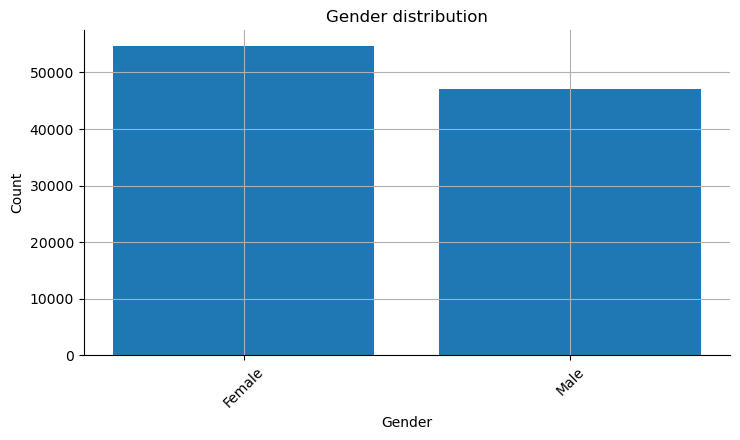

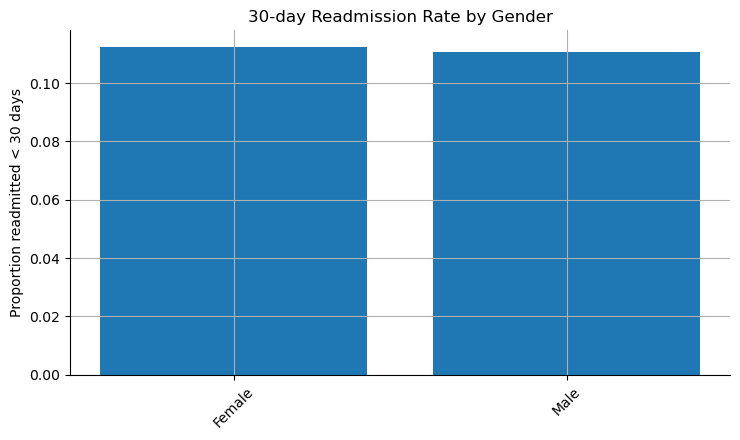

gender
Female    0.112452
Male      0.110615
Name: readmitted, dtype: float64

In [95]:
col = "gender"

# --- Counts ---
g_counts = df[col].value_counts().sort_index()
g_labels = g_counts.index.astype(str)  # use actual values as labels

plt.figure()
plt.bar(g_labels, g_counts.values)
plt.title("Gender distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=45)  # rotated labels for readability
plt.tight_layout()
plt.show()

# --- 30-day readmission rate ---
rate = (df[TARGET] == '<30').groupby(df[col]).mean().reindex(g_counts.index)

plt.figure()
plt.bar(g_labels, rate.values)
plt.title("30-day Readmission Rate by Gender")
plt.ylabel("Proportion readmitted < 30 days")
plt.xticks(rotation=45)  # rotated labels for readability
plt.tight_layout()
plt.show()

# Display the computed rates
rate

Male and Female have nearly identical <30 rates—11.24% and 11.06%, respectively while the Unknown/Invalid group is tiny. That indicates minimal predictive signal (little ability to separate classes) from gender for this outcome. 

We will keep gender for completeness and for fairness slicing, but we do not expect it to materially improve performance.

### BIVARIATE

#### 1. Box plot — time_in_hospital vs readmission

In [99]:
# folder_exists, status_string, nested_directory = create_folder(str(FIG_DIR), "boxplot")

# if (folder_exists):
#     col = "time_in_hospital"
#     classes = sorted(df[TARGET].dropna().unique())
#     data = [df.loc[df[TARGET]==c, col].dropna().values for c in classes]
#     labels = [readmit_map.get(int(c), str(c)) for c in classes]

#     plt.figure()
#     plt.boxplot(data, labels=labels, showfliers=True)
#     plt.title("Time in hospital by readmission class")
#     plt.xlabel("Readmission class")
#     plt.ylabel("Time in hospital (days)")
#     plt.tight_layout()
#     plt.savefig(nested_directory + "/box_time_in_hospital_by_readmit.png", dpi=150)
#     plt.show()
# else:
#     output_text_information_to_txt_file(nested_directory + "/Error", status_string)

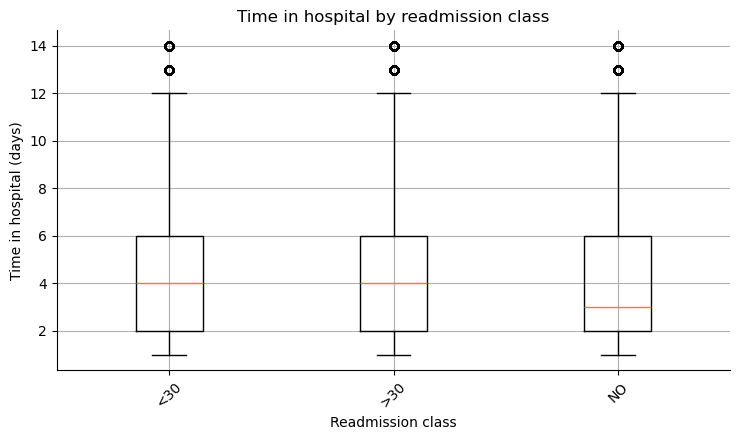

In [100]:
col = "time_in_hospital"

# Get the unique target classes
classes = sorted(df[TARGET].unique())

# Prepare data for boxplot
data = [df.loc[df[TARGET] == c, col].values for c in classes]

plt.figure()
plt.boxplot(data, showfliers=True)
plt.title("Time in hospital by readmission class")
plt.xlabel("Readmission class")
plt.ylabel("Time in hospital (days)")
plt.xticks(range(1, len(classes) + 1), classes, rotation=45)
plt.tight_layout()
plt.show()

The length-of-stay distributions for no, <30, and >30 overlap substantially, with no clear median shift. Visually, that implies a small effect size (the difference between classes is small in practical terms). 

We will treat time_in_hospital as a context feature and expect it to be more useful in interactions (a feature becomes informative when combined with another, e.g., length of stay × prior visits) than as a standalone driver.

**Observation:** The distribution suggests potential outliers or skewness that should be examined further.

#### 2. Race/Ethnicity — bar plot of 30-day readmission rate by race

In [104]:
# folder_exists, status_string, nested_directory = create_folder(str(FIG_DIR), subfolder_names[8])

# if (folder_exists):
#     col = "race"
#     tmp = df[[col, TARGET]].dropna()
#     rate = (tmp[TARGET] == 1).groupby(tmp[col]).mean().sort_values(ascending=False)

#     x_labels = [race_map.get(int(k), str(k)) for k in rate.index]

#     plt.figure(figsize=(8.5, 4.8))
#     plt.bar(x_labels, rate.values)
#     plt.ylabel("Proportion readmitted < 30 days")
#     plt.title("30-day Readmission Rate by Race/Ethnicity")
#     plt.xticks(rotation=20)
#     plt.tight_layout()
#     plt.savefig(nested_directory + "/rate_readmit_lt30_by_race.png", dpi=150)
#     plt.show()

#     print(rate)
# else:
#     output_text_information_to_txt_file(nested_directory + "/Error", status_string)

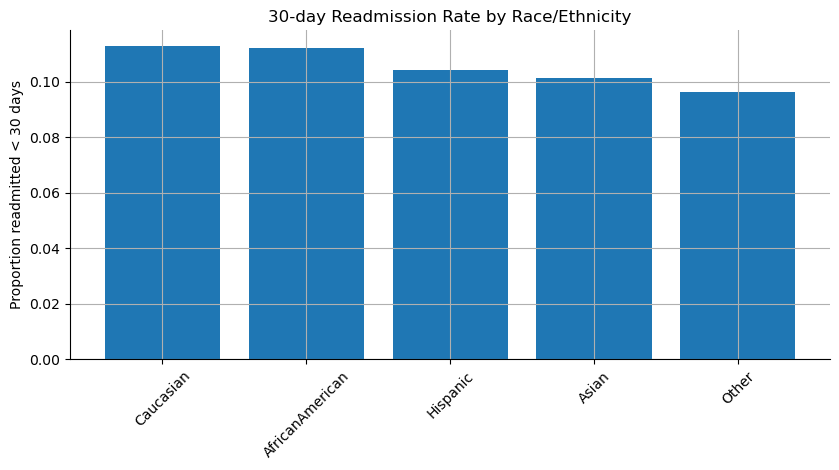

race
Caucasian          0.112906
AfricanAmerican    0.112181
Hispanic           0.104075
Asian              0.101404
Other              0.096282
Name: readmitted, dtype: float64

In [105]:
col = "race"

# Compute readmission rate per race; NaNs will be skipped automatically
rate = (df[TARGET] == '<30').groupby(df[col]).mean().sort_values(ascending=False)

# Use the actual values from the dataframe as x-axis labels
x_labels = rate.index.astype(str)

plt.figure(figsize=(8.5, 4.8))

plt.bar(x_labels, rate.values)
plt.ylabel("Proportion readmitted < 30 days")
plt.title("30-day Readmission Rate by Race/Ethnicity")
plt.xticks(rotation=45)  # rotated labels for readability
plt.tight_layout()
plt.show()

# Display the computed rates
rate

The <30 rates across racial groups are tightly clustered (Caucasian 11.29%, African American 11.22%, Hispanic 10.41%, Asian 10.14%, Other 9.63%) so differences are only a few percentage points (a percentage-point is the simple arithmetic difference between two percentages, e.g., 12% vs 10% = 2 points). This suggests a weak association (little relationship) between race and 30-day readmission in this dataset. 

We will still report fairness slices (metrics computed within each group) to confirm the model behaves similarly across groups, but we do not expect race by itself to add meaningful predictive lift (performance gain).

#### 3. Relationship among number_outpatient, number_emergency, number_inpatient - Scatteplot

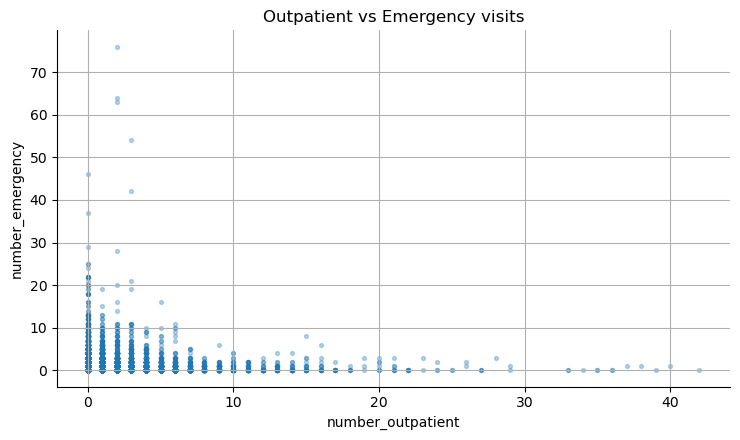

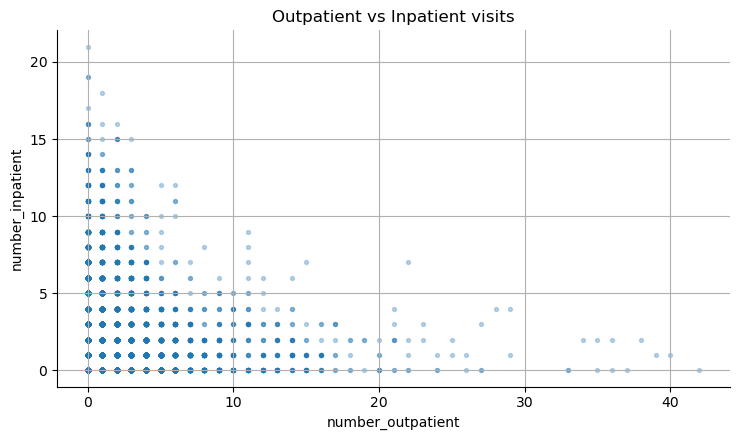

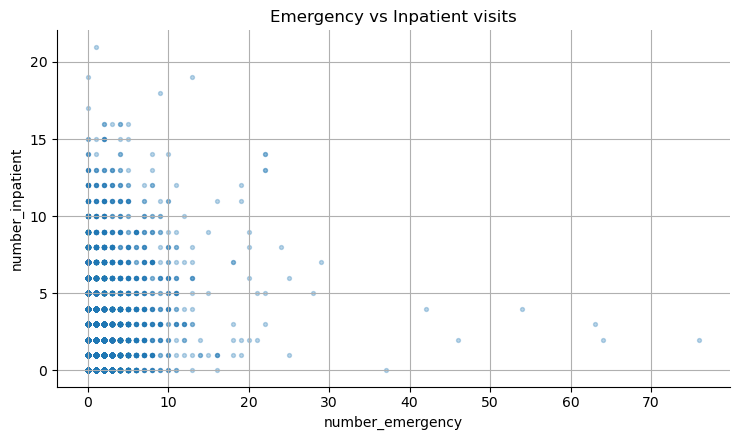

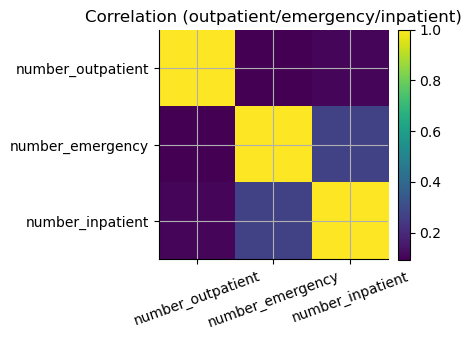

,number_outpatient,number_emergency,number_inpatient
number_outpatient,1.000000,0.091459,0.107338
number_emergency,0.091459,1.000000,0.266559
number_inpatient,0.107338,0.266559,1.000000


In [108]:
x1, x2, x3 = "number_outpatient", "number_emergency", "number_inpatient"

# Scatter: outpatient vs emergency
plt.figure()
plt.scatter(df[x1], df[x2], s=8, alpha=0.3)
plt.xlabel(x1); plt.ylabel(x2)
plt.title("Outpatient vs Emergency visits")
plt.tight_layout()
plt.savefig(FIG_DIR / "scatter_outpatient_vs_emergency.png", dpi=150)
plt.show()

# Scatter: outpatient vs inpatient
plt.figure()
plt.scatter(df[x1], df[x3], s=8, alpha=0.3)
plt.xlabel(x1); plt.ylabel(x3)
plt.title("Outpatient vs Inpatient visits")
plt.tight_layout()
plt.savefig(FIG_DIR / "scatter_outpatient_vs_inpatient.png", dpi=150)
plt.show()

# Scatter: emergency vs inpatient
plt.figure()
plt.scatter(df[x2], df[x3], s=8, alpha=0.3)
plt.xlabel(x2); plt.ylabel(x3)
plt.title("Emergency vs Inpatient visits")
plt.tight_layout()
plt.savefig(FIG_DIR / "scatter_emergency_vs_inpatient.png", dpi=150)
plt.show()

# Mini heatmap for correlations among the three
sub = df[[x1, x2, x3]].corr()
plt.figure(figsize=(4.5, 4))
im = plt.imshow(sub.values, interpolation="nearest")
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(3), sub.columns, rotation=20)
plt.yticks(range(3), sub.index)
plt.title("Correlation (outpatient/emergency/inpatient)")
plt.tight_layout()
plt.savefig(FIG_DIR / "corr_three_counts.png", dpi=150)
plt.show()

sub

All three visit counts are zero-inflated (many zeros) with a right tail (a few very large values). Correlations are low to moderate as emergency with inpatient is about 0.27 (the strongest of the three), outpatient with inpatient about 0.11, and outpatient with emergency about 0.09. A correlation is a number between –1 and 1 that measures linear association. Values near 0 indicate weak linear relationships. Because none of these are high, the features are not redundant (each adds different information). 

For modeling, we may apply a log(1+x) transform (compresses large values so extreme cases don’t dominate) or cap (winsorize), meaning we replace values above a chosen cutoff with the cutoff instead of deleting rows, to reduce the influence of outliers.

**Observation:** This relationship indicates trends or correlations between variables worth noting.

#### 4. A1C result vs readmission rate (highlight >8)

In [112]:
# folder_exists, status_string, nested_directory = create_folder(str(FIG_DIR), subfolder_names[8])

# if (folder_exists):
#     col = "A1Cresult"
#     tmp = df[[col, TARGET]].dropna()
#     rate = (tmp[TARGET] == 1).groupby(tmp[col]).mean()

#     # order by the encoded meaning: 0=None, 1=norm, 2=>7, 3=>8
#     order = [0, 1, 2, 3]
#     rate = rate.reindex(order)
#     labels = [a1c_map.get(k, str(k)) for k in rate.index]

#     plt.figure()
#     bars = plt.bar(labels, rate.values)
#     plt.title("30-day Readmission Rate by A1C result")
#     plt.ylabel("Proportion readmitted < 30 days")
#     plt.tight_layout()
#     plt.savefig(nested_directory + "/rate_readmit_lt30_by_A1C.png", dpi=150)
#     plt.show()

#     print(rate)
# else:
#     output_text_information_to_txt_file(nested_directory + "/Error", status_string)

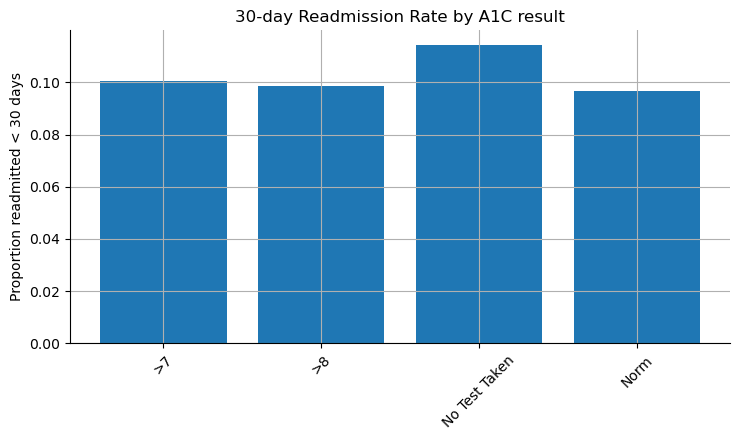

A1Cresult
>7               0.100472
>8               0.098710
No Test Taken    0.114233
Norm             0.096593
Name: readmitted, dtype: float64

In [113]:
col = "A1Cresult"

# Compute 30-day readmission rate per A1C category
rate = (df[TARGET] == "<30").groupby(df[col]).mean()

# Use the raw category values as labels
labels = rate.index.astype(str)

plt.figure()
plt.bar(labels, rate.values)
plt.title("30-day Readmission Rate by A1C result")
plt.ylabel("Proportion readmitted < 30 days")
plt.xticks(rotation=45)  # rotated labels for readability
plt.tight_layout()
plt.savefig(FIG_DIR / "rate_readmit_lt30_by_A1C.png", dpi=150)
plt.show()

# Display the computed rates
rate

The <30 rates by A1C are None 11.42%, norm 9.66%, >7 10.05%, >8 9.87%. “None” (no A1C recorded) is worse than “norm,” and >7 is similar to >8. This is informative missingness (the fact that a value is missing carries information about risk) so we will add a missing indicator (a 0/1 flag that A1C is missing) and we will not merge “None” with “normal.”

#### 5. Insulin usage vs readmission rate

In [116]:
# folder_exists, status_string, nested_directory = create_folder(str(FIG_DIR), subfolder_names[8])

# if (folder_exists):
#     col = "insulin"
#     tmp = df[[col, TARGET]].dropna()
#     rate = (tmp[TARGET] == 1).groupby(tmp[col]).mean()

#     # Show in logical order: no, steady, up, down
#     order = [0, 1, 2, 3]
#     rate = rate.reindex(order)
#     labels = [insulin_map.get(k, str(k)) for k in rate.index]

#     plt.figure()
#     plt.bar(labels, rate.values)
#     plt.title("30-day Readmission Rate by Insulin usage")
#     plt.ylabel("Proportion readmitted < 30 days")
#     plt.tight_layout()
#     plt.savefig(nested_directory + "/rate_readmit_lt30_by_insulin.png", dpi=150)
#     plt.show()


#     print(rate)
# else:
#     output_text_information_to_txt_file(nested_directory + "/Error", status_string)

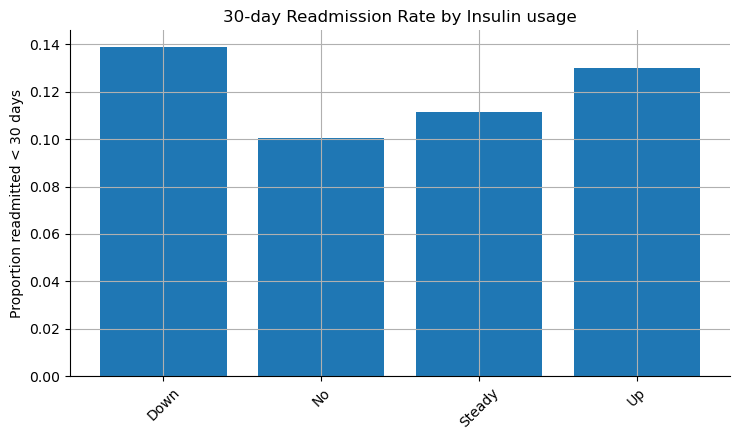

insulin
Down      0.138975
No        0.100374
Steady    0.111284
Up        0.129905
Name: readmitted, dtype: float64

In [117]:
col = "insulin"

# Compute 30-day readmission rate per insulin category
rate = (df[TARGET] == "<30").groupby(df[col]).mean()

# Use the raw category values as labels
labels = rate.index.astype(str)

plt.figure()
plt.bar(labels, rate.values)
plt.title("30-day Readmission Rate by Insulin usage")
plt.ylabel("Proportion readmitted < 30 days")
plt.xticks(rotation=45)  # rotated labels for readability
plt.tight_layout()
plt.savefig(FIG_DIR / "rate_readmit_lt30_by_insulin.png", dpi=150)
plt.show()

# Display the computed rates
rate

There is a clear gradient (ordered pattern) like no 10.04% < steady 11.13% < up 12.99% ≈ down 13.90%. Changes in insulin (up or down) likely reflect clinical instability or disease severity, which tracks with higher <30. It appears that decreasing the Insulin dosage results in a higher admission rate out of all categories. Insulin status is therefore a strong clinical signal. 

Alongside the four-level variable, we will create a simple derived flag insulin_changed that is 1 if the state is up or down, else 0.

## Modeling & Analysis Part 1

In this section, this is the first part to our Modeling and Analysis. We use the original DiabetesDF dataframe and essentially perform encoding on the data, then plug it into a model. (This is only encoding and no significant data cleaning. In other words, we are not using diabetes_with_idf in this section)

### Encoding - Preparing the dataset for the model

In [122]:
# We also drop 'weight' column for the original dataset, since it doesn't give much information 
DiabetesDF.drop('weight', axis=1, inplace=True)

In [123]:
# Replace race text with integers.
replacing_race_with_integers += "Column Name: Race\n"
# Print replacement information.
replacing_race_with_integers += "Replacements:\n'?' --> 0\n'Caucasian' --> 1\n'AfricanAmerican' --> 2\n'Asian' --> 3\n'Hispanic' --> 4\n'Other' --> 5\n'Anything Else' --> -1\n"
# Print list of unique elements beforehand.
replacing_race_with_integers += unique_element_and_count_string("race", "before")
# Replacement function.
def replace_race_text(input_information):
    match input_information:
        case '?': # If '?' (not provided), return 0.
            return 0
        case 'Caucasian':
            return 1
        case 'AfricanAmerican':
            return 2
        case 'Asian':
            return 3
        case 'Hispanic':
            return 4
        case 'Other':
            return 5
        case _:
            return -1
# Perform replacement.
DiabetesDF['race'] = DiabetesDF['race'].apply(lambda x: replace_race_text(x))
# Print list of unique elements afterward to ensure replacement.
replacing_race_with_integers += unique_element_and_count_string("race", "after")
replacing_race_with_integers += "\n"

In [124]:
# Replace gender text with integers.
replacing_gender_with_integers += "Column Name: gender\n"
# Print replacement information.
replacing_gender_with_integers += "Replacements:\n'Unknown/Invalid' --> 0\n'Male' --> 1\n'Female' --> 2\n'Anything Else' --> -1\n"
# Print list of unique elements beforehand.
replacing_gender_with_integers += unique_element_and_count_string("gender", "before")
# Replacement function.
def replace_gender(input_information):
    match input_information:
        case 'Unknown/Invalid':
            return 0
        case 'Male':
            return 1
        case 'Female':
            return 2
        case _:
            return -1
# Perform replacement.
DiabetesDF['gender'] = DiabetesDF['gender'].apply(lambda x: replace_gender(x))
# Print list of unique elements afterward to ensure replacement.
replacing_gender_with_integers += unique_element_and_count_string("gender", "after")
replacing_gender_with_integers += "\n"

In [125]:
# Replace age text with integers.
replace_age_categories_with_integers += "Column Name: age\n"
# Print replacement information.
replace_age_categories_with_integers += "Replacements:\n'[0-10)' --> 0\n'[10-20)' --> 1\n'[20-30)' --> 2\n'[30-40)' --> 3\n'[40-50)' --> 4\n'[50-60)' --> 5\n'[60-70)' --> 6\n'[70-80)' --> 7\n'[80-90)' --> 8\n'[90-100)' --> 9\n'Anything Else' --> -1\n"
# Print list of unique elements beforehand.
replace_age_categories_with_integers += unique_element_and_count_string("age", "before")
# Replacement function.
def replace_age_ranges(input_information):
    match input_information:
        case '[0-10)':
            return 0
        case '[10-20)':
            return 1
        case '[20-30)':
            return 2
        case '[30-40)':
            return 3
        case '[40-50)':
            return 4
        case '[50-60)':
            return 5
        case '[60-70)':
            return 6
        case '[70-80)':
            return 7
        case '[80-90)':
            return 8
        case '[90-100)':
            return 9
        case _:
            return -1
# Perform replacement.
DiabetesDF['age'] = DiabetesDF['age'].apply(lambda x: replace_age_ranges(x))
# Print list of unique elements afterward to ensure replacement.
replace_age_categories_with_integers += unique_element_and_count_string("age", "after")
replace_age_categories_with_integers += "\n"

In [126]:
# Condense insurance information.
condensed_insurance_information += "Column Name: payer_code\n"
# Print condensing information.
condensed_insurance_information += "Condensing:\n'?' --> 0\n'SP' --> 1\n'Anything Else' --> 2\n"
# Print reason for condensing.
condensed_insurance_information += "Reason for condensing:\nPatients who don't use insurance are less likely to return for additional treatment, which puts them at increased risk for further injury.\n"
# Print list of unique elements beforehand.
condensed_insurance_information += unique_element_and_count_string("payer_code", "before")
# Filtering function.
def filter_payer_code(input_information):
    # Insurance information not provided.
    if (input_information == '?'):
        return 0
    # Patient did not use insurance. I don't know if 'SP' stands for 'self-pay' or not.
    elif (input_information == 'SP'):
        return 1
    # Patient used insurance.
    else:
        return 2
# Perform the filtering operation.
DiabetesDF['payer_code'] = DiabetesDF['payer_code'].apply(lambda x: filter_payer_code(x))
# Print list of unique elements afterward to ensure filtering.
condensed_insurance_information += unique_element_and_count_string("payer_code", "after")
condensed_insurance_information += "\n"

In [127]:
# Replace the elements in a given column with integers.
def replace_elements_with_ints(column_name):
    return_question_mark_associated_element = 0

    # Get the list of unique column elements from the column in question.
    unique_column_elements = DiabetesDF[column_name].unique().tolist()

    # Check if a '?' element exists, and move it to the front of the list of unique column elements if it does.
    try:
        question_mark_location = unique_column_elements.index('?')
        unique_column_elements.pop(question_mark_location)
        unique_column_elements.insert(0, '?')

        # Additional information needs to be printed
        if (question_mark_location == 0):
            return_question_mark_associated_element = 1
        if (question_mark_location > 0):
            return_question_mark_associated_element = 2
    except:
        pass

    # Convert back to numpy array for printing purposes.
    unique_column_elements = np.array(unique_column_elements)

    # Get the number of unique column elements from the column in question, and then generate a list of elements from 0 up to one less than the number of unique elements.
    unique_column_element_count = DiabetesDF[column_name].nunique()
    list_of_numbers = list(range(0, unique_column_element_count))

    # Pair each number to a unique column element and perform the replacement.
    unique_column_elements_numbers_pairing = {key: element for key, element in zip(unique_column_elements, list_of_numbers)}
    DiabetesDF[column_name] = DiabetesDF[column_name].apply(lambda x: unique_column_elements_numbers_pairing[x])

    # If a '?' element exists, the temporary reordering of unique elements was done, so additional information needs to be printed.
    if (return_question_mark_associated_element == 1):
        return f"The element associated with '?' is '{unique_column_elements_numbers_pairing['?']}'\n"
    elif (return_question_mark_associated_element == 2):
        return (
            f"Temporary reordering of unique elements: {unique_column_elements}\n" +
            f"The element associated with '?' is '{unique_column_elements_numbers_pairing['?']}'\n"
            )
    else:
        return ""
# Replacement information.
replace_elements_with_ints_string = "Replacement:\nEverything --> After moving '?' (if it exists) to the front of the unique elements list, each element is assigned a unique number, starting from zero up to one less than the number of unique elements.\n"


In [128]:
# Replacing medical specialty strings with integers.
# Despite 53% of element missing, the medical speciality examining a patient is very important.
#  Example: Emergency/Trauma is much more important than Dentistry.
def consensing_medical_specialties(input_information):
    match input_information:
        # Primary Care
        case x if (x == 'Family/GeneralPractice') or (x == 'InternalMedicine') or (x == 'Pediatrics') or (x == 'Hospitalist') or (x == 'Osteopath') or (x == 'Resident') or (x == 'PhysicianNotFound'):
            return 'Primary Care'
        # Cardiovascular System - Non-surgery.
        case x if (x == 'Cardiology') or (x == 'Cardiology-Pediatric'):
            return 'Cardiovascular System - Non-surgery'
        # Neurology - Non-surgery.
        case x if (x == 'Neurology') or (x == 'Neurophysiology') or (x == 'Pediatrics-Neurology'):
            return 'Neurology - Non-surgery'
        # Psychiatry
        case x if (x == 'Psychiatry') or (x == 'Psychiatry-Child/Adolescent') or (x == 'Psychiatry-Addictive') or (x == 'Psychology'):
            return 'Psychiatry'
        case _:
            return input_information
# Condense some of the related medical specialities into groups.
replacing_medical_specialty_with_integers += "Column Name: medical_specialty\n"
# Perform consensing.
DiabetesDF['medical_specialty'] = DiabetesDF['medical_specialty'].apply(lambda x: consensing_medical_specialties(x))
# Print list and number of unique elements after condensing.
replacing_medical_specialty_with_integers += unique_element_and_count_string('medical_specialty', "After Condensing")
# Print notes.
replacing_medical_specialty_with_integers += ("Notes:\nDespite 53% of elements missing, the medical speciality examining a patient is very important.\n" +
                                              "Example:\nEmergency/Trauma is much more important than Dentistry.\n" + 
                                              "In addition, 'DCPTEAM' possibly stands for 'Dynamic Care Planning Team'.\n")
# Print replacement message.
replacing_medical_specialty_with_integers += replace_elements_with_ints_string
# Print list and number of unique elements beforehand.
replacing_medical_specialty_with_integers += unique_element_and_count_string("medical_specialty", "before")
# Perform replacement.
replacing_medical_specialty_with_integers += replace_elements_with_ints('medical_specialty')
# Print list and number of unique elements afterward to ensure replacement.
replacing_medical_specialty_with_integers += unique_element_and_count_string("medical_specialty", "after")
replacing_medical_specialty_with_integers += "\n"

In [129]:
# Replace the codes for diagnoses 1, 2, and 3 with integers.
for i in range(18, 21):
    current_column_name = column_names_list[i]
    # Print column name.
    replacing_diagnoses_codes_with_integers += f"Column Name: {current_column_name}\n"
    # Print reason for replacement.
    replacing_diagnoses_codes_with_integers += replace_elements_with_ints_string
    # Print list and number of unique elements beforehand.
    replacing_diagnoses_codes_with_integers += unique_element_and_count_string(current_column_name, "before")
    # Perform replacement.
    replacing_diagnoses_codes_with_integers += replace_elements_with_ints(current_column_name)
    # Print list and number of unique elements afterward to ensure replacement.
    replacing_diagnoses_codes_with_integers += unique_element_and_count_string(current_column_name, "after")
    replacing_diagnoses_codes_with_integers += "\n"


In [130]:
# Replace no, steady, up, and down with corresponding integers.
def replace_no_steady_up_down(input_information):
    match input_information.lower():
        case 'no':
            return 0
        case 'steady':
            return 1
        case 'up':
            return 2
        case 'down':
            return 3
        case _:
            return -1
# Print medication note.
replacing_medication_used_indication_with_integers += "Medication Note:\nWhile some medications were not administered, medications are still important and, as a result, they weren't dropped.\n\n"
for i in range(24, 47):
    current_column_name = column_names_list[i]
    # Print column name.
    replacing_medication_used_indication_with_integers += f"Column Name: {current_column_name}\n"
    # Print reason for replacement.
    replacing_medication_used_indication_with_integers += "Replacements:\n'no' --> 0\n'steady' --> 1\n'up' --> 2\n'down' --> 3\n'Anything Else' --> -1\n"
    # Print list and number of unique elements beforehand.
    replacing_medication_used_indication_with_integers += unique_element_and_count_string(current_column_name, "before")
    # Perform replacement.
    DiabetesDF[current_column_name] = DiabetesDF[current_column_name].apply(lambda x: replace_no_steady_up_down(x))
    # Print list and number of unique elements afterward to ensure replacement.
    replacing_medication_used_indication_with_integers += unique_element_and_count_string(current_column_name, "after")
    replacing_medication_used_indication_with_integers += "\n"

In [131]:
# Replace elements in 'max_glu_serum' column.
replacing_max_glu_serum_with_integers += "Column Name: max_glu_serum\n"
# Print replacement information.
replacing_max_glu_serum_with_integers += "Replacements:\n'nan' --> 0\n'norm' --> 1\n'>200' --> 2\n'>300' --> 3\n'Anything Else' --> -1\n"
# Print note.
replacing_max_glu_serum_with_integers += "Note:\n'None' in the excel sheet might be 'nan' in Pandas. That explains the jump from 3 to 4 in the number of unique elements.\n"
# Print list and number of unique elements beforehand.
replacing_max_glu_serum_with_integers += unique_element_and_count_string("max_glu_serum", "before")
# Replace elements with corresponding integers.
def replace_max_glu_serum_elements(input_information):
    match str(input_information).lower():
        case 'nan':
            return 0
        case 'norm':
            return 1
        case '>200':
            return 2
        case '>300':
            return 3
        case _:
            return -1
# Perform replacement.
DiabetesDF['max_glu_serum'] = DiabetesDF['max_glu_serum'].apply(lambda x: replace_max_glu_serum_elements(x))
# Print list and number of unique elements afterward to ensure replacement.
replacing_max_glu_serum_with_integers += unique_element_and_count_string("max_glu_serum", "after")
replacing_max_glu_serum_with_integers += "\n"

In [132]:
# Replace elements in 'A1Cresult' column.
replacing_A1Cresult_with_integers += "Column Name: A1Cresult\n"
# Perform replacement information.
replacing_A1Cresult_with_integers += "Replacements:\n'nan' --> 0\n'norm' --> 1\n'>7' --> 2\n'>8' --> 3\n'Anything Else' --> -1\n"
# Print note.
replacing_A1Cresult_with_integers += "Note:\n'None' in the excel sheet might be 'nan' in Pandas. That explains the jump from 3 to 4 in the number of unique elements.\n"
# Print list and number of unique elements beforehand.
replacing_A1Cresult_with_integers += unique_element_and_count_string("A1Cresult", "before")
# Replace elements with corresponding integers.
def replace_A1Cresult_elements(input_information):
    match str(input_information).lower():
        case 'nan':
            return 0
        case 'norm':
            return 1
        case '>7':
            return 2
        case '>8':
            return 3
        case _:
            return -1
# Perform replacement.
DiabetesDF['A1Cresult'] = DiabetesDF['A1Cresult'].apply(lambda x: replace_A1Cresult_elements(x))
# Print list and number of unique elements afterward to ensure replacement.
replacing_A1Cresult_with_integers += unique_element_and_count_string("A1Cresult", "after")
replacing_A1Cresult_with_integers += "\n"

In [133]:
# Replace elements in 'change' column.
replacing_change_with_integers += "Column Name: change\n"
# Print replacement information.
replacing_change_with_integers += "Replacements:\n'no' --> 0\n'ch' --> 1\n'Anything Else' --> -1\n"
# Print list and number of unique elements beforehand.
replacing_change_with_integers += unique_element_and_count_string("change", "before")
# Replace elements with corresponding integers.
def replace_change_elements(input_information):
    match str(input_information).lower():
        case 'no':
            return 0
        case 'ch':
            return 1
        case _:
            return -1
# Perform replacement.
DiabetesDF['change'] = DiabetesDF['change'].apply(lambda x: replace_change_elements(x))
# Print list and number of unique elements afterward to ensure replacement.
replacing_change_with_integers += unique_element_and_count_string("change", "after")
replacing_change_with_integers += "\n"


In [134]:
# Replace elements in 'diabetesMed' column.
replacing_diabetesMed_with_integers += "Column Name: diabetesMed\n"
# Print replacement information.
replacing_diabetesMed_with_integers += "Replacements:\n'no' --> 0\n'yes' --> 1\n'Anything Else' --> -1\n"
# Print list and number of unique elements beforehand.
replacing_diabetesMed_with_integers += unique_element_and_count_string("diabetesMed", "before")
# Replace elements with corresponding integers.
def replace_diabetesMed_elements(input_information):
    match str(input_information).lower():
        case 'no':
            return 0
        case 'yes':
            return 1
        case _:
            return -1
# Perform replacement.
DiabetesDF['diabetesMed'] = DiabetesDF['diabetesMed'].apply(lambda x: replace_diabetesMed_elements(x))
# Print list and number of unique elements afterward to ensure replacement.
replacing_diabetesMed_with_integers += unique_element_and_count_string("diabetesMed", "after")
replacing_diabetesMed_with_integers += "\n"


In [135]:
# Replace elements in 'readmitted' column.
replacing_readmitted_with_integers += "Column Name: readmitted\n"
# Print replacement information.
replacing_readmitted_with_integers += "Replacements:\n'no' --> 0\n'<30' --> 1\n'>30' --> 0\n'Anything Else' --> 0\n"
# Print list and number of unique elements beforehand.
replacing_readmitted_with_integers += unique_element_and_count_string("readmitted", "before")
# Replace elements with corresponding integers.
def replace_readmitted_elements(input_information):
    match str(input_information).lower():
        case 'no':
            return 0
        case '<30':
            return 1
        case '>30':
            return 2
        case _:
            return 0
# Perform replacement.
DiabetesDF['readmitted'] = DiabetesDF['readmitted'].apply(lambda x: replace_readmitted_elements(x))
# Print list and number of unique elements afterward to ensure replacement.
replacing_readmitted_with_integers += unique_element_and_count_string("readmitted", "after")
replacing_readmitted_with_integers += "\n"


### Converting all Columns in Dataframe to int Datatypes

We need to convert all Dataframes to int types for the logistic regression model

In [138]:
# medical_specialty, diag_1, diag_2, diag_3 are all numbers already but not their data types 
print(DiabetesDF.head(10))
DiabetesDF['medical_specialty'] = DiabetesDF['medical_specialty'].astype(int)
DiabetesDF['diag_1'] = DiabetesDF['diag_1'].astype(int)
DiabetesDF['diag_2'] = DiabetesDF['diag_2'].astype(int)
DiabetesDF['diag_3'] = DiabetesDF['diag_3'].astype(int)


   encounter_id  patient_nbr  race  gender  age  admission_type_id  discharge_disposition_id  admission_source_id  time_in_hospital  \
0       2278392      8222157     1       2    0                  6                        25                    1                 1   
1        149190     55629189     1       2    1                  1                         1                    7                 3   
2         64410     86047875     2       2    2                  1                         1                    7                 2   
3        500364     82442376     1       1    3                  1                         1                    7                 2   
4         16680     42519267     1       1    4                  1                         1                    7                 1   
5         35754     82637451     1       1    5                  2                         1                    2                 3   
6         55842     84259809     1       1    6        

### Running the First Encoded Dataset

First time running Logistic Regression Model on dataframe prepared by Aaron

race                        int64
gender                      int64
age                         int64
admission_type_id           int64
discharge_disposition_id    int64
admission_source_id         int64
time_in_hospital            int64
payer_code                  int64
medical_specialty           int32
num_lab_procedures          int64
num_procedures              int64
num_medications             int64
number_outpatient           int64
number_emergency            int64
number_inpatient            int64
diag_1                      int32
diag_2                      int32
diag_3                      int32
number_diagnoses            int64
max_glu_serum               int64
A1Cresult                   int64
metformin                   int64
repaglinide                 int64
nateglinide                 int64
chlorpropamide              int64
glimepiride                 int64
acetohexamide               int64
glipizide                   int64
glyburide                   int64
tolbutamide   

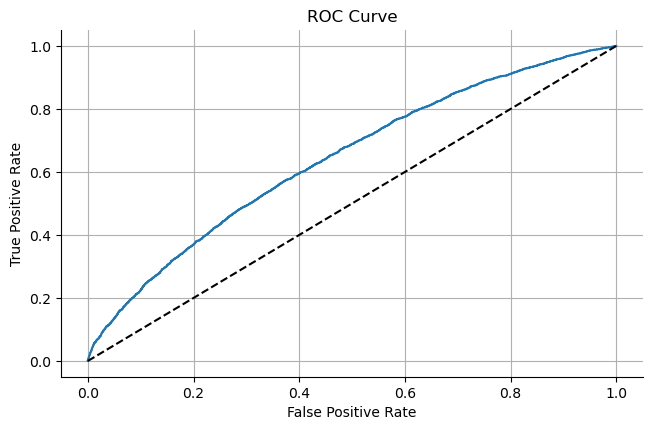

ROC AUC: 0.6410301302028951


In [141]:
# This loads the data in two separate parts: X being the independent variables and y being the dependent/target variable

DiabetesDF_Binary = DiabetesDF.copy()

# We change all 2s to 0 to make the target binary
DiabetesDF_Binary["readmitted"] = DiabetesDF_Binary["readmitted"].replace(2, 0)


# DiabetesDF is the encoding that Aaron came up with
X = DiabetesDF_Binary.iloc[:, 2:-1]   # all rows, columns 2 to the rest except the last
y = DiabetesDF_Binary.iloc[:, -1]    # all rows, only the last column

# Split the data into training and test sets - 70% will be used for training and 30% will be used for testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=67)
print(X_train.dtypes)

# Create the model
logRegressionModel = LogisticRegression()

# allow for a bunch of iterations
logRegressionModel = LogisticRegression(max_iter=5000) 

# train the model
logRegressionModel.fit(X_train, y_train)

# The model now makes predictions based on our X_test data
y_pred = logRegressionModel.predict(X_test)

# We also save the probabilities for each prediction so we can evaluate the model and our data
y_prob = logRegressionModel.predict_proba(X_test)[:, 1]

# Tests to see how the model is: Overall Accuracy, Precision, Recall, F1, and ROC-AUC
overall_accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {overall_accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Generate ROC Curve 
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
plt.plot(false_positive_rate, true_positive_rate, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

# Area under the curve for ROC chart
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC:", roc_auc)

According to our training, the model has an 88.7% of total accuracy. In other words, 88.7% of the the predictions are correct. However, the Precision score, Recall, F1 Score, and ROC-AUC score need to be improved. Out of all positive predictions (patient admitted in less than 30 days) made on the test data, 43% were actually correct. In other words, the model is constantly declaring that a patient will be back in less than 30 days, even though they didn't. Additionally, the model has a recall score of 1% which means that it's failing to catch a significant amount of readmissions (Literally the entire dataset). F1 score basically summarizes both scenarios of precision and recall by giving the model a score of 2%. Last, but not least, the model didn't do too well on the ROC AUC score. Essentially, the 64% means the model is doing pretty bad.

### Aaron's EDA Stuff

In [144]:
# The EDA-ready dataframe
df = DiabetesDF
print("Shape:", df.shape)
df.head(3)

Shape: (101766, 49)


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,1,2,0,6,25,1,1,0,1,41,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,149190,55629189,1,2,1,1,1,7,3,0,0,59,0,18,0,0,0,2,1,1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,1,2
2,64410,86047875,2,2,2,1,1,7,2,0,0,11,5,13,2,0,1,3,2,2,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


#### Helper Methods

In [146]:
# Numerical columns.
columns_in_question_numerical = [
    'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
    'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses'
    ]

# Categorical columns.
columns_in_question_categorical = [
    'race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id',
    'admission_source_id', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2',
    'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
    'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide',
    'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
    'troglitazone', 'tolazamide', """'examide', 'citoglipton',""" 'insulin',
    'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
    'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed'
    ]

# Subfolder names.
subfolder_names = [
    'plots_of_number_occurrences_per_readmitted_values', 'countplots',
    'numerical_plots_and_analysis', 'categorical_plots_and_analysis', 'correlation_heatmaps',
    'violinplots', 'pairplot', 'stripplot', 'proportion_plots', 'scatterplots'
]

# Encodings (kept here so plots show human-readable labels)
race_map   = {0:"?", 1:"Caucasian", 2:"AfricanAmerican", 3:"Asian", 4:"Hispanic", 5:"Other"}
gender_map = {0:"Unknown/Invalid", 1:"Male", 2:"Female"}
age_map    = {0:"[0-10)",1:"[10-20)",2:"[20-30)",3:"[30-40)",4:"[40-50)",5:"[50-60)",
              6:"[60-70)",7:"[70-80)",8:"[80-90)",9:"[90-100)"}

column_label_dictionaries = {
    "insulin": {0:"no", 1:"steady", 2:"up", 3:"down"},
    "A1Cresult": {0:"None", 1:"norm", 2:">7", 3:">8"},
    "max_glu_serum": {0:"None", 1:"norm", 2:">200", 3:">300"},
    "admission_type_id": {
        1:"Emergency", 2:"Urgent", 3:"Elective", 4:"Newborn", 5:"Not Available",
        6:"NULL", 7:"Trauma Center", 8:"Not Mapped"
    },
    "admission_source_id": {
        1:"Physician Referral", 2:"Clinic Referral", 3:"HMO Referral", 4:"Transfer from a hospital",
        5:"Transfer from a Skilled Nursing Facility (SNF)", 6:"Transfer from another health care facility",
        7:"Emergency Room", 8:"Court/Law Enforcement",
        9:"Not Available",          # There are two occurrencs of "Not Available".
        10:"Transfer from critial access hospital", 11:"Normal Delivery", 12:"Premature Delivery",
        13:"Sick Baby", 14:"Extramural Birth",
        15:"Not Available",         # There are two occurrencs of "Not Available".
        # 16 was skipped over.
        17:"NULL", 18:"Transfer From Another Home Health Agency",
        19:"Readmission to Same Home Health Agency", 20:"Not Mapped", 21:"Unknown/Invalid",
        22:"Transfer from hospital inpt/same fac reslt in a sep claim", 23:"Born inside this hospital",
        24:"Born outside this hospital", 25:"Transfer from Ambulatory Surgery Center",
        26:"Transfer from Hospice"
    },
    "discharge_disposition_id": {
        1:"Discharged to home", 2:"Discharged/transferred to another short term hospital",
        3:"Discharged/transferred to SNF", 4:"Discharged/transferred to ICF",
        5:"Discharged/transferred to another type of inpatient care institution",
        6:"Discharged/transferred to home with home health service",
        7:"Left AMA", 8:"Discharged/transferred to home under care of Home IV provider",
        9:"Admitted as an inpatient to this hospital",
        10:"Neonate discharged to another hospital for neonatal aftercare",
        11:"Expired", 12:"Still patient or expected to return for outpatient services",
        13:"Hospice / home", 14:"Hospice / medical facility",
        15:"Discharged/transferred within this institution to Medicare approved swing bed",
        16:"Discharged/transferred/referred another institution for outpatient services",
        17:"Discharged/transferred/referred to this institution for outpatient services",
        18:"NULL",
        19:"Expired at home. Medicaid only, hospice.",
        20:"Expired in a medical facility. Medicaid only, hospice.",
        21:"Expired, place unknown. Medicaid only, hospice.",
        22:"Discharged/transferred to another rehab fac including rehab units of a hospital.",
        23:"Discharged/transferred to a long term care hospital.",
        24:"Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.",
        25:"Not Mapped", 26:"Unknown/Invalid",
        27:"Discharged/transferred to a federal health care facility.",
        28:"Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital",
        29:"Discharged/transferred to a Critical Access Hospital (CAH).",
        30:"Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere"
    }
}
# Target: 0=no, 1=<30, 2=>30
readmit_map = {0:"no", 1:"<30", 2:">30"}

# Labs
a1c_map = {0:"None", 1:"norm", 2:">7", 3:">8"}
glu_map = {0:"None", 1:"norm", 2:">200", 3:">300"}

# Insulin (0=no, 1=steady, 2=up, 3=down)
insulin_map = {0:"no", 1:"steady", 2:"up", 3:"down"}

# Convenient helper to map safely if the column exists
def map_labels(series, mapping):
    s = series.copy()
    try:
        s = s.astype("Int64")
    except Exception:
        pass
    return s.map(mapping).fillna(series)

# Convenience: name of target column
TARGET = "readmitted"

# Convenient helper to output provided text to a file.
def output_text_information_to_txt_file(file_name, file_content):
    with open(file_name + ".txt", 'w') as file:
        file.write(file_content)

# Convenient helper to create subfolders.
def create_folder(folder_location, folder_name):
    nested_directory = folder_location + "/" + folder_name

    folder_exists = False

    status_string = ""

    try:
        os.makedirs(nested_directory)
        status_string = f"Folder '{folder_name}' successfully created in '{folder_location}'."
        folder_exists = True
    except FileExistsError:
        status_string = f"Folder '{folder_name}' already exists in '{folder_location}'."
        folder_exists = True
    except PermissionError:
        status_string = f"Permission Denied: Folder '{folder_name}' could not be created in '{folder_location}'."
    except Exception as e:
        status_string = f"An error occurred: {e}"
    
    return folder_exists, status_string, nested_directory

In [147]:
# Helper methods
def get_chart_width(df_imported, current_element, default_max):
    current_column_values = df_imported[current_element]

    chart_width = current_column_values.nunique()

    if (chart_width > default_max):
        chart_width = default_max
    
    return chart_width, current_column_values


def do_basic_analysis_and_charts(columns_of_interest, numerical_or_categorical, df_imported, x_label_rotation, folder_location, folder_name, column_label_dictionaries):
    folder_exists, status_string, nested_directory = create_folder(folder_location, folder_name)

    output_string = ""

    columns_of_interest.append(TARGET)
    temp_reduced_df = df_imported[columns_of_interest]
    temp_reduced_df = temp_reduced_df[temp_reduced_df[TARGET] == 1]
    temp_reduced_df = temp_reduced_df.drop(TARGET, axis=1)

    if (folder_exists):
        try:
            current_image_count = 0
            
            for element in columns_of_interest:
                nested_directory_and_name = nested_directory + "/" + element + "_" + str(current_image_count) + ".png"

                chart_width, current_column_values = get_chart_width(temp_reduced_df, element, 100)

                possible_column_label_dictionary = column_label_dictionaries.get(element)
                if (possible_column_label_dictionary is not None):
                    category_counts = temp_reduced_df[element].value_counts().sort_index()
                    category_labels = [possible_column_label_dictionary.get(int(k), str(k)) for k in category_counts.index]

                if (numerical_or_categorical == 'numerical'):
                    fig, (ax_box, ax_bar) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(chart_width, 10))
                    plt.title(f"Distribution of unique values in '{element}' where 'readmitted' < 30.")
                    sns.boxplot(x=current_column_values, ax=ax_box)
                    if (possible_column_label_dictionary is not None):
                        ax = plt.bar(category_labels, category_counts.values, ax=ax_bar)
                    else:
                        ax = sns.countplot(x=element, data=temp_reduced_df, orient='v', ax=ax_bar)
                        for container in ax.containers:
                            ax.bar_label(container)
                    plt.xlabel('Values')
                    plt.xticks(rotation=x_label_rotation, ha='right')
                    plt.ylabel('Counts')
                    plt.tight_layout()
                    plt.savefig(nested_directory_and_name, dpi=150)
                    plt.show()
                    plt.close()
                
                if (numerical_or_categorical == 'categorical'):
                    fig, ax = plt.subplots(figsize=(chart_width, 10))
                    plt.title(f"Distribution of unique values in '{element}' where 'readmitted' < 30.")
                    if (possible_column_label_dictionary is not None):
                        plt.bar(category_labels, category_counts.values)
                    else:
                        ax = sns.countplot(x=element, data=temp_reduced_df, orient='v')
                        for container in ax.containers:
                            ax.bar_label(container)
                    plt.xlabel('Values')
                    plt.xticks(rotation=x_label_rotation, ha='right')
                    plt.ylabel('Counts')
                    plt.savefig(nested_directory_and_name, dpi=150)
                    plt.show()
                    plt.close()

                if (numerical_or_categorical == 'numerical'):
                    current_mean = current_column_values.mean()
                    current_median = current_column_values.median()
                    current_mode = current_column_values.mode()
                    current_midrange = (current_column_values.min() + current_column_values.max())/2
                    output_string += f"Measures of center for the '{element}' column:\nMean: {current_mean}\nMedian: {current_median}\nMode: {current_mode}\nMidrange: {current_midrange}\n"

                    current_standard_deviation = current_column_values.std()
                    current_variance = current_column_values.var()
                    current_quantile = current_column_values.quantile()
                    output_string += f"Measures of spread for the '{element}' column:\nStandard Deviation: {current_standard_deviation}\nVariance: {current_variance}\nQuantile: {current_quantile}\n\n"
                
                if (numerical_or_categorical == 'categorical'):
                    output_string += f"Number of occurrences of each category in '{element}':\n{str(current_column_values.value_counts().sort_index())}\n"

                current_image_count += 1

            output_text_information_to_txt_file("result_of_data_check_on_columns", status_string + "\n\n\n" + output_string)
        except Exception as e:
            output_text_information_to_txt_file(nested_directory + "/Error", str(e))
    else:
        output_text_information_to_txt_file(nested_directory + "/Error", status_string)

In [148]:
def bar_plot_by_readmitted_categories(df_imported, column_to_group_by_categories, bar_distance_from_center_of_line, bar_width, x_size, y_size, x_label_rotation, dataset_is_grouped, before_edits, nested_directory_and_name, show_plot):
    # Group the dataframe by the 'readmitted' column. After that, unstack the result (rotate the result by the index from rows to columns). Combinations of
    #  values that don't exist will be represented by NaN. Fill in these NaN values with 0, which in our case fills in values that weren't included in
    #  one side of the groupby because their counts for that category are 0. Finally, stack the result again in order to get back to the normal groupby
    #  format, which in our case is the dataframe grouped by the 'readmitted' column's values.
    list_of_column_names = []

    if (dataset_is_grouped == False):
        grouped_churn_count = df_imported.groupby(['readmitted', column_to_group_by_categories]).size().unstack(fill_value=0).stack()

        for idx, _ in grouped_churn_count.items():
            list_of_column_names.append(idx[1])

    else:
        list_of_column_names = df_imported.columns

    unique_list_of_list_of_column_names = []
    for current_item in list_of_column_names:
        if current_item not in unique_list_of_list_of_column_names:
            unique_list_of_list_of_column_names.append(current_item)

    x = np.arange(len(unique_list_of_list_of_column_names))
    plt.figure(figsize=(x_size, y_size))
    if (before_edits == True):
        plt.bar(x-bar_distance_from_center_of_line, grouped_churn_count[0], bar_width, color='cyan', label=readmit_map.get(0))
        plt.bar(0, grouped_churn_count[1], bar_width, color='orange', label=readmit_map.get(1))
        plt.bar(x+bar_distance_from_center_of_line, grouped_churn_count[2], bar_width, color='green', label=readmit_map.get(2))
    else:
        # Check variables.
        plt.bar(x-bar_distance_from_center_of_line, grouped_churn_count[0], bar_width, color='red', label='>30 or no')
        plt.bar(x+bar_distance_from_center_of_line, grouped_churn_count[1], bar_width, color='blue', label='<30')
    plt.title(f"Plot of 'readmitted' by number of occurrence of each value in '{column_to_group_by_categories}'.")
    plt.xticks(x, unique_list_of_list_of_column_names, rotation=x_label_rotation, ha='right')
    plt.legend()
    if (show_plot):
        plt.show()
    plt.savefig(nested_directory_and_name, dpi=150)
    plt.close()

    return grouped_churn_count

def plot_number_occurrences_per_readmitted_values(df_imported, bar_distance_from_center_of_line, bar_width, y_size, x_label_rotation, dataset_is_grouped, before_edits, folder_location, folder_name, columns_of_interest):
    folder_exists, status_string, nested_directory = create_folder(folder_location, folder_name)

    grouped_churn_count = None

    temp_reduced_df = df_imported[columns_of_interest]
    column_names_list = temp_reduced_df.columns
    
    if (folder_exists):
        current_image_count = 0

        for element in column_names_list:
            nested_directory_and_name = nested_directory + "/" + element + "_" + str(current_image_count) + ".png"

            if ((element != "encounter_id") and (element != "patient_nbr") and (element != "readmitted")):
                chart_width = temp_reduced_df[element].nunique()
                
                if (chart_width > 200):
                    chart_width = 200

                show_plot = False
                if (element in columns_of_interest):
                    show_plot = True
                
                grouped_churn_count = bar_plot_by_readmitted_categories(temp_reduced_df, element, bar_distance_from_center_of_line, bar_width, chart_width, y_size, x_label_rotation, dataset_is_grouped, before_edits, nested_directory_and_name, show_plot)

                current_image_count += 1
        
                output_text_information_to_txt_file("text_information_from_data_check_on_columns", status_string + "\n\n\n" + str(grouped_churn_count))
    else:
        output_text_information_to_txt_file(nested_directory + "/Error", status_string)

In [149]:
def do_violinplots(columns_in_question_numerical, columns_in_question_categorical, df_imported, x_label_rotation, folder_location, folder_name):
    folder_exists, status_string, nested_directory = create_folder(folder_location, folder_name)

    combined_list = [*columns_in_question_numerical, *columns_in_question_categorical]
    temp_reduced_df = df_imported[combined_list]

    if (folder_exists):
        current_image_count = 0
        
        for element_1 in columns_in_question_categorical:
            chart_width_1, _ = get_chart_width(temp_reduced_df, element_1, 100)
            
            for element_2 in columns_in_question_numerical:
                if (element_1 != element_2):
                    chart_width_2, _ = get_chart_width(temp_reduced_df, element_2, 40)

                    nested_directory_and_name = nested_directory + "/" + element_1 + "_" + element_2 + "_" + str(current_image_count) + ".png"

                    plt.figure(figsize=(chart_width_1, chart_width_2))
                    sns.violinplot(x = element_1, y = element_2, data = temp_reduced_df)
                    plt.xticks(rotation=x_label_rotation, ha='right')
                    plt.savefig(nested_directory_and_name, dpi=150)
                    plt.close()

                    current_image_count += 1
    else:
        output_text_information_to_txt_file(nested_directory + "/Error", status_string)

In [150]:
def create_correlation_heatmap(df_imported, columns_in_question_numerical, folder_location, folder_name):
    folder_exists, status_string, nested_directory = create_folder(folder_location, folder_name)

    nested_directory_and_name = nested_directory + "/created_heatmap.png"

    if (folder_exists):
        current_column_correlation = df_imported[columns_in_question_numerical].corr()
        sns.heatmap(current_column_correlation, cmap="coolwarm")
        plt.title(f"Heatmap of numerical columns.", fontsize=16)
        plt.show()
        plt.savefig(nested_directory_and_name, dpi=150)
        plt.close()

        print(current_column_correlation)
    else:
        output_text_information_to_txt_file(nested_directory + "/Error", status_string)


In [151]:
def do_pairplot(columns_in_question, df_imported, x_label_rotation, folder_location, folder_name):
    folder_exists, status_string, nested_directory = create_folder(folder_location, folder_name)

    if (folder_exists):
        max_chart_width = -1
        
        for element in columns_in_question:
            chart_width, _ = get_chart_width(df_imported, element, 400)
            chart_width *= 2

            if (max_chart_width < chart_width):
                max_chart_width = chart_width

        nested_directory_and_name = nested_directory + "/pairplot.png"

        plt.figure(figsize=(max_chart_width, max_chart_width))
        sns.pairplot(df_imported[columns_in_question])
        plt.xticks(rotation=x_label_rotation, ha='right')
        plt.savefig(nested_directory_and_name)
        plt.close()

    else:
        output_text_information_to_txt_file(nested_directory + "/Error", status_string)

#### Plot_number_occurrences_per_readmitted_values

In [153]:
df.head(5)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,1,2,0,6,25,1,1,0,1,41,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,149190,55629189,1,2,1,1,1,7,3,0,0,59,0,18,0,0,0,2,1,1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,1,2
2,64410,86047875,2,2,2,1,1,7,2,0,0,11,5,13,2,0,1,3,2,2,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,500364,82442376,1,1,3,1,1,7,2,0,0,44,1,16,0,0,0,4,3,3,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,1,0
4,16680,42519267,1,1,4,1,1,7,1,0,0,51,0,8,0,0,0,5,4,4,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0


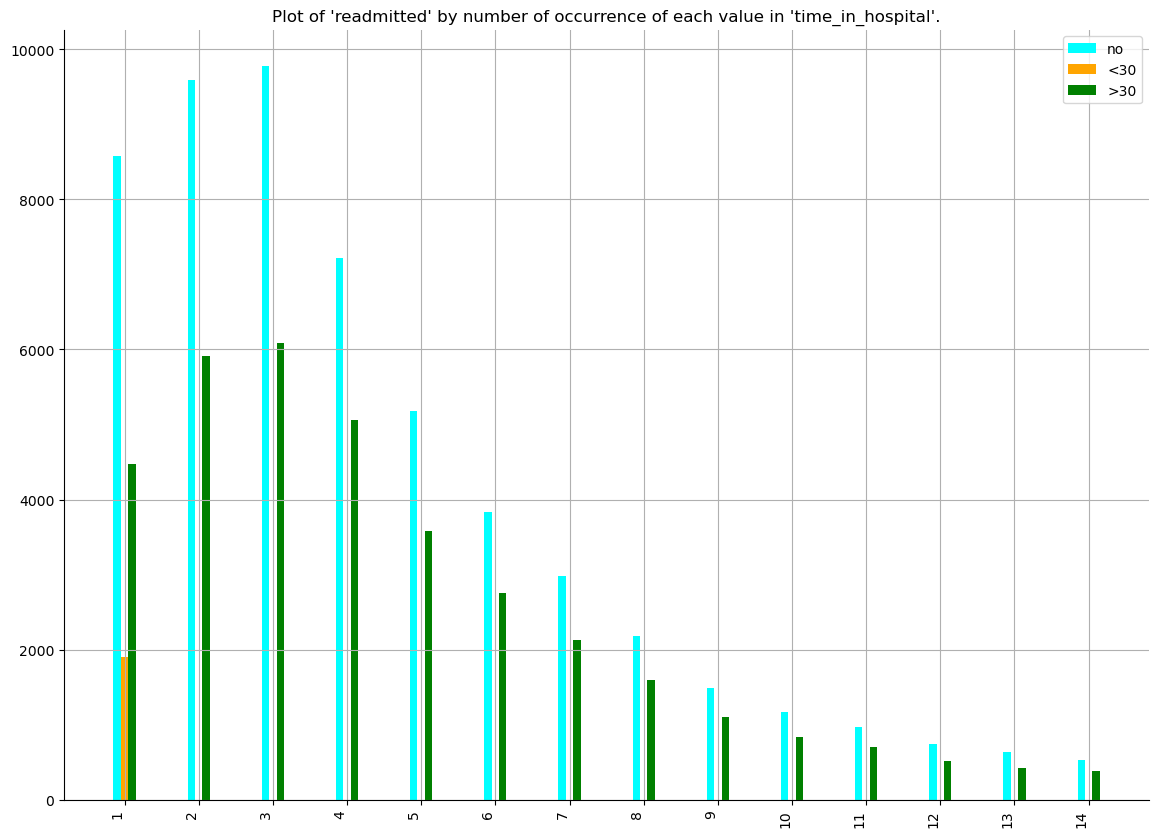

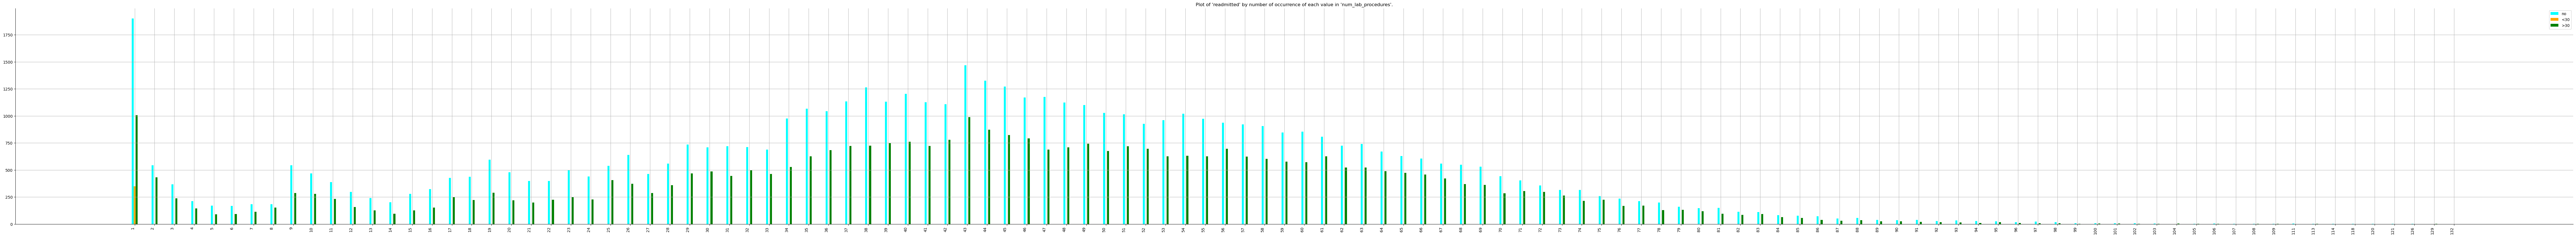

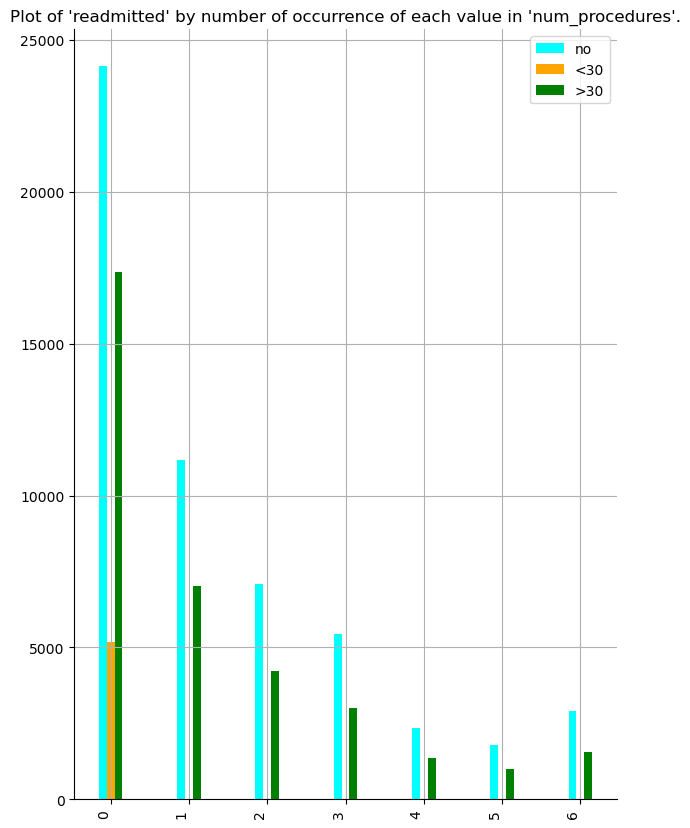

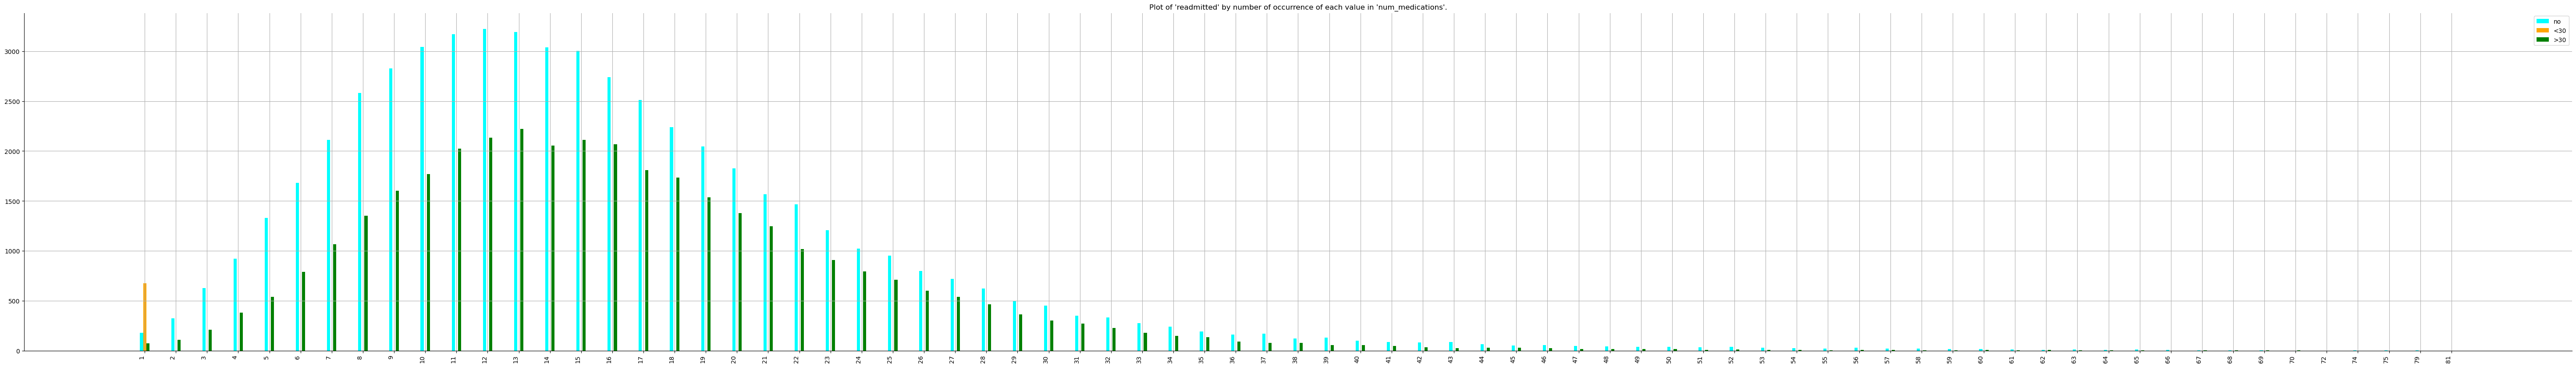

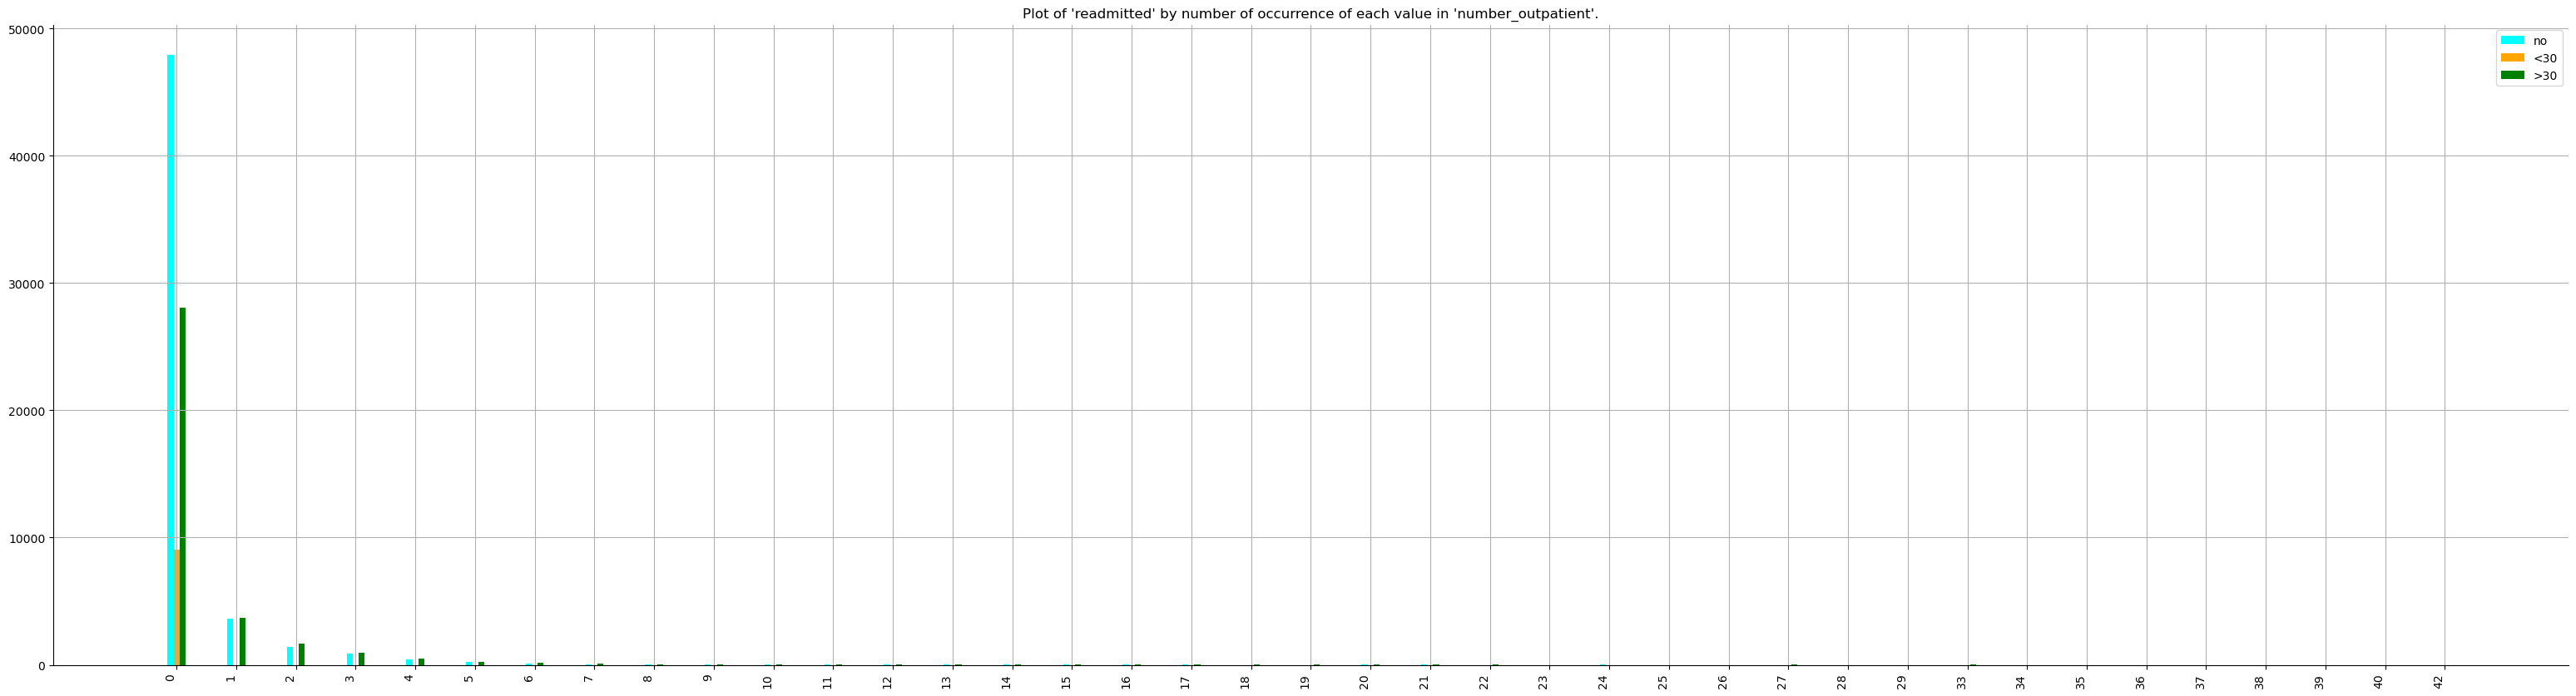

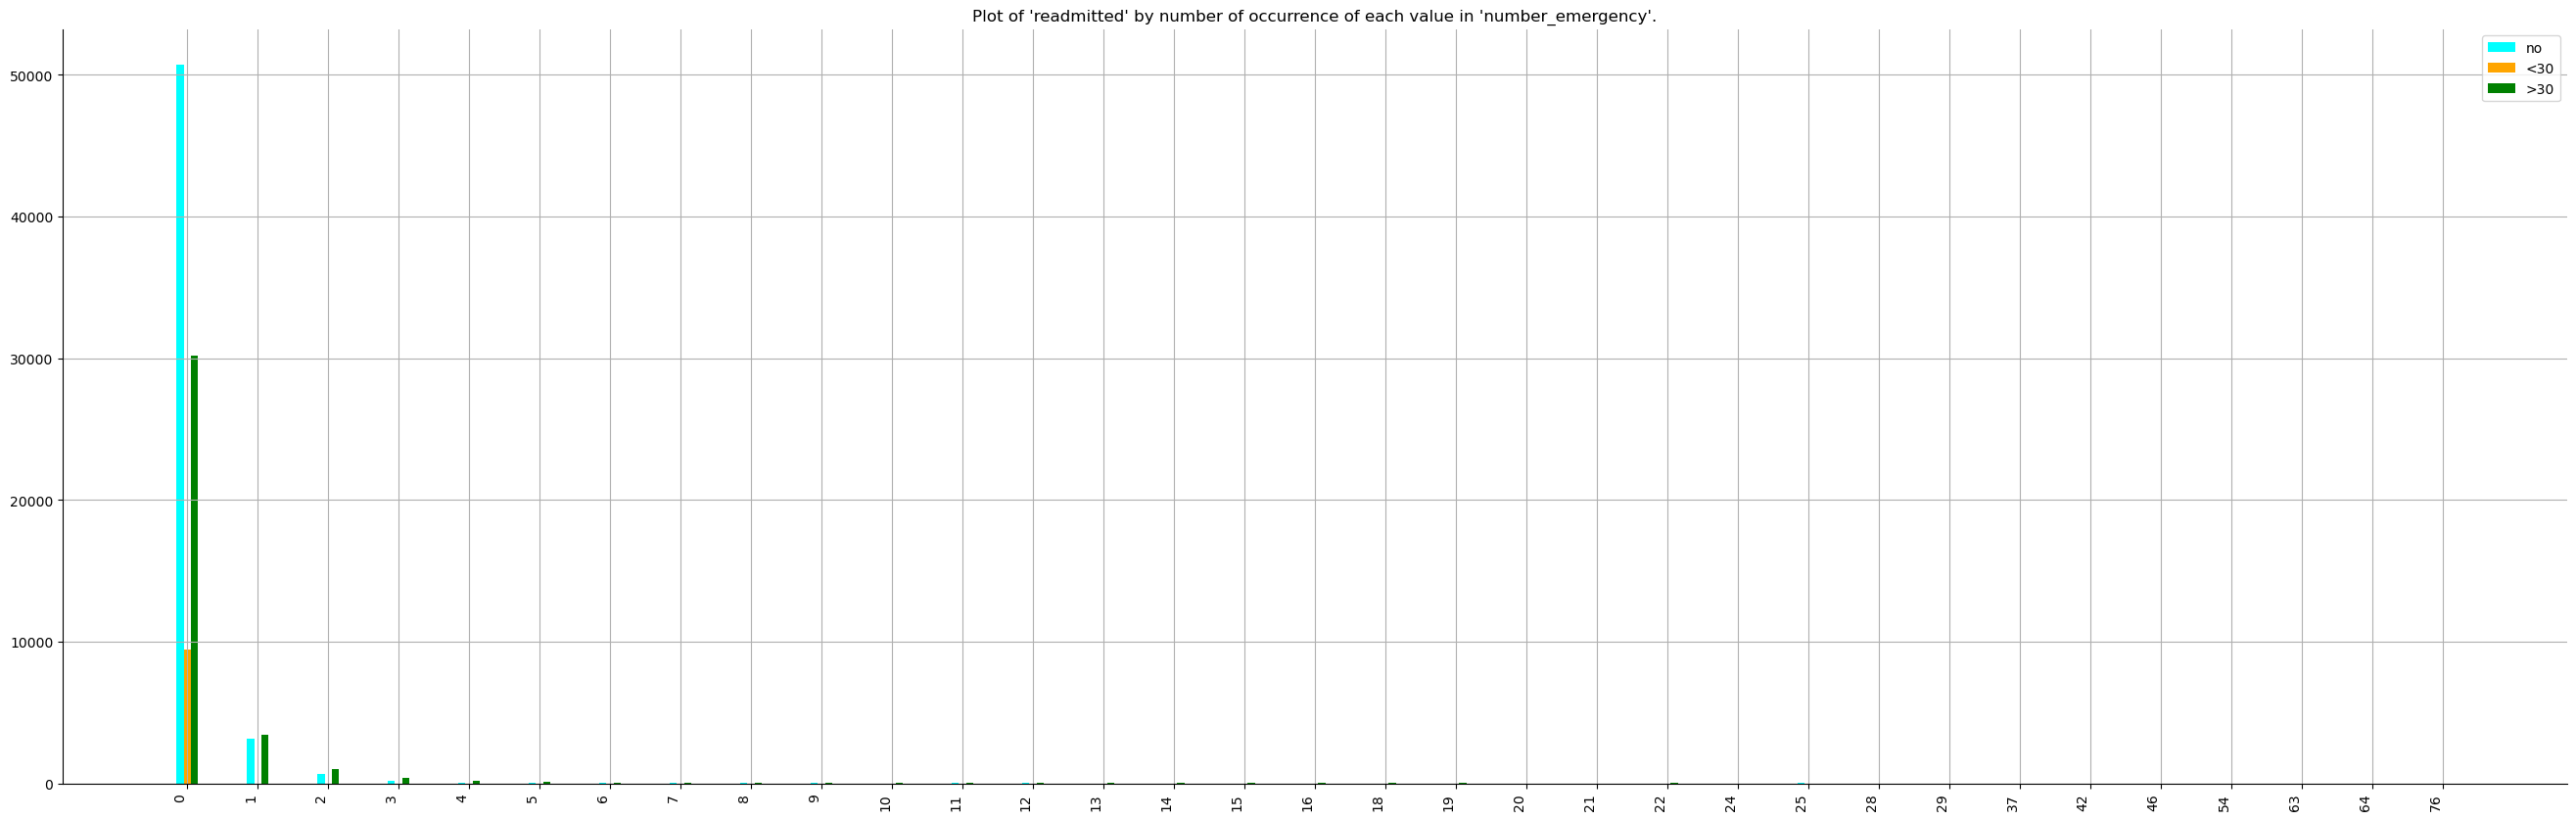

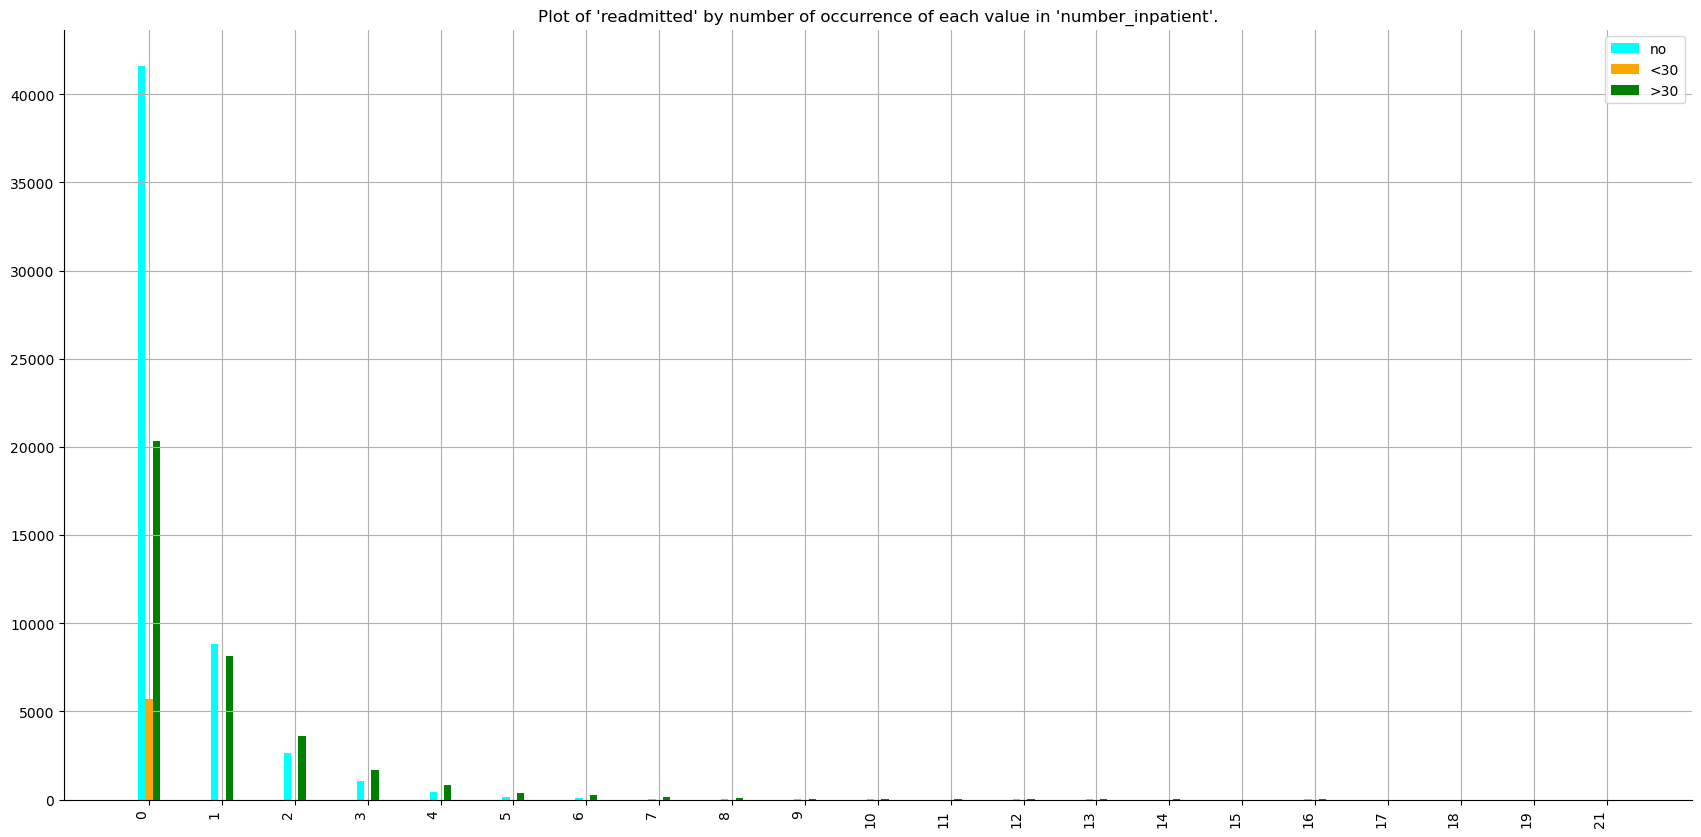

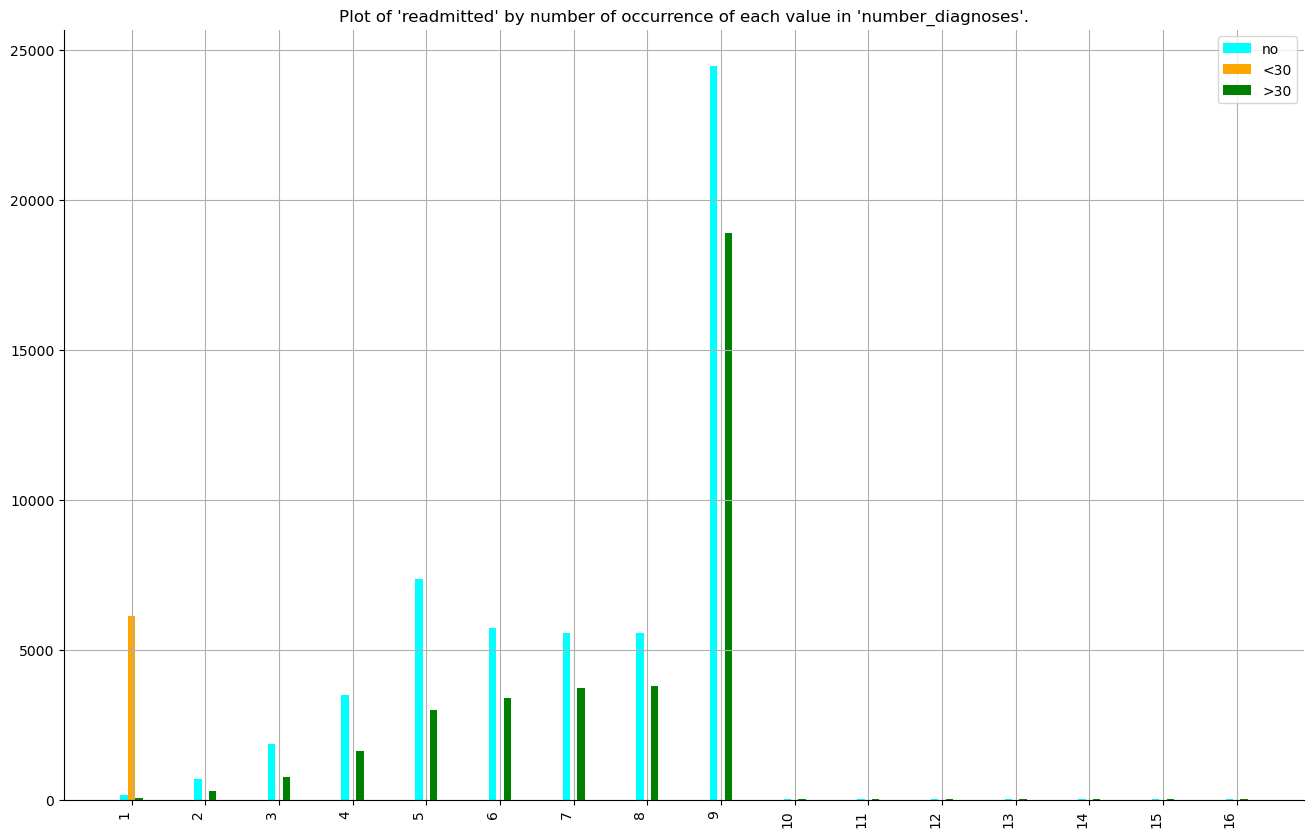

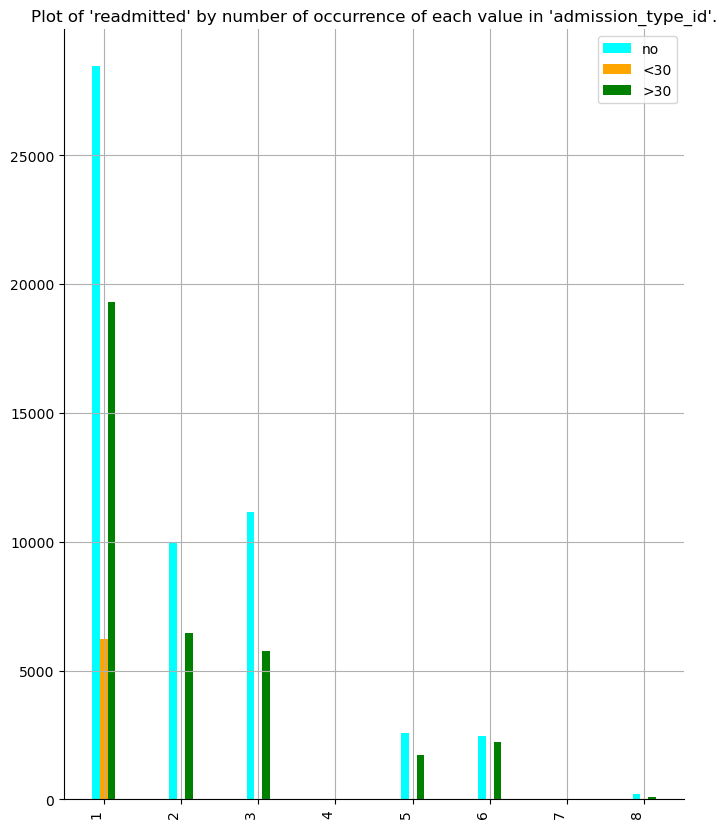

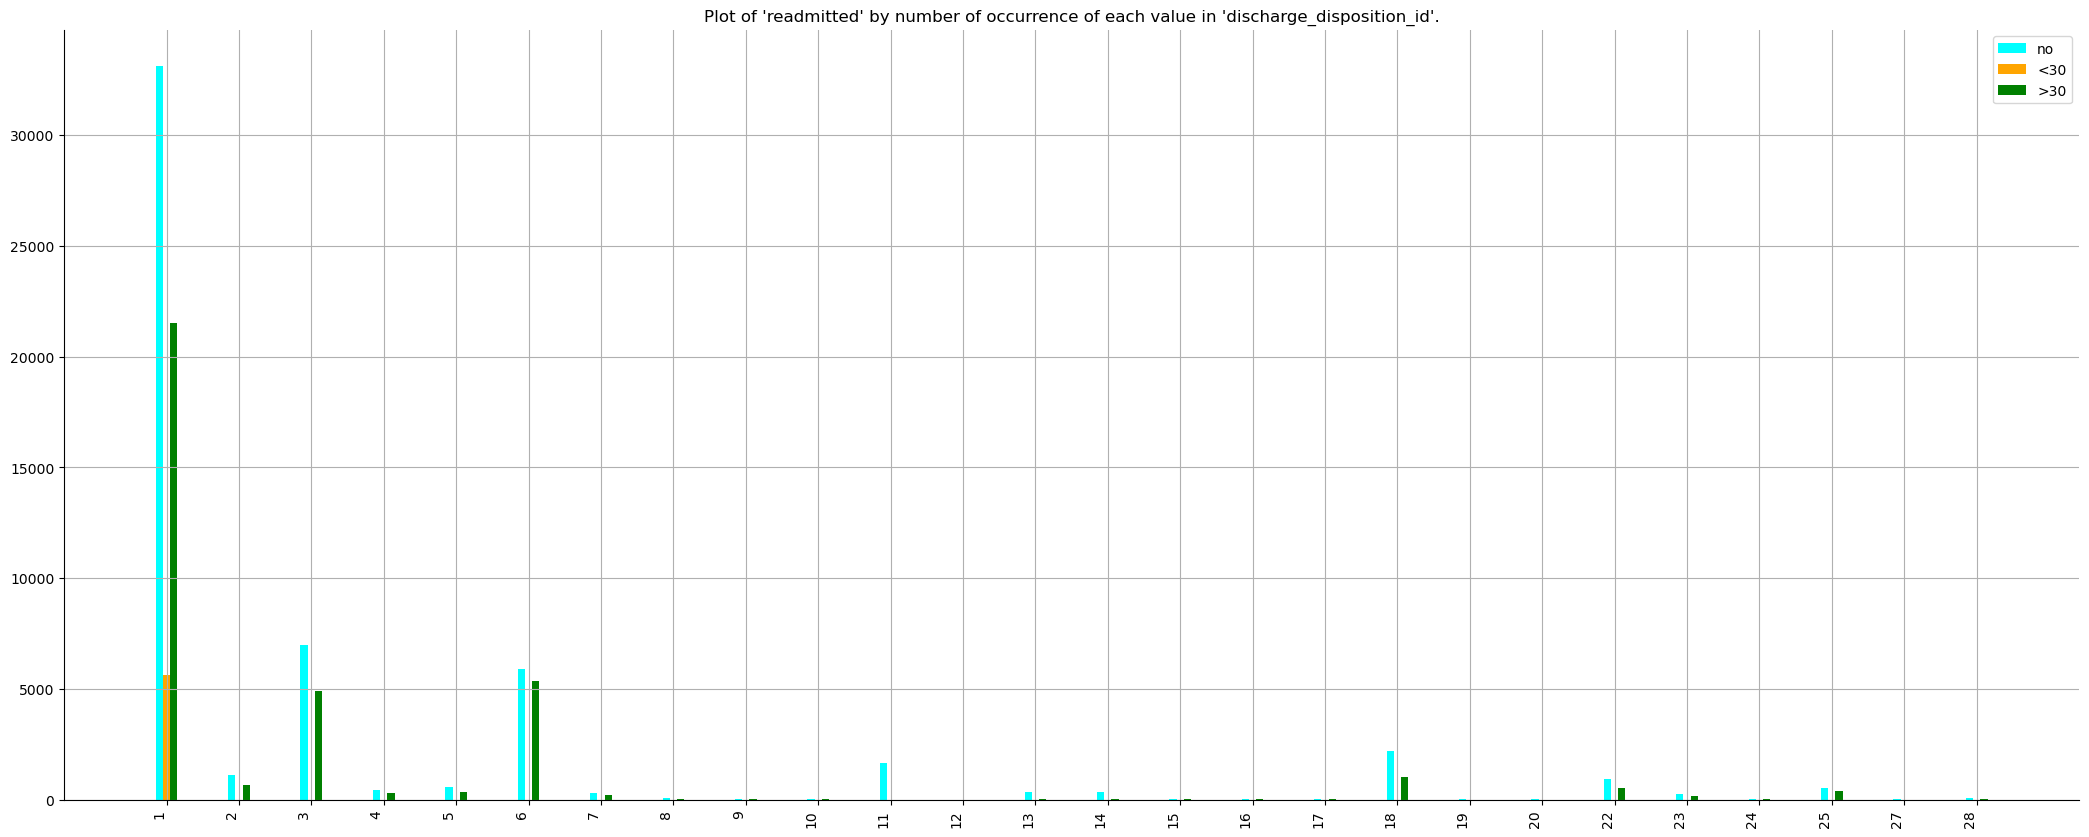

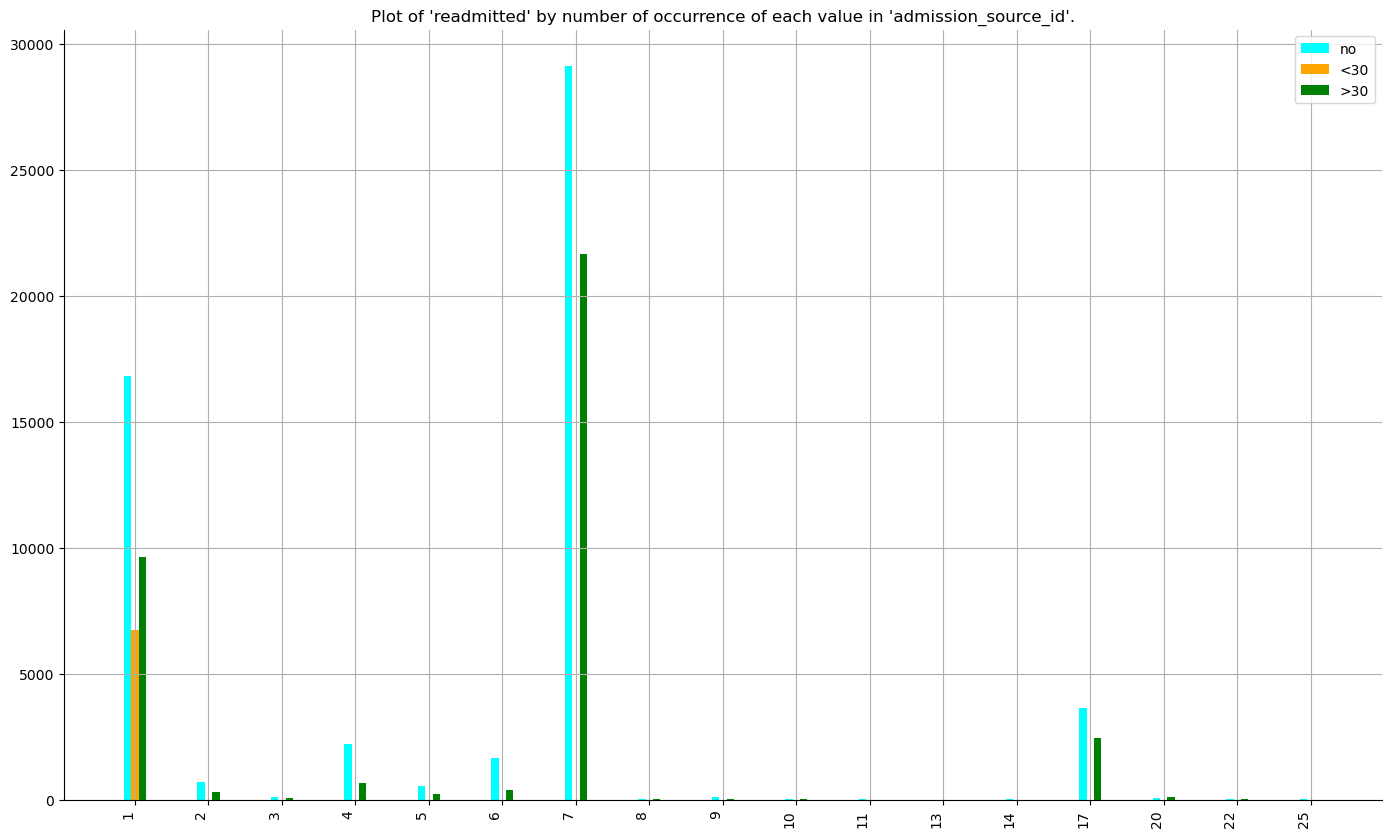

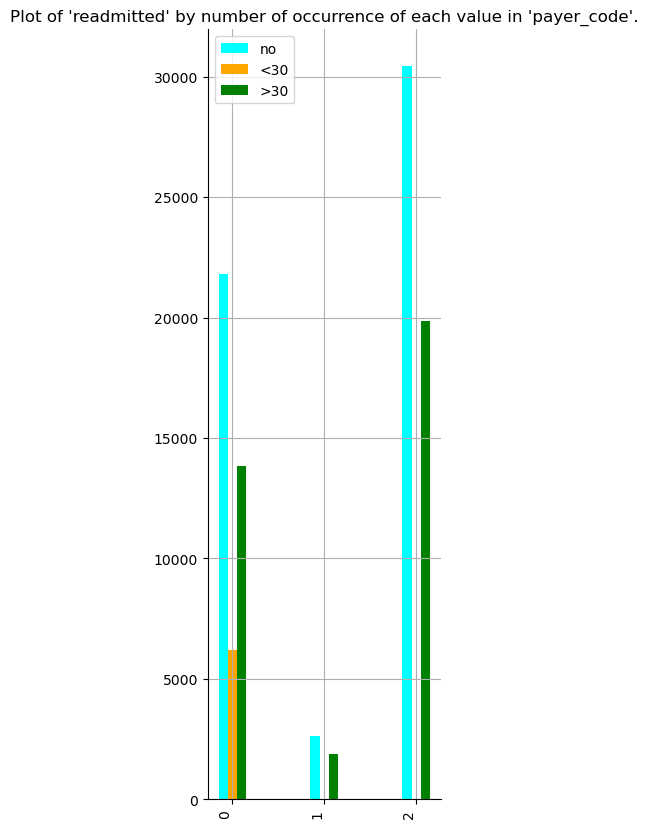

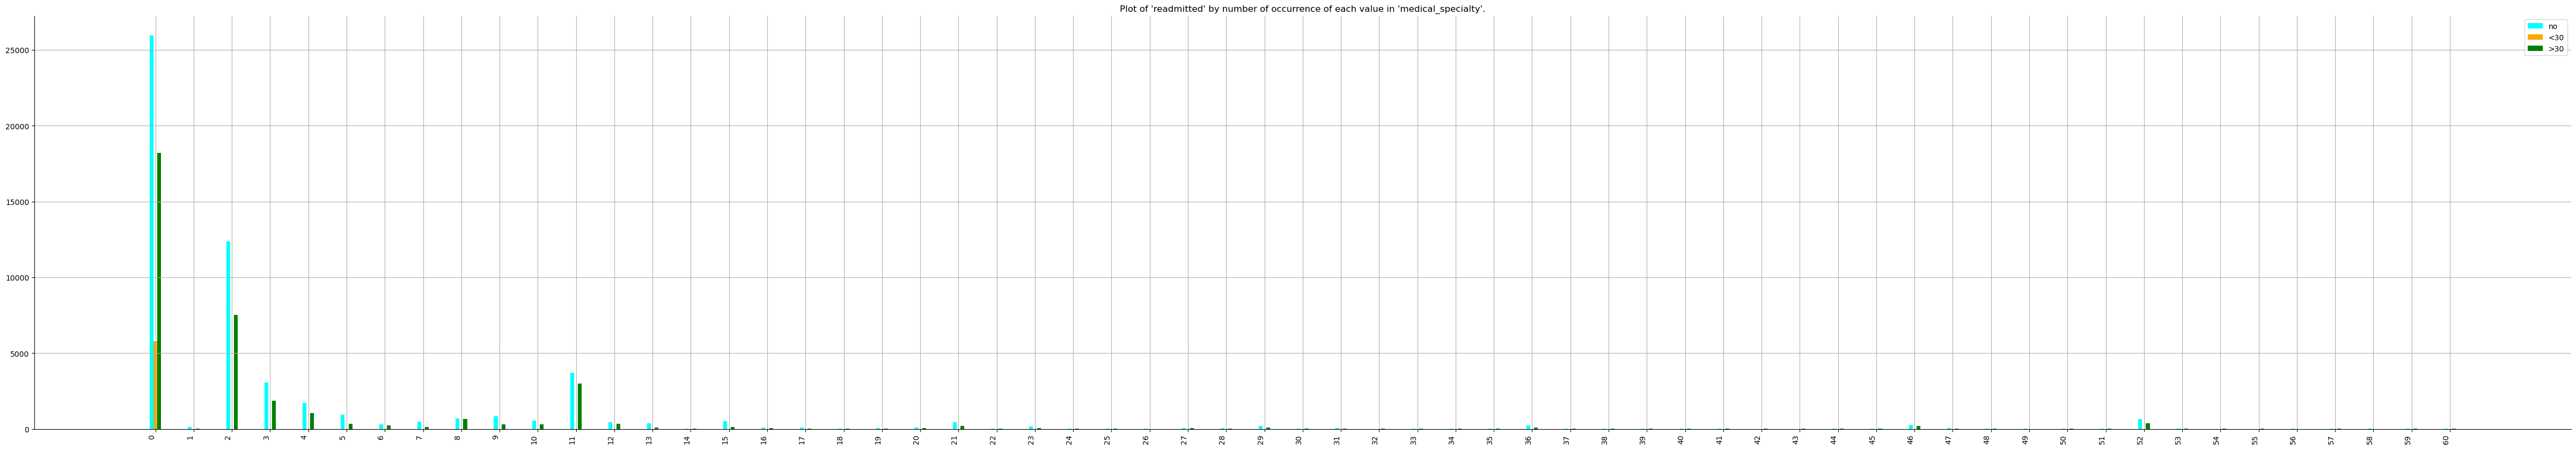

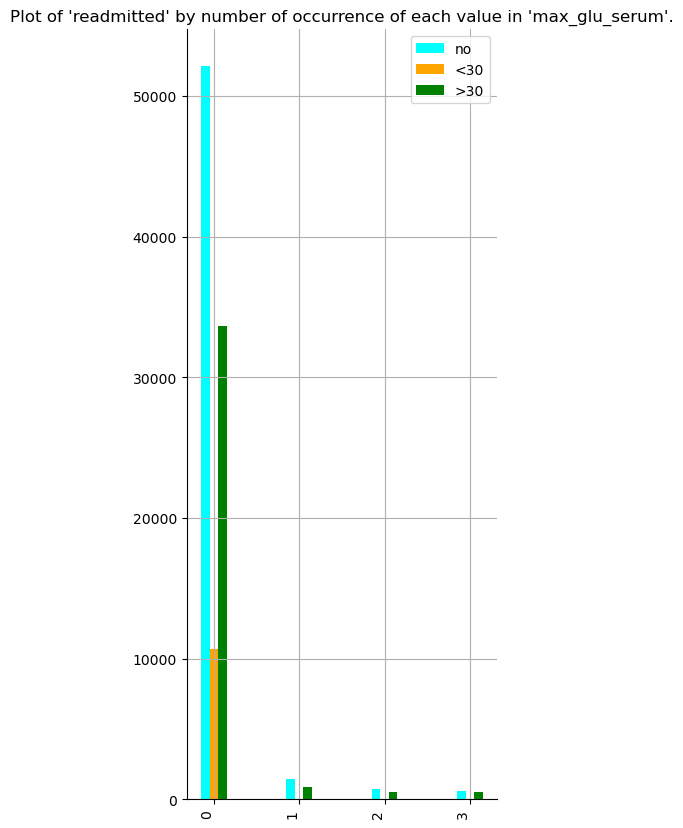

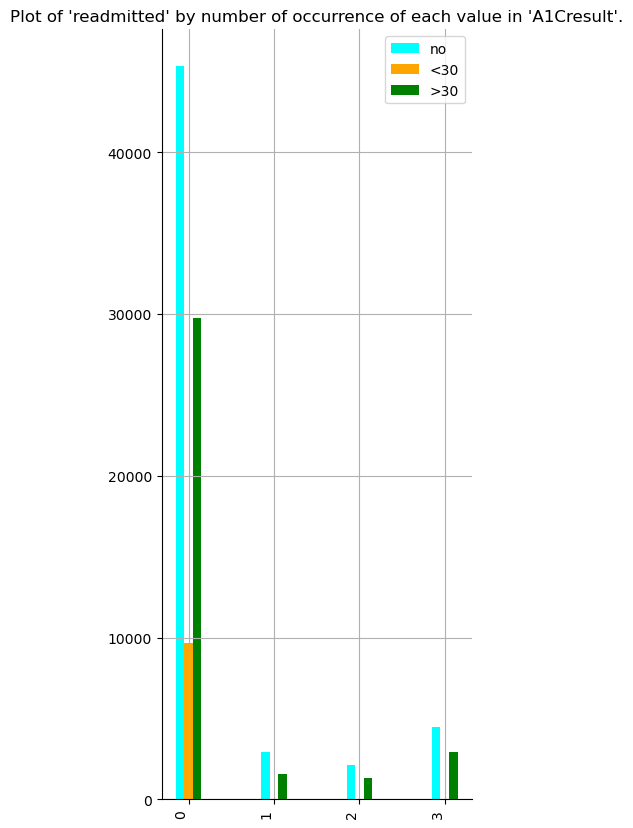

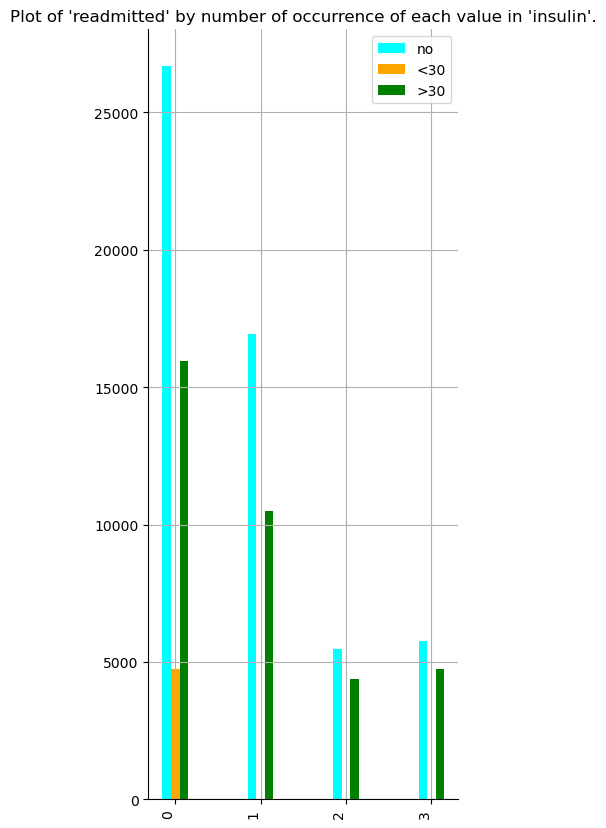

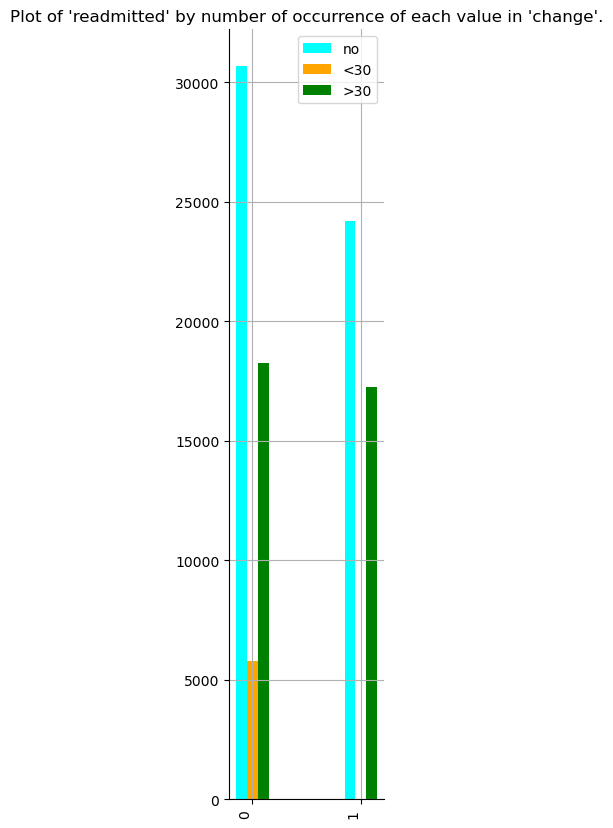

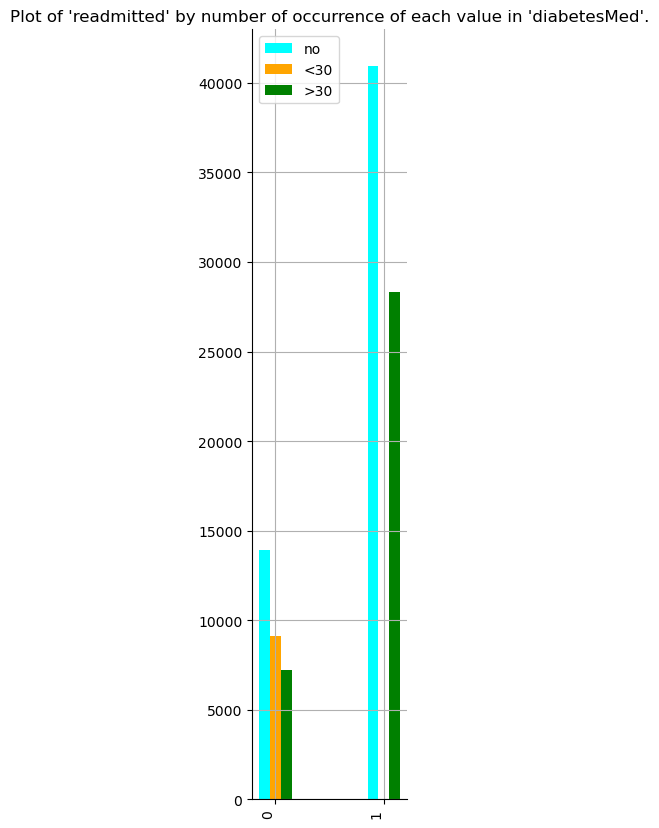

In [154]:
columns_of_interest = [
    'readmitted',
    'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
    'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses',
    'admission_type_id', 'discharge_disposition_id',
    'admission_source_id', 'payer_code', 'medical_specialty',
    'max_glu_serum', 'A1Cresult', 'insulin', 'change', 'diabetesMed'
    ]
plot_number_occurrences_per_readmitted_values(df, 0.1, 0.1, 10, 90, False, True, str(FIG_DIR), subfolder_names[0], columns_of_interest)

#### PairPlot

In [156]:
do_pairplot(columns_in_question_numerical, df, 90, str(FIG_DIR), subfolder_names[6])

<Figure size 23600x23600 with 0 Axes>

#### Correlation Heatmap

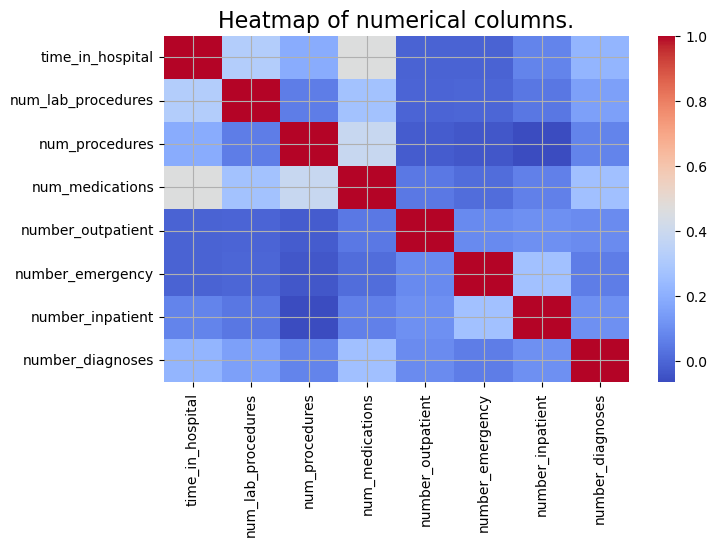

                    time_in_hospital  num_lab_procedures  num_procedures  num_medications  number_outpatient  number_emergency  \
time_in_hospital            1.000000            0.318450        0.191472         0.466135          -0.008916         -0.009681   
num_lab_procedures          0.318450            1.000000        0.058066         0.268161          -0.007602         -0.002279   
num_procedures              0.191472            0.058066        1.000000         0.385767          -0.024819         -0.038179   
num_medications             0.466135            0.268161        0.385767         1.000000           0.045197          0.013180   
number_outpatient          -0.008916           -0.007602       -0.024819         0.045197           1.000000          0.091459   
number_emergency           -0.009681           -0.002279       -0.038179         0.013180           0.091459          1.000000   
number_inpatient            0.073623            0.039231       -0.066236         0.064194 

In [158]:
create_correlation_heatmap(df, columns_in_question_numerical, str(FIG_DIR), subfolder_names[3])

#### Basic Analysis and Charts

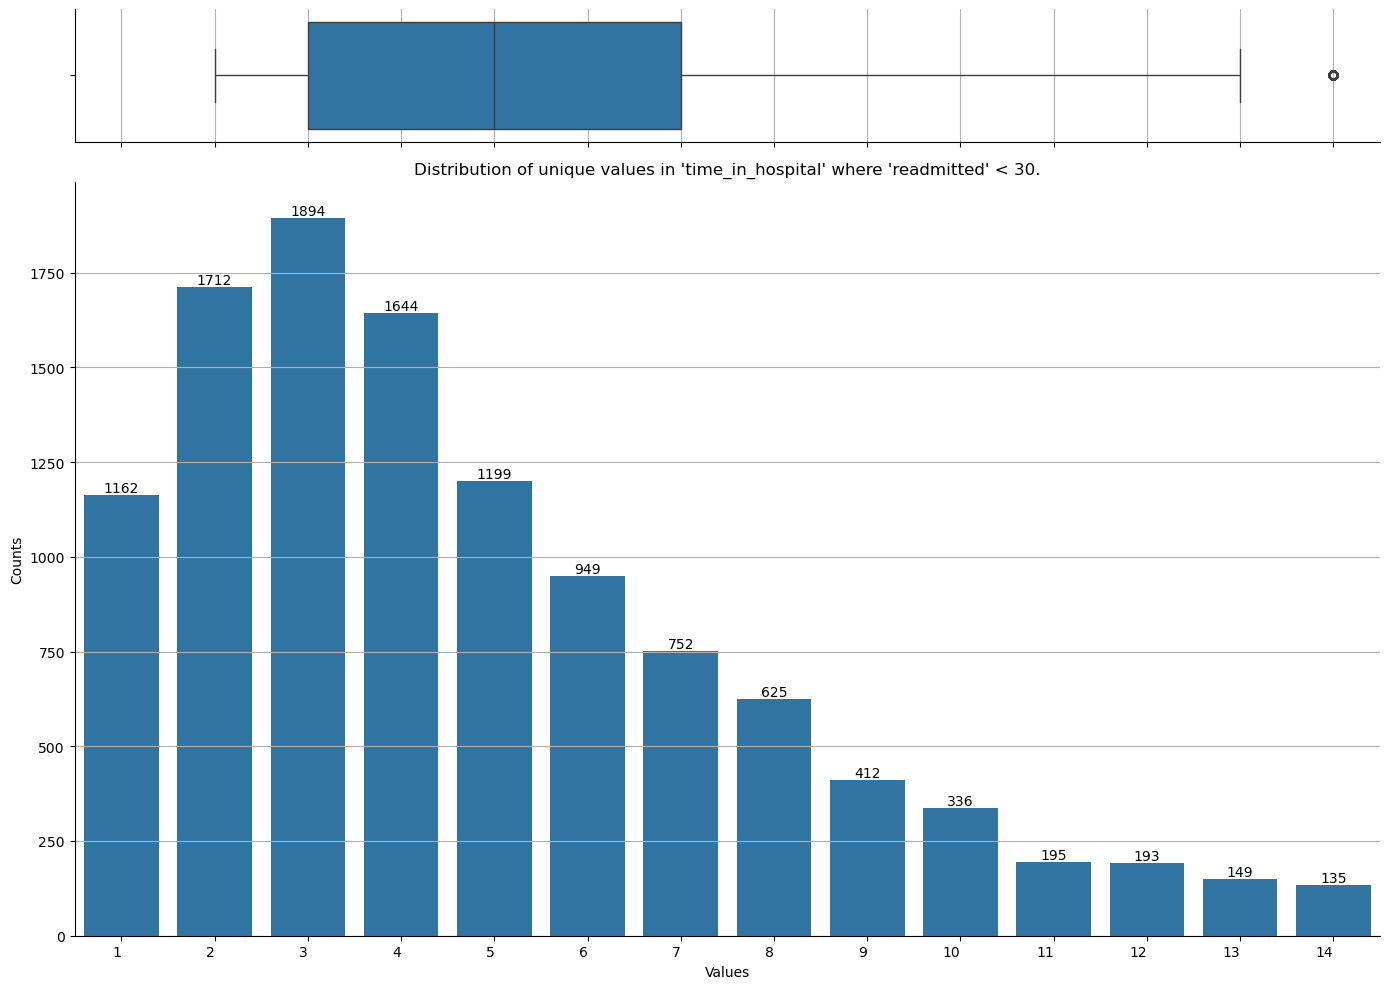

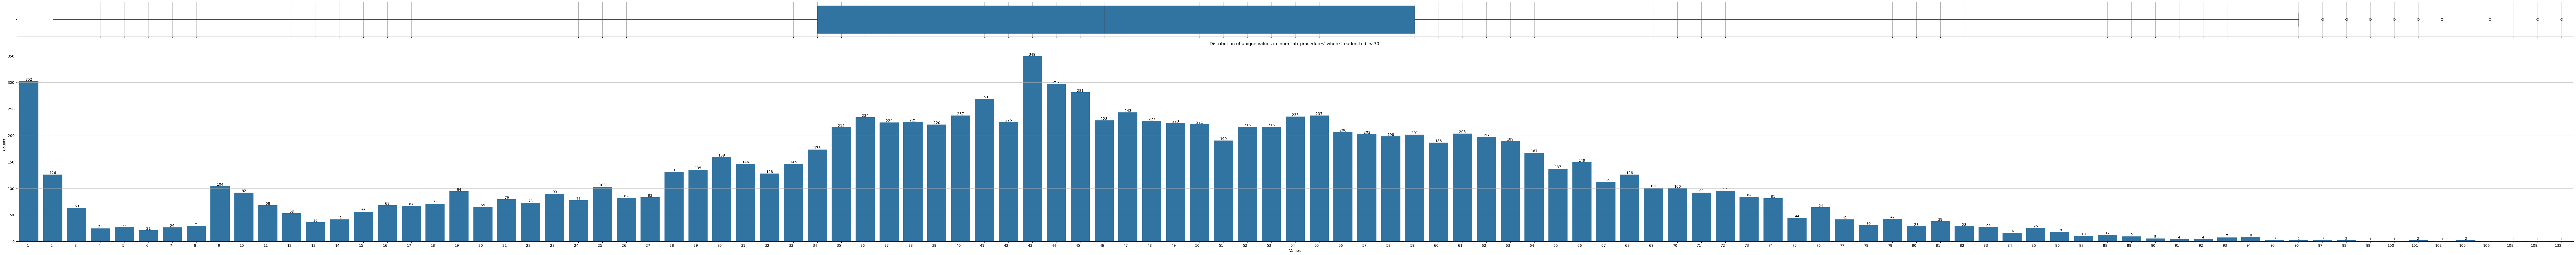

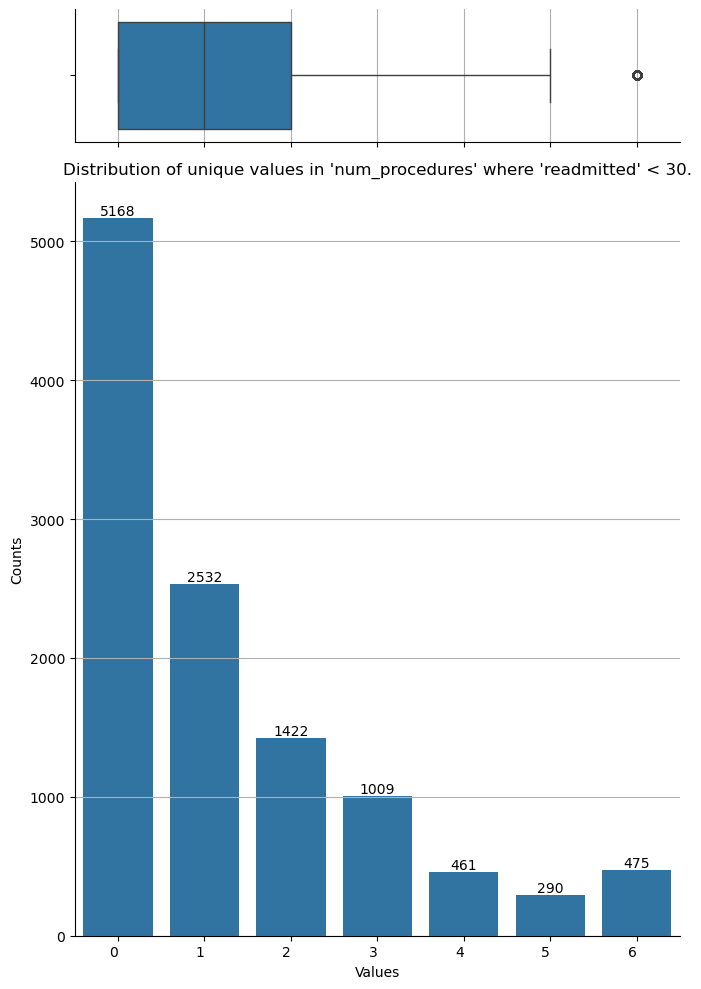

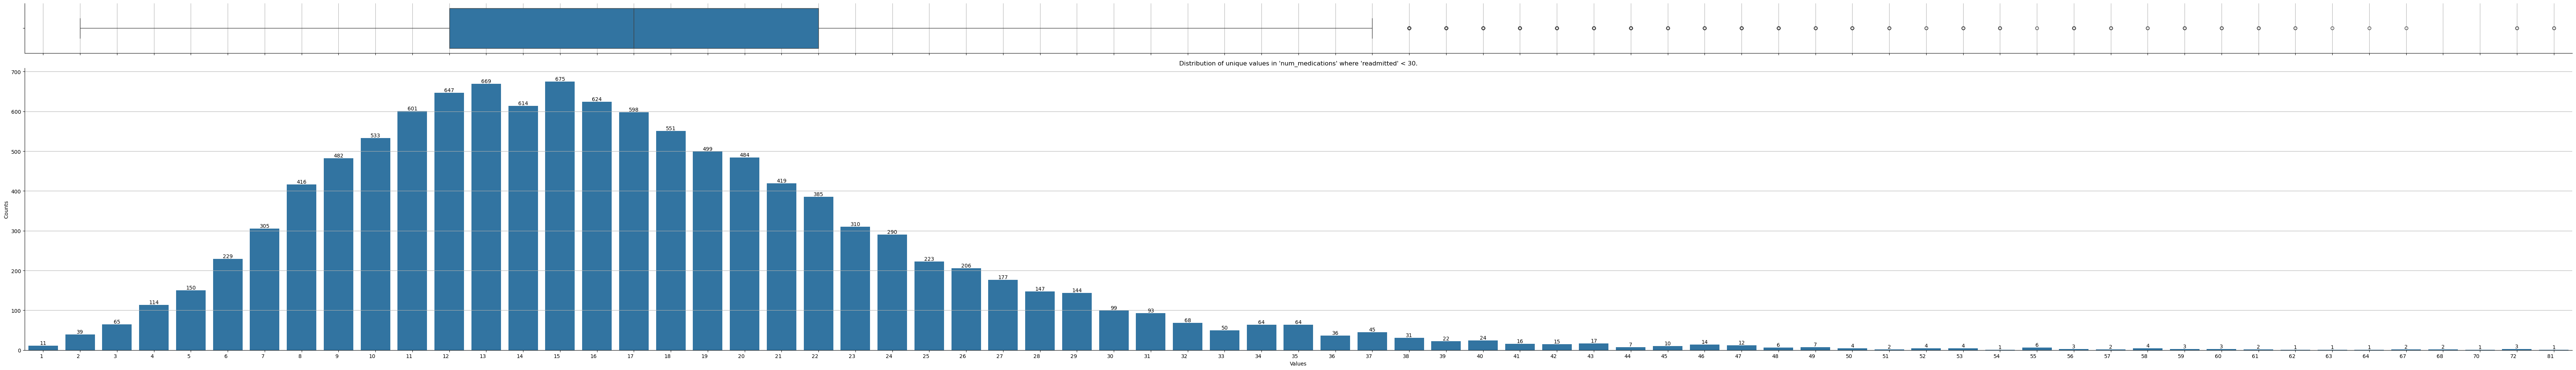

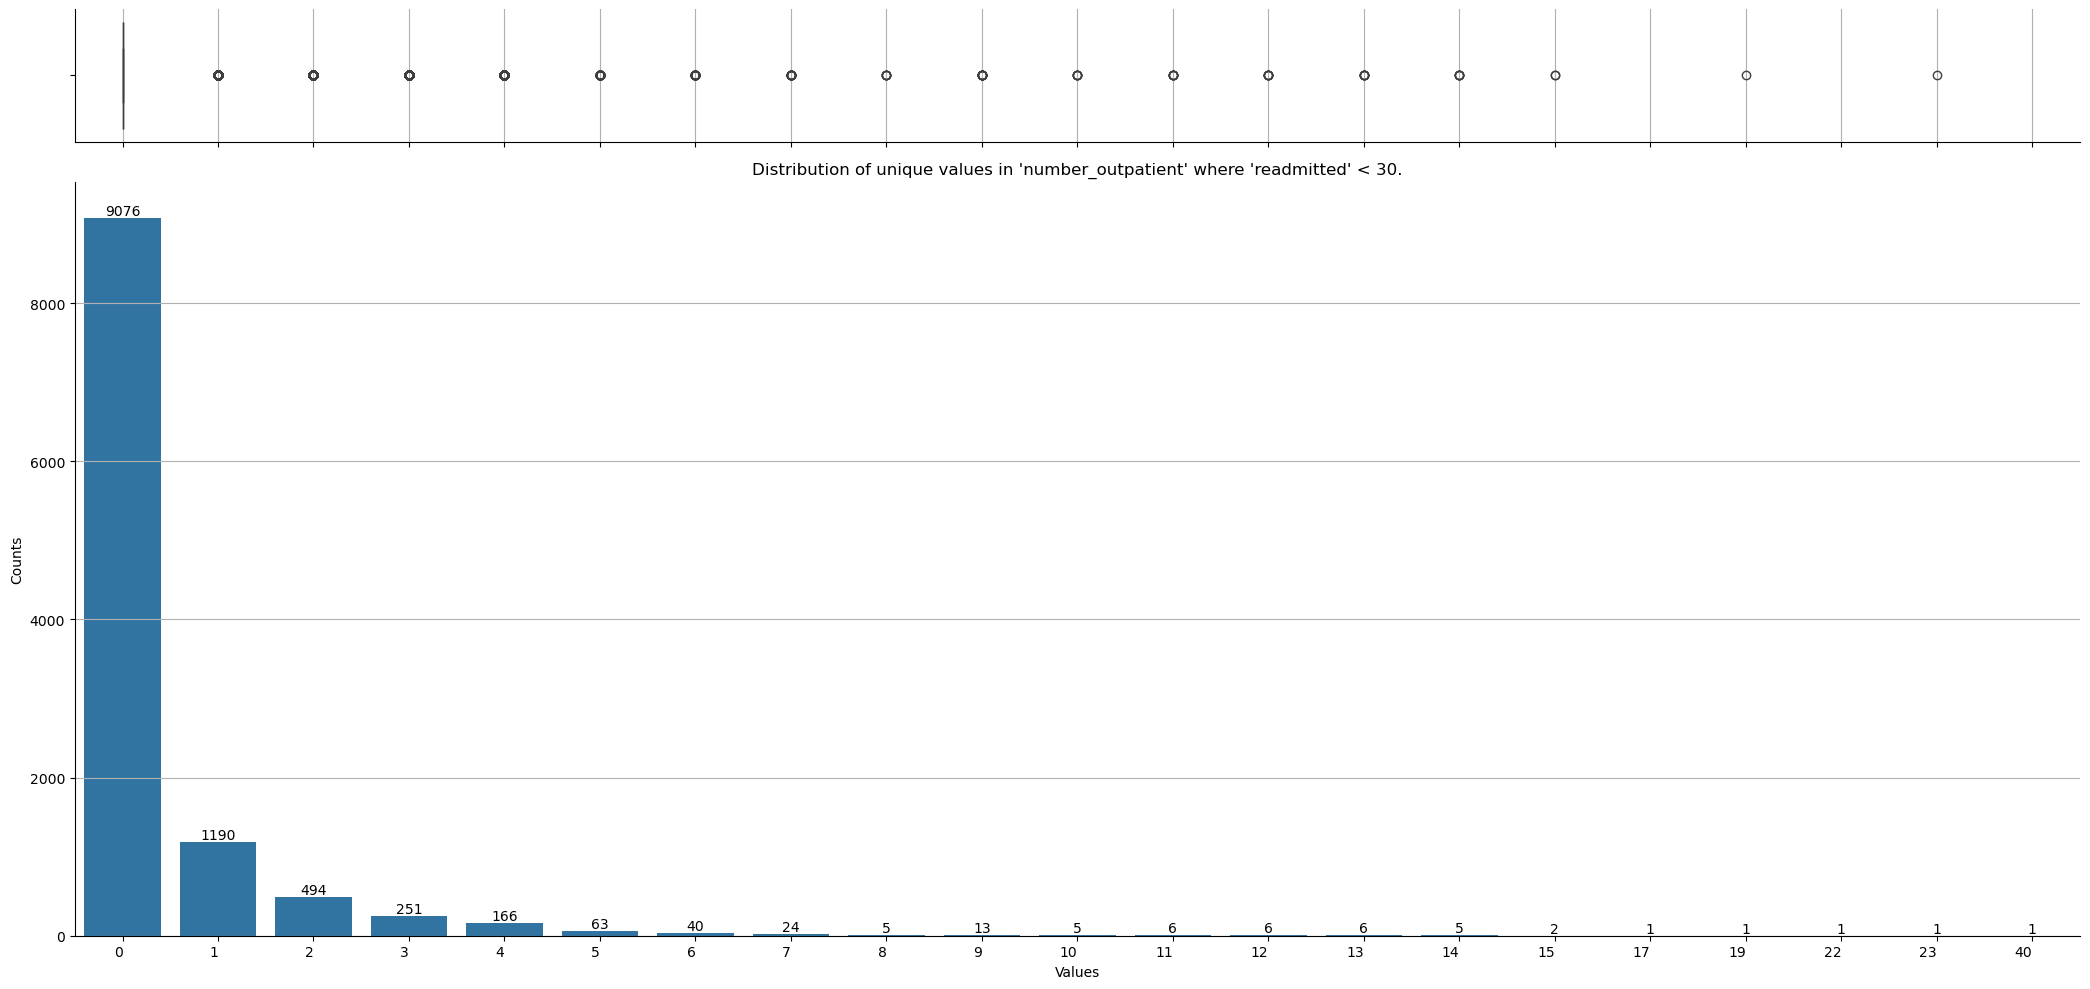

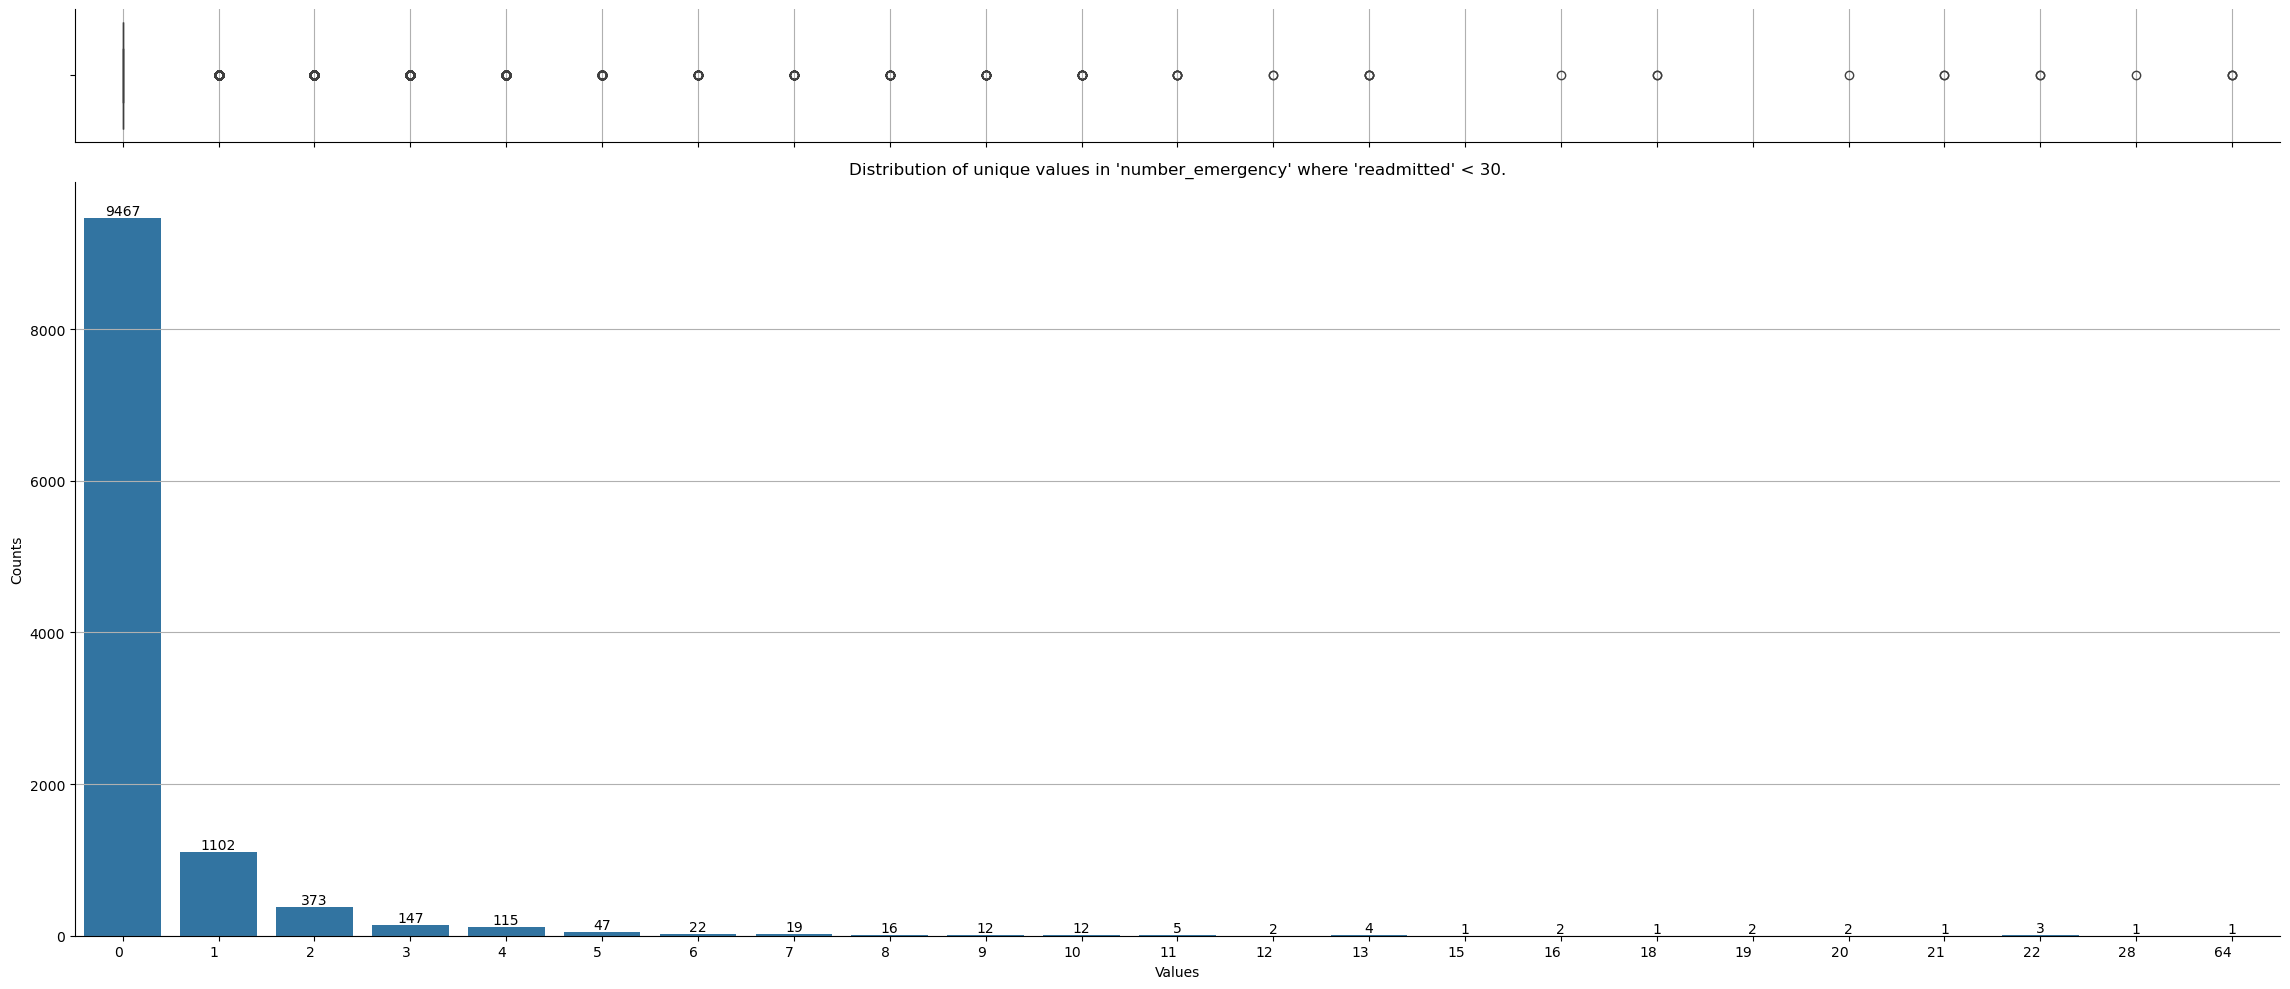

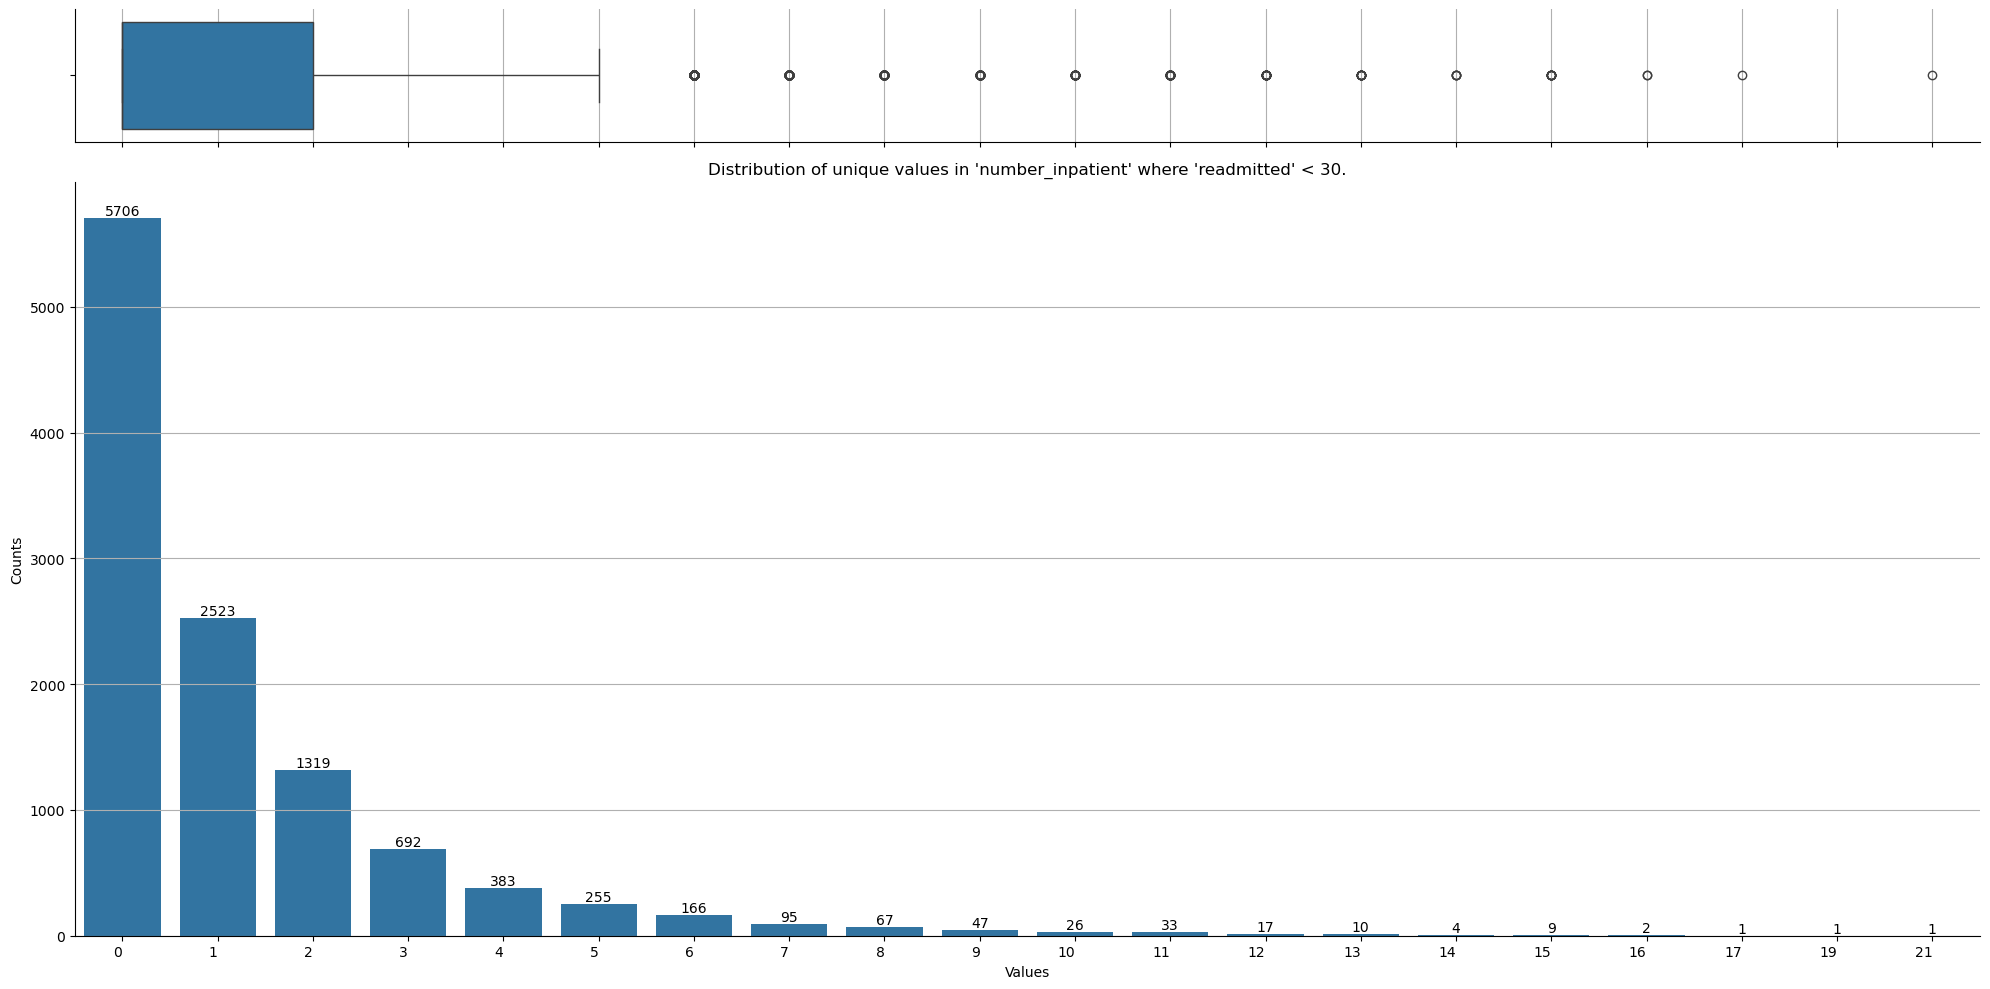

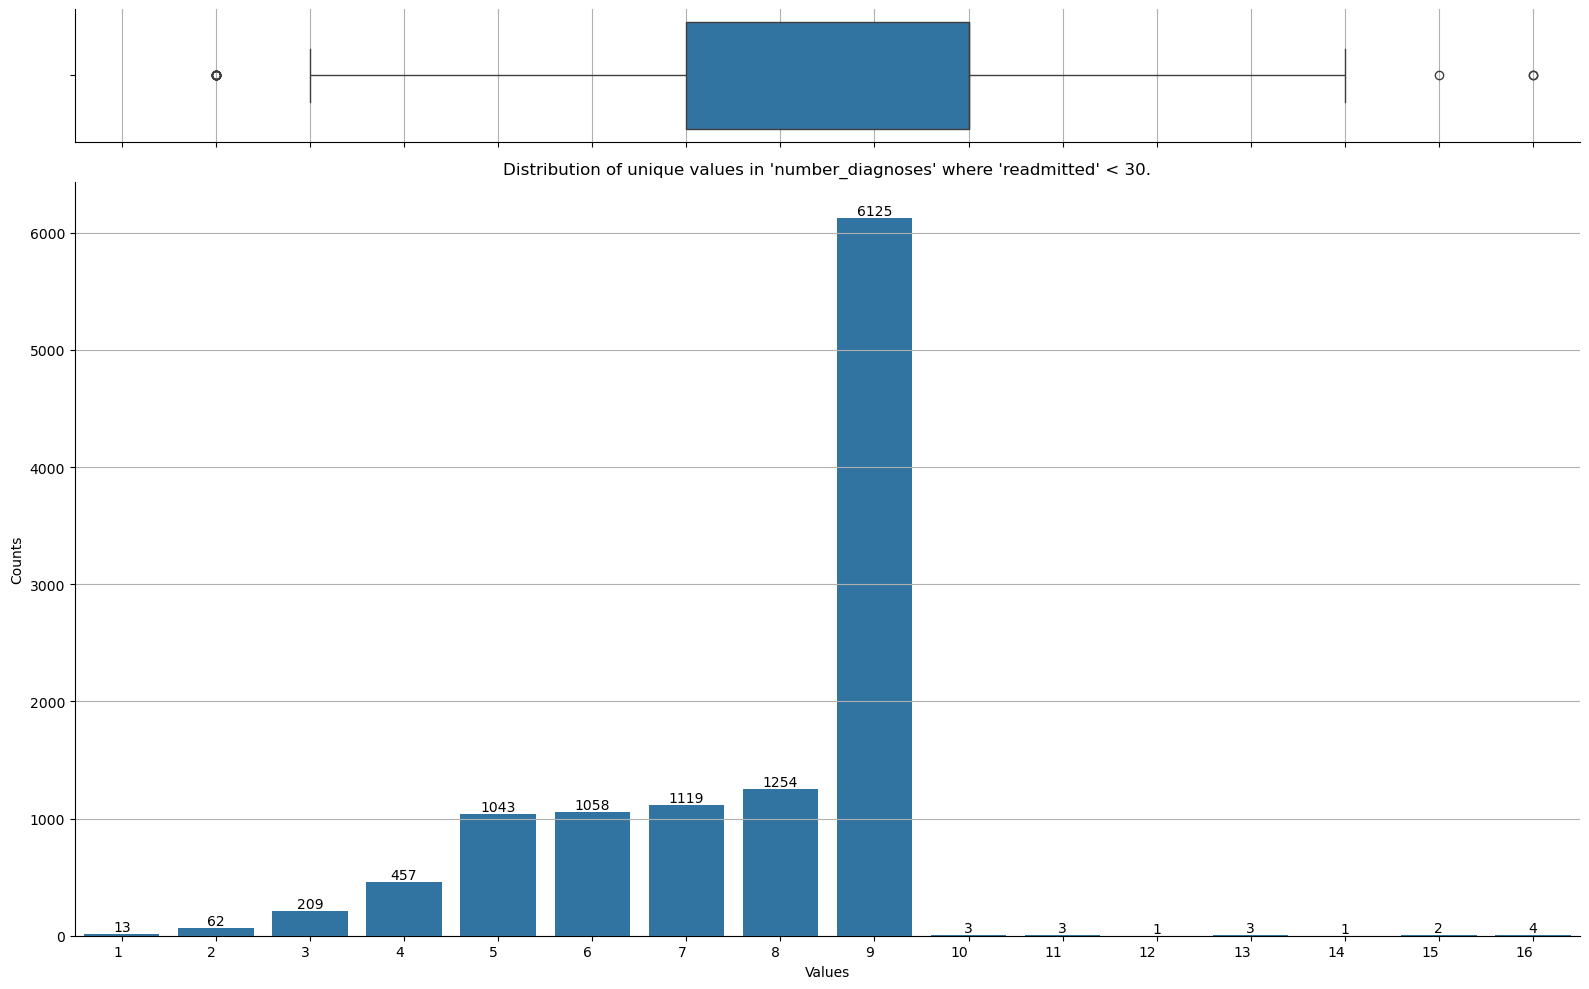

In [160]:
columns_of_interest_numerical = [
    'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
    'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses'
    ]

do_basic_analysis_and_charts(columns_of_interest_numerical, 'numerical', df, 0, str(FIG_DIR), subfolder_names[1], column_label_dictionaries)

Other Stuff

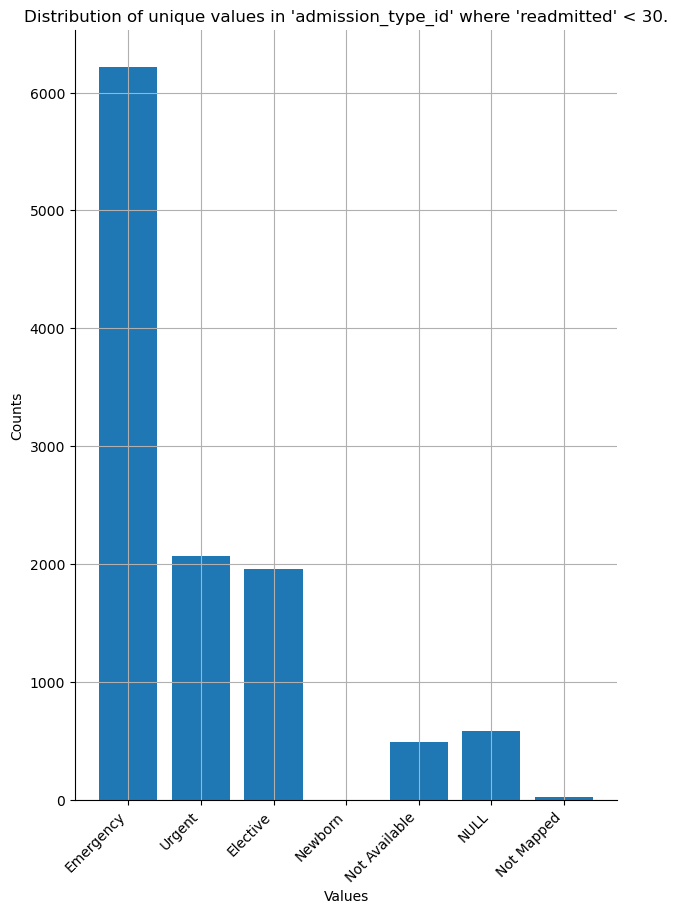

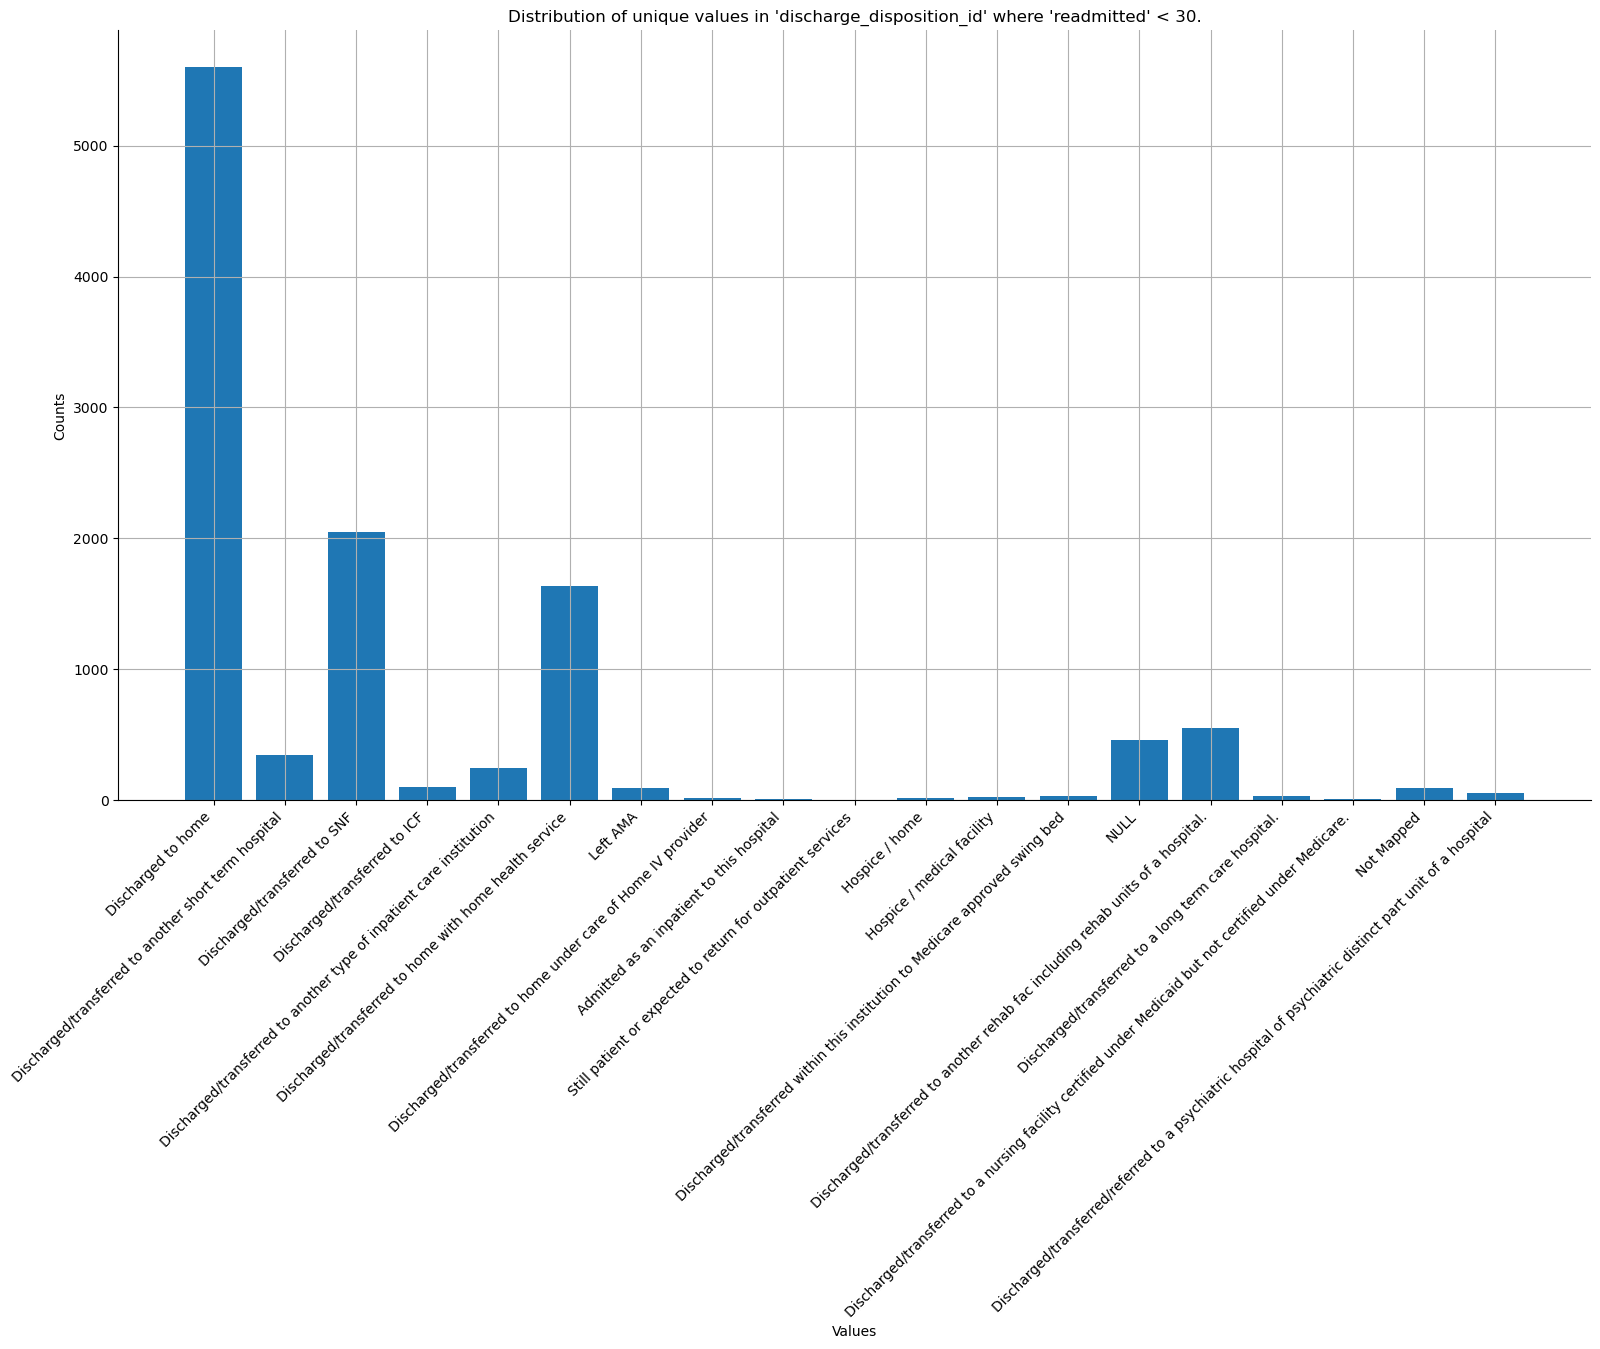

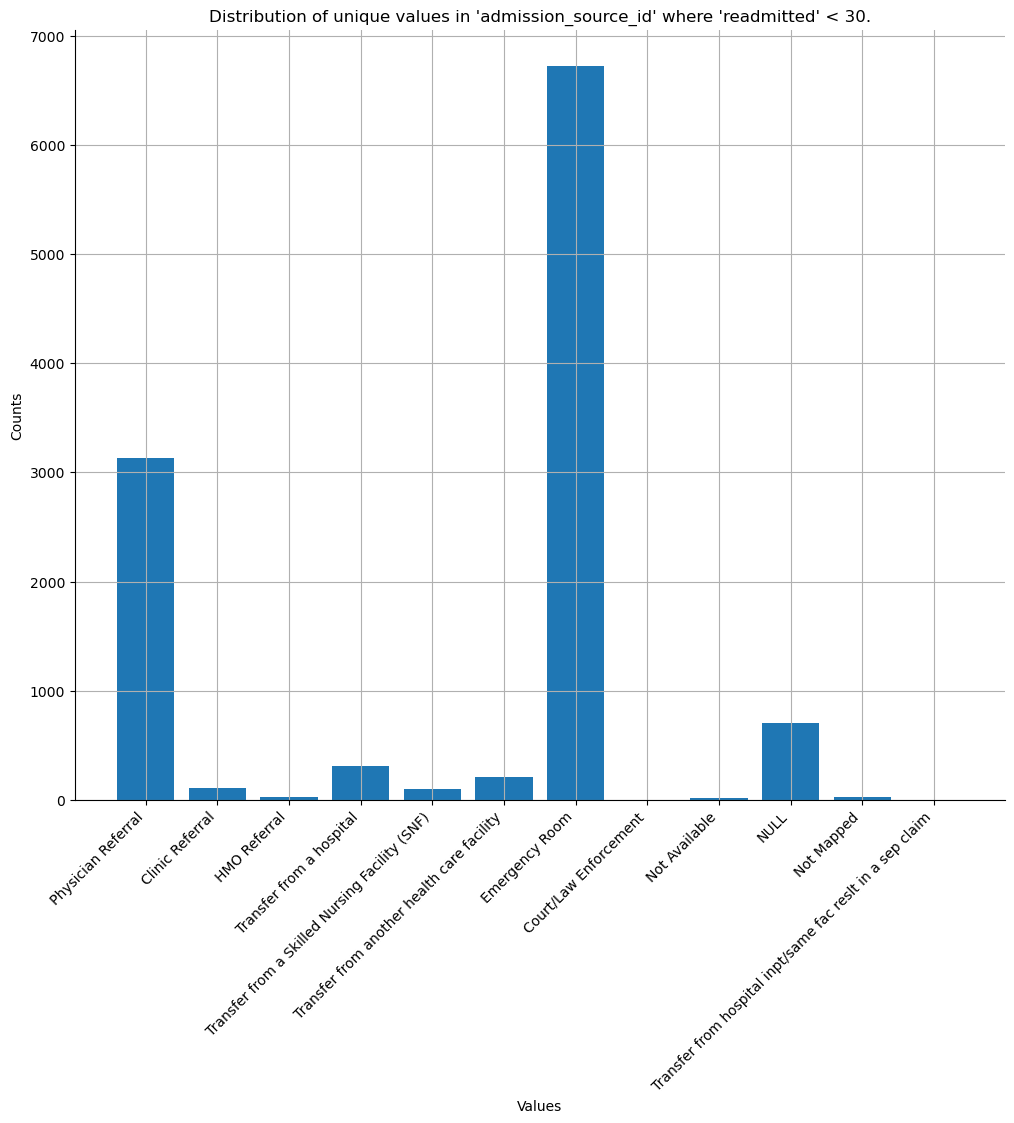

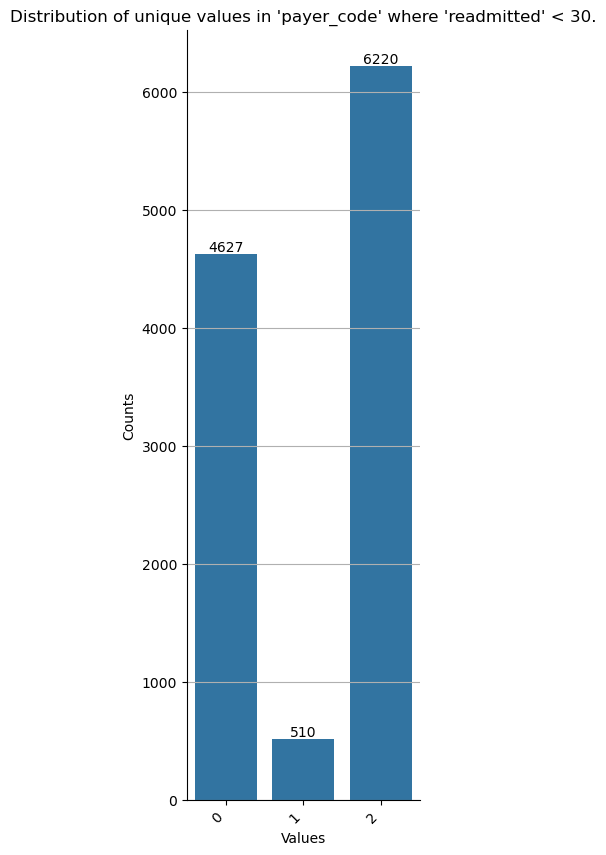

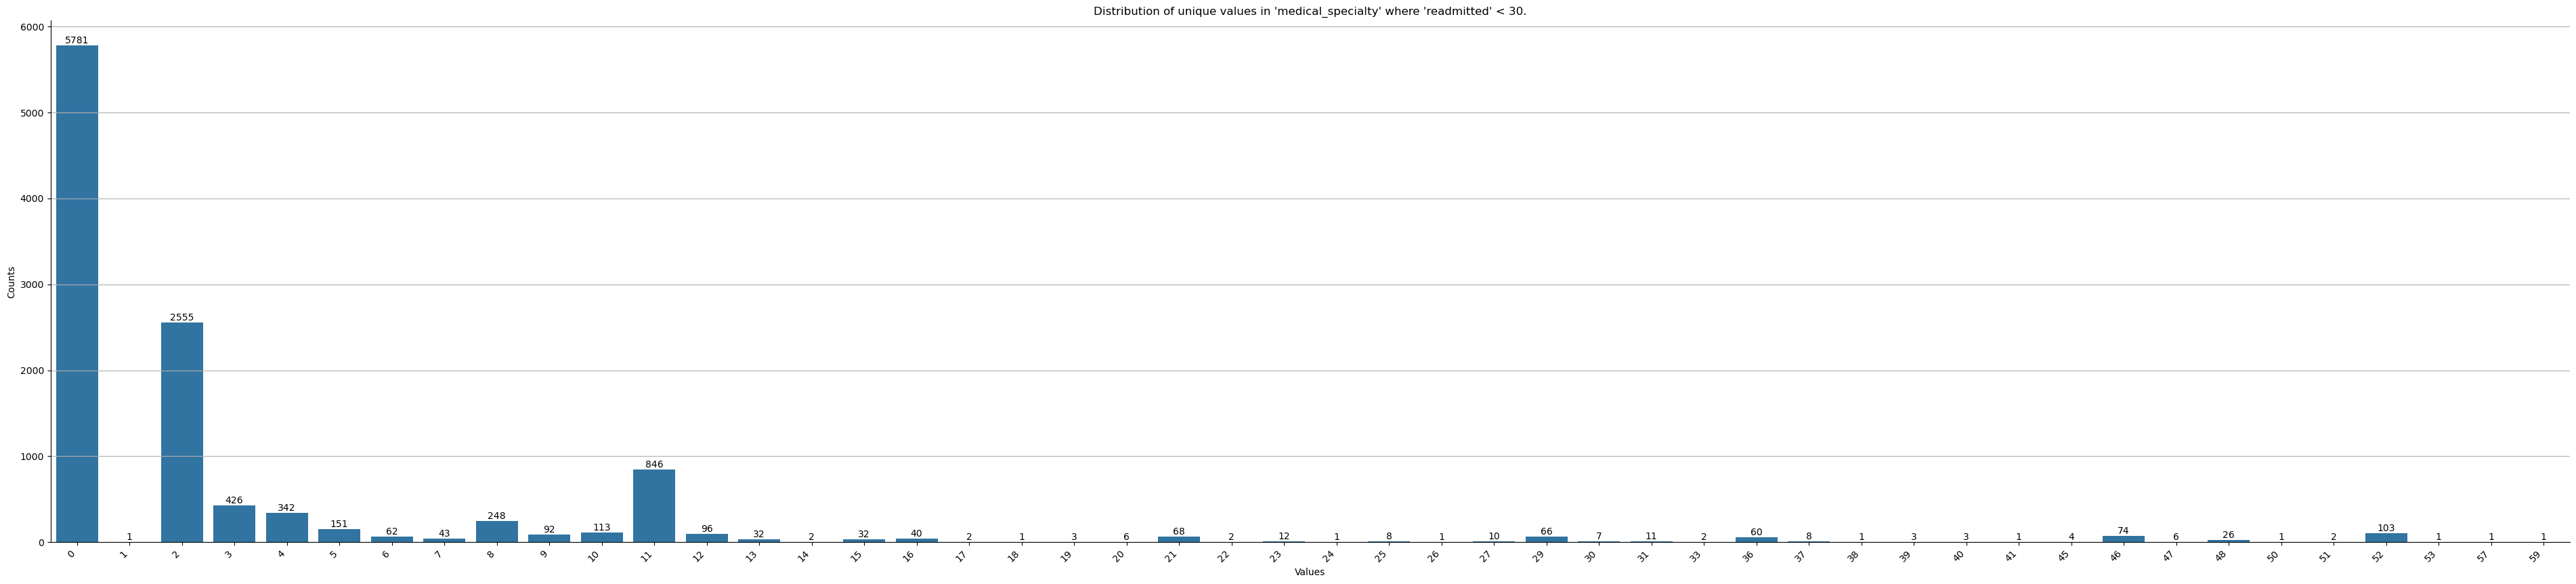

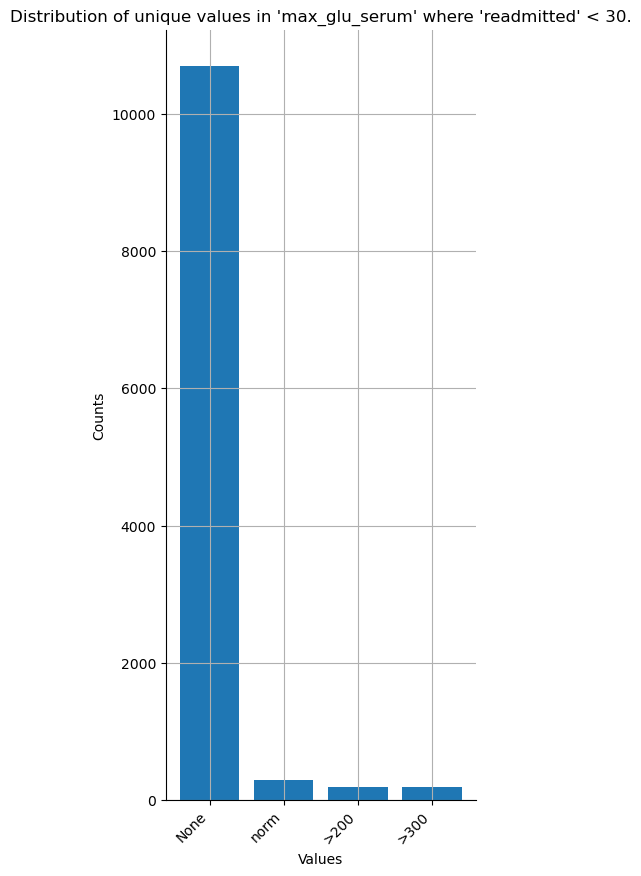

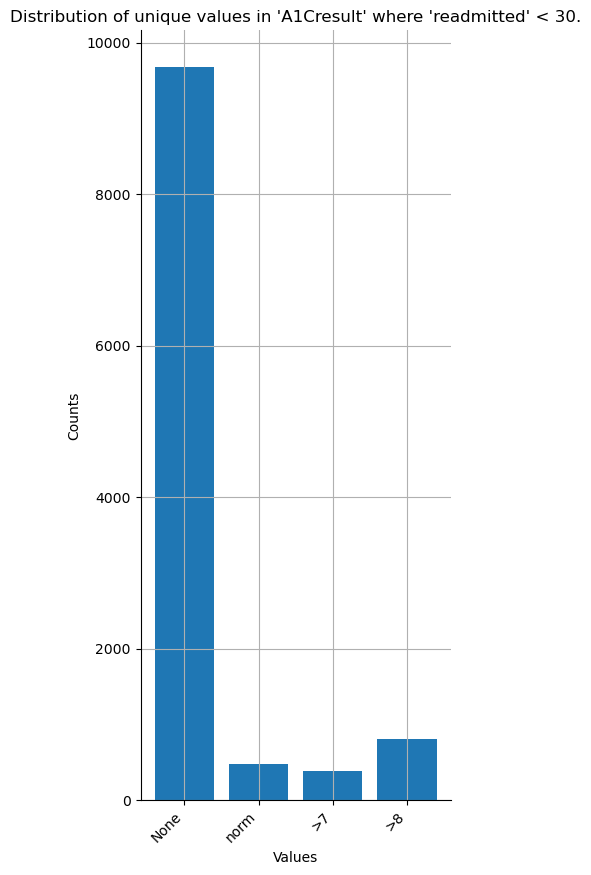

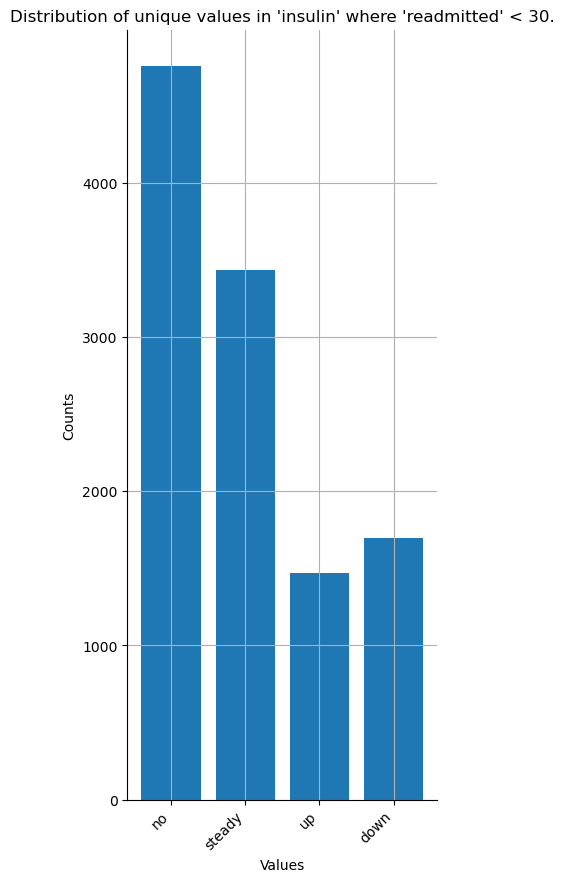

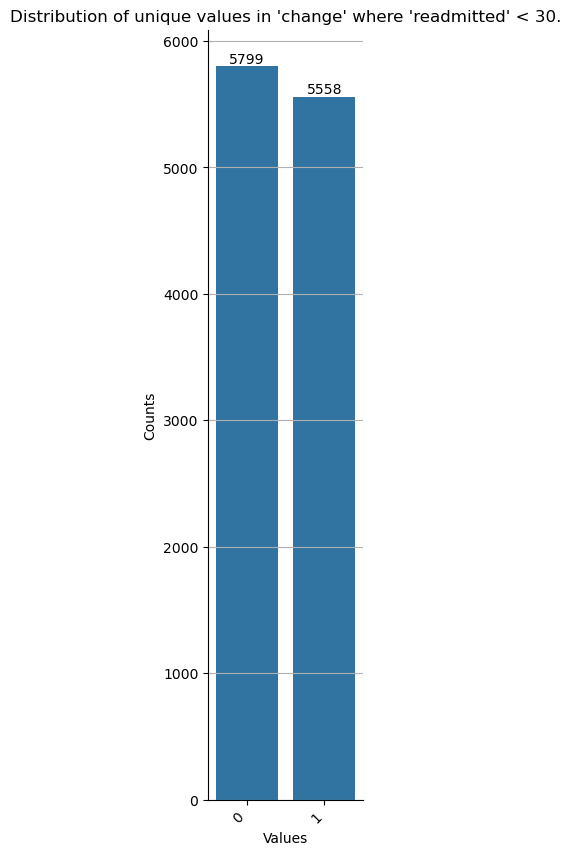

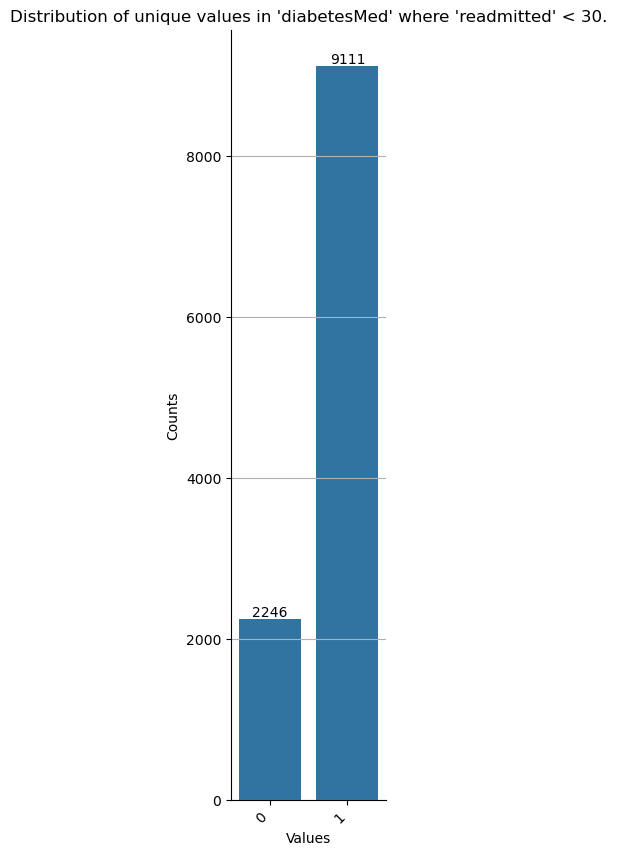

In [162]:
columns_of_interest_categorical = [
    'admission_type_id', 'discharge_disposition_id',
    'admission_source_id', 'payer_code', 'medical_specialty',
    'max_glu_serum', 'A1Cresult', 'insulin', 'change', 'diabetesMed'
    ]

do_basic_analysis_and_charts(columns_of_interest_categorical, 'categorical', df, 45, str(FIG_DIR), subfolder_names[1], column_label_dictionaries)

#### Violin Plots

In [164]:
columns_of_interest_numerical = ['time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
columns_of_interest_categorical = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'payer_code', 'max_glu_serum', 'A1Cresult', 'insulin', 'change', 'diabetesMed']

do_violinplots(columns_of_interest_numerical, columns_of_interest_categorical, df, 90, str(FIG_DIR), subfolder_names[5])

**Observation:** The distribution suggests potential outliers or skewness that should be examined further.

#### Summary tables

In [167]:
ARTIFACTS = REPO_ROOT / "processed"
ARTIFACTS.mkdir(parents=True, exist_ok=True)

# Target distribution
target_counts = df[TARGET].value_counts().sort_index()
target_pct = (target_counts/target_counts.sum()*100).round(2)
pd.DataFrame({"count": target_counts, "pct": target_pct}).to_csv(ARTIFACTS / "target_distribution.csv")

# A1C vs <30
(pd.DataFrame({"rate_lt30": (df[TARGET]==1).groupby(df["A1Cresult"]).mean()})
 .reindex([0,1,2,3])
 .to_csv(ARTIFACTS / "a1c_vs_lt30.csv"))

# Insulin vs <30
(pd.DataFrame({"rate_lt30": (df[TARGET]==1).groupby(df["insulin"]).mean()})
 .reindex([0,1,2,3])
 .to_csv(ARTIFACTS / "insulin_vs_lt30.csv"))

## Phone's Encoding

### Encoding diabetes_with_idf

The cleaned dataframe diabetes_with_idf contains 101766 rows and 53 columns after processing. We selected multiple encoding methods for analysis before choosing choosing the below encoding.

- Label / integer encoding

The original DiabetesDF received integer code assignments for race and gender and age which used 0, 1, 2 and so on. The application of label encoding to nominal features creates artificial order between categories which linear models including logistic regression can mistakenly identify as significant relationships. The diabetes_with_idf dataset will not apply basic label encoding to its nominal columns.

- One-hot encoding

The process of one-hot encoding produces new binary columns which indicate whether each row belongs to a specific category through 1/0 values (1 if the row is in that category, 0 otherwise). The method protects against fake ordering issues while working properly for nominal variables when the number of categories remains within acceptable ranges. The dataset contains already reduced high-cardinality columns (diag_1_consol, medical_specialty_consol, admission_source_consol, and discharge_disposition_consol) which we can apply one-hot encoding to their grouped versions instead of their original ICD codes and specialty strings.

- Ordinal encoding

Ordinal encoding is only appropriate when the categories really have an order (for example, “low < medium < high”). In this dataset, that applies to:

Ordinal encoding needs categories which already have an existing value sequence starting from “low < medium < high”. The following variables in the dataset show ordered relationships between their categories.

    - The age categories follow an ordered sequence from ([0-10] to [90-100]).

    - A1Cresult contains values that range from No Test Taken to Norm and then >7 and >8.

    - max_glu_serum contains three categories which start at No Test Taken followed by Norm and then >200 and >300.

    - The EDA results show that the insulin usage variable leads to a rising <30-day readmission rate which starts at "No" before shifting to "Down".

The model will receive ordered integer values which represent each category position in the sequence to allow meaningful differentiation between higher and lower levels.

- Binary medication flags and derived features

The medication columns containing metformin and glyburide and additional drugs contain values which include No and Steady and Up and Down. We will transform these medication strings into two binary indicators which indicate drug usage and dose modification.

    - drug_X_any = 1 when patients receive this medication (except No value) and 0 when they do not receive it.

    - drug_X_changed = 1 when patients experience dose changes between Up and Down but remains 0 when their medication stays at a steady level or they do not receive treatment.

The insulin data will maintain both its ordinal representation (0-3) from No to Steady to Up to Down and an additional insulin_changed indicator. The EDA results showed that changes to insulin dosages increase the risk of readmission during the first thirty days so we will preserve this particular data point.

- Target definition

The readmitted column from the original dataset contains three possible values which are NO and >30 and <30. The prediction task requires a binary outcome so we transform the readmitted column into a binary label:

    - 1 if readmitted == "<30" (readmitted within 30 days),

    - 0 if readmitted is NO or >30 (no readmission or readmission after 30 days).

The prediction task will then operates as a standard binary classification problem.

Final plan

- The process of removing pure identifier columns and high-cardinality columns will start after we obtain their grouped versions (encounter_id, patient_nbr, the raw diag_1, diag_2, diag_3, medical_specialty, admission_source, and discharge_disposition, as well as the already-unused weight, examide, and citoglipton). These columns either carry no predictive signal (IDs) or are replaced by more compact grouped versions.

- The main numerical count features including time_in_hospital and num_lab_procedures and num_procedures and num_medications and number_outpatient and number_emergency and number_inpatient and number_diagnoses will stay as numeric variables. The modeling pipeline will receive standardized variables through mean 0 and standard deviation 1 but visit count variables with extreme values might benefit from log(1 + x) transformation as in reducing the impact of extreme values so we will consider it too.

- The model will receive ordinal-encoded values for age and A1Cresult and max_glu_serum and insulin through specific ordered mappings which match their clinical or natural sequence. The model will recognize between no test records and normal values through additional missing-value flags for A1Cresult and max_glu_serum.

- For the medication columns, we will create binary *_any and *_changed features to capture whether each drug was used and whether its dose was adjusted. We will convert Yes/No values from change and diabetesMed flags into 1/0 binary format for model input.

- The model will receive one-hot encoded nominal categories from race and gender and payer_code and admission_type and medical_specialty_consol and diag_1_consol and diag_2_consol and diag_3_consol and admission_source_consol and discharge_disposition_consol. The model operates independently on each category by using its dedicated indicator which does not establish any predetermined ranking order.

The complete numeric design matrix for modeling will become available through this combination of encoding methods which handle numeric and ordinal and nominal data types.

In [171]:
df = diabetes_with_idf
print("Shape:", df.shape)
df.head(3)

Shape: (101766, 56)


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,admission_source,admission_type,discharge_disposition,medical_specialty_consol,diag_1_consol,diag_2_consol,diag_3_consol,admission_source_consol,discharge_disposition_consol
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,No Test Taken,No Test Taken,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,Physician Referral,NaN,NaN,Pediatrics,Diabetes Mellitus,NaN,NaN,Referral/Planned Admission,NaN
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,No Test Taken,No Test Taken,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,Emergency Room,Emergency,Discharged to home,NaN,ENDOCRINE/NUTRITIONAL/METABOLIC/IMMUNITY,Diabetes Mellitus,ENDOCRINE/NUTRITIONAL/METABOLIC/IMMUNITY,Emergency/Unplanned Admission,Home
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,No Test Taken,No Test Taken,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,Emergency Room,Emergency,Discharged to home,NaN,PREGNANCY/CHILDBIRTH/PUERPERIUM,Diabetes Mellitus,V-Code: Reproduction & Development,Emergency/Unplanned Admission,Home


Using the plan above, we now encode diabetes_with_idf into a numeric feature matrix X (101,766 × 194) and a binary target vector y indicating <30 readmission.

In [173]:
# cleaned dataframe
df = diabetes_with_idf.copy()

# Drop pure IDs, raw high-cardinality columns, and already-uninformative columns
cols_to_drop_initial = [
    "encounter_id",
    "patient_nbr",
    "diag_1", "diag_2", "diag_3",
    "medical_specialty",
    "admission_source", "discharge_disposition",
    "weight", "examide", "citoglipton",
]

df = df.drop(columns=[c for c in cols_to_drop_initial if c in df.columns], errors="ignore")

# Binary target: readmitted within 30 days vs not
df["readmit_30"] = (df["readmitted"] == "<30").astype(int)
df = df.drop(columns=["readmitted"])  # drop original 3-level label from features

TARGET = "readmit_30"

# Missing flags for A1Cresult and max_glu_serum
for col in ["A1Cresult", "max_glu_serum"]:
    df[col + "_missing"] = df[col].isna().astype(int)

# Ordinal encodings

# age buckets
age_order = [
    "[0-10)", "[10-20)", "[20-30)", "[30-40)",
    "[40-50)", "[50-60)", "[60-70)", "[70-80)",
    "[80-90)", "[90-100)",
]
age_map = {cat: i for i, cat in enumerate(age_order)}
df["age_ord"] = df["age"].map(age_map)

# A1Cresult order: use the cleaned categories
a1c_order = ["No Test Taken", "Norm", ">7", ">8"]
a1c_map = {cat: i for i, cat in enumerate(a1c_order)}
df["A1Cresult_ord"] = df["A1Cresult"].map(a1c_map)

# max_glu_serum order
glu_order = ["No Test Taken", "Norm", ">200", ">300"]
glu_map = {cat: i for i, cat in enumerate(glu_order)}
df["max_glu_serum_ord"] = df["max_glu_serum"].map(glu_map)

# insulin: semi-ordinal and derived flag
insulin_order = ["No", "Steady", "Up", "Down"]
insulin_map = {cat: i for i, cat in enumerate(insulin_order)}
df["insulin_ord"] = df["insulin"].map(insulin_map)
df["insulin_changed"] = df["insulin"].isin(["Up", "Down"]).astype(int)

# Medication columns: binary any/changed flags
drug_cols = [
    "metformin", "repaglinide", "nateglinide", "chlorpropamide", "glimepiride",
    "acetohexamide", "glipizide", "glyburide", "tolbutamide",
    "pioglitazone", "rosiglitazone", "acarbose", "miglitol",
    "troglitazone", "tolazamide",
    "glyburide-metformin", "glipizide-metformin",
    "glimepiride-pioglitazone", "metformin-rosiglitazone",
    "metformin-pioglitazone",
]

for col in drug_cols:
    upper = df[col].str.upper()
    df[f"{col}_any"] = (upper != "NO").astype(int)
    df[f"{col}_changed"] = upper.isin(["UP", "DOWN"]).astype(int)

# change / diabetesMed as binary flags
df["change_flag"] = df["change"].str.lower().eq("ch").astype(int)
df["diabetesMed_flag"] = df["diabetesMed"].str.lower().eq("yes").astype(int)

# Nominal categorical features to one-hot encode
nominal_cols = [
    "race",
    "gender",
    "payer_code",
    "admission_type",
    "medical_specialty_consol",
    "diag_1_consol", "diag_2_consol", "diag_3_consol",
    "admission_source_consol", "discharge_disposition_consol",
]

# Fill NaN with explicit "Missing" level
for col in nominal_cols:
    if col in df.columns:
        df[col] = df[col].fillna("Missing")

# Drop original string versions just encoded
cols_to_drop_after_encoding = (
    ["age", "A1Cresult", "max_glu_serum", "insulin", "change", "diabetesMed"]
    + drug_cols
)

df_model = df.drop(columns=[c for c in cols_to_drop_after_encoding if c in df.columns], errors="ignore")

# One-hot encode nominal columns
df_encoded = pd.get_dummies(
    df_model,
    columns=[c for c in nominal_cols if c in df_model.columns],
    drop_first=True  # drop_first=True to reduce multicollinearity
)

# Final X, y for modeling
y = df_encoded[TARGET].copy()
X = df_encoded.drop(columns=[TARGET])

print("X shape:", X.shape)
print("y shape:", y.shape)
X.head()

X shape: (101766, 197)
y shape: (101766,)


,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,A1Cresult_missing,max_glu_serum_missing,age_ord,A1Cresult_ord,max_glu_serum_ord,insulin_ord,insulin_changed,metformin_any,metformin_changed,repaglinide_any,repaglinide_changed,nateglinide_any,nateglinide_changed,chlorpropamide_any,chlorpropamide_changed,glimepiride_any,glimepiride_changed,acetohexamide_any,acetohexamide_changed,glipizide_any,glipizide_changed,glyburide_any,glyburide_changed,tolbutamide_any,tolbutamide_changed,pioglitazone_any,pioglitazone_changed,rosiglitazone_any,rosiglitazone_changed,acarbose_any,acarbose_changed,miglitol_any,miglitol_changed,troglitazone_any,troglitazone_changed,tolazamide_any,tolazamide_changed,glyburide-metformin_any,glyburide-metformin_changed,glipizide-metformin_any,glipizide-metformin_changed,glimepiride-pioglitazone_any,glimepiride-pioglitazone_changed,metformin-rosiglitazone_any,metformin-rosiglitazone_changed,metformin-pioglitazone_any,metformin-pioglitazone_changed,change_flag,diabetesMed_flag,...,diag_2_consol_INJURY/POISONING,diag_2_consol_MENTAL/BEHAVIORAL/NEURODEVELOPMENTAL,diag_2_consol_MUSCULOSKELETAL SYSTEM/CONNECTIVE TISSUE,diag_2_consol_Missing,diag_2_consol_NEOPLASMS,diag_2_consol_NERVOUS SYSTEM/SENSE ORGANS,diag_2_consol_PREGNANCY/CHILDBIRTH/PUERPERIUM,diag_2_consol_RESPIRATORY SYSTEM,diag_2_consol_SKIN/SUBCUTANEOUS TISSUE,diag_2_consol_SYMPTOMS/SIGNS/ILL-DEFINED CONDITIONS,diag_2_consol_V-Code: Body Mass Index,diag_2_consol_V-Code: Communicable Disease Hazards,diag_2_consol_V-Code: Condition Influencing Health Status,diag_2_consol_V-Code: Estrogen Receptor Status,diag_2_consol_V-Code: Examination & Investigation (No Diagnosis),diag_2_consol_V-Code: Isolation/Prophylactic Measures/Other Hazards,diag_2_consol_V-Code: Other Health Service Circumstances,diag_2_consol_V-Code: Personal/Family Health Hazards,diag_2_consol_V-Code: Reproduction & Development,diag_2_consol_V-Code: Specific Procedures & Aftercare,diag_3_consol_CIRCULATORY SYSTEM,diag_3_consol_CONGENITAL ANOMALIES,diag_3_consol_DIGESTIVE SYSTEM,diag_3_consol_Diabetes Mellitus,diag_3_consol_E-Codes: External Causes of Injury and Poison,diag_3_consol_ENDOCRINE/NUTRITIONAL/METABOLIC/IMMUNITY,diag_3_consol_GENITOURINARY SYSTEM,diag_3_consol_INFECTIOUS/PARASITIC,diag_3_consol_INJURY/POISONING,diag_3_consol_MENTAL/BEHAVIORAL/NEURODEVELOPMENTAL,diag_3_consol_MUSCULOSKELETAL SYSTEM/CONNECTIVE TISSUE,diag_3_consol_Missing,diag_3_consol_NEOPLASMS,diag_3_consol_NERVOUS SYSTEM/SENSE ORGANS,diag_3_consol_PREGNANCY/CHILDBIRTH/PUERPERIUM,diag_3_consol_RESPIRATORY SYSTEM,diag_3_consol_SKIN/SUBCUTANEOUS TISSUE,diag_3_consol_SYMPTOMS/SIGNS/ILL-DEFINED CONDITIONS,diag_3_consol_V-Code: Body Mass Index,diag_3_consol_V-Code: Communicable Disease Hazards,diag_3_consol_V-Code: Condition Influencing Health Status,diag_3_consol_V-Code: Estrogen Receptor Status,diag_3_consol_V-Code: Examination & Investigation (No Diagnosis),diag_3_consol_V-Code: Isolation/Prophylactic Measures/Other Hazards,diag_3_consol_V-Code: Other Health Service Circumstances,diag_3_consol_V-Code: Personal/Family Health Hazards,diag_3_consol_V-Code: Reproduction & Development,diag_3_consol_V-Code: Specific Procedures & Aftercare,admission_source_consol_Emergency/Unplanned Admission,admission_source_consol_Missing,admission_source_consol_Referral/Planned Admission,admission_source_consol_Transfer from Long-Term Facil.,admission_source_consol_Transfer from Short-Term Facil.,discharge_disposition_consol_Home,discharge_disposition_consol_Hospice / Death,discharge_disposition_consol_Long-term Care and Nursing Facilities,discharge_disposition_consol_Missing,discharge_disposition_consol_Other / Specialty,discharge_disposition_consol_Outpatient Care,discharge_disposition_consol_Short-term / Inpatient Care
0,6,25,1,1,41,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

#### Testing Grounds for the Model

C:\Users\Jaztin T\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 0.6653237692836789
Recall: 0.5772787318361955
Precision: 0.1830238726790451
F1: 0.2779308882764469
ROC AUC: 0.6774067607867076


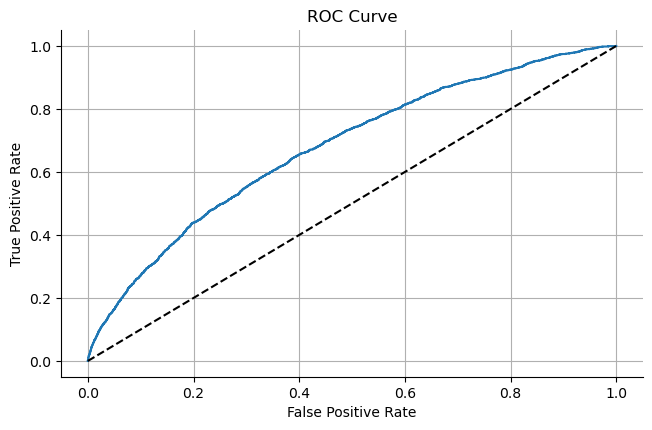

In [175]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Numeric / ordinal columns to scale
numeric_cols = [
    'time_in_hospital', 'num_lab_procedures', 'num_procedures',
    'num_medications', 'number_outpatient', 'number_emergency',
    'number_inpatient', 'number_diagnoses',
    'age_ord', 'A1Cresult_ord', 'max_glu_serum_ord', 'insulin_ord'
]

# All other columns: binary flags and one-hot encoded
other_cols = [c for c in X.columns if c not in numeric_cols]

# ColumnTransformer: scale numeric/ordinal, passthrough the rest
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('passthrough', 'passthrough', other_cols)
])

# Build pipeline
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', LogisticRegression(max_iter=1000, class_weight='balanced', solver='saga'))
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Fit model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


In [176]:
print(y.head(5))

0    0
1    0
2    0
3    0
4    0
Name: readmit_30, dtype: int32


In [177]:
import pandas as pd
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor

# -------------------------------
# Step 0: Identify numeric + ordinal columns for VIF
# -------------------------------
numeric_cols = [
    'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
    'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses'
]

ordinal_cols = [
    'age_ord', 'A1Cresult_ord', 'max_glu_serum_ord', 'insulin_ord'
]

# Combine
vif_features = numeric_cols + ordinal_cols

# -------------------------------
# Step 1: Impute missing values (if any)
# -------------------------------
X_vif = df_encoded[vif_features]
imputer = SimpleImputer(strategy='median')
X_vif_imputed = imputer.fit_transform(X_vif)

# -------------------------------
# Step 2: Convert back to DataFrame
# -------------------------------
X_vif_df = pd.DataFrame(X_vif_imputed, columns=vif_features)

# -------------------------------
# Step 3: Calculate VIF
# -------------------------------
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif_df.values, i) for i in range(X_vif_df.shape[1])]

print(vif_data)


               feature        VIF
0     time_in_hospital   4.361095
1   num_lab_procedures   6.724103
2       num_procedures   1.944407
3      num_medications   7.786584
4    number_outpatient   1.116107
5     number_emergency   1.140765
6     number_inpatient   1.397851
7     number_diagnoses  14.830361
8              age_ord  11.560988
9        A1Cresult_ord   1.279919
10   max_glu_serum_ord   1.076345
11         insulin_ord   1.918947


In [178]:
df_encoded = df_encoded.drop(columns=['number_diagnoses'])

In [179]:
import pandas as pd
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor

# -------------------------------
# Step 0: Identify numeric + ordinal columns for VIF
# -------------------------------
numeric_cols = [
    'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
    'number_outpatient', 'number_emergency', 'number_inpatient'
]

ordinal_cols = [
    'age_ord', 'A1Cresult_ord', 'max_glu_serum_ord', 'insulin_ord'
]

# Combine
vif_features = numeric_cols + ordinal_cols

# -------------------------------
# Step 1: Impute missing values (if any)
# -------------------------------
X_vif = df_encoded[vif_features]
imputer = SimpleImputer(strategy='median')
X_vif_imputed = imputer.fit_transform(X_vif)

# -------------------------------
# Step 2: Convert back to DataFrame
# -------------------------------
X_vif_df = pd.DataFrame(X_vif_imputed, columns=vif_features)

# -------------------------------
# Step 3: Calculate VIF
# -------------------------------
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif_df.values, i) for i in range(X_vif_df.shape[1])]

print(vif_data)


               feature       VIF
0     time_in_hospital  4.349232
1   num_lab_procedures  6.437899
2       num_procedures  1.941197
3      num_medications  7.434419
4    number_outpatient  1.109924
5     number_emergency  1.133547
6     number_inpatient  1.383240
7              age_ord  5.965144
8        A1Cresult_ord  1.279041
9    max_glu_serum_ord  1.076035
10         insulin_ord  1.894800


In [180]:
#df_encoded = df_encoded.drop(columns=['num_medications'])

In [181]:
# import pandas as pd
# from sklearn.impute import SimpleImputer
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# # -------------------------------
# # Step 0: Identify numeric + ordinal columns for VIF
# # -------------------------------
# numeric_cols = [
#     'time_in_hospital', 'num_lab_procedures', 'num_procedures', 
#     'number_outpatient', 'number_emergency', 'number_inpatient'
# ]

# ordinal_cols = [
#     'age_ord', 'A1Cresult_ord', 'max_glu_serum_ord', 'insulin_ord'
# ]

# # Combine
# vif_features = numeric_cols + ordinal_cols

# # -------------------------------
# # Step 1: Impute missing values (if any)
# # -------------------------------
# X_vif = df_encoded[vif_features]
# imputer = SimpleImputer(strategy='median')
# X_vif_imputed = imputer.fit_transform(X_vif)

# # -------------------------------
# # Step 2: Convert back to DataFrame
# # -------------------------------
# X_vif_df = pd.DataFrame(X_vif_imputed, columns=vif_features)

# # -------------------------------
# # Step 3: Calculate VIF
# # -------------------------------
# vif_data = pd.DataFrame()
# vif_data["feature"] = X_vif_df.columns
# vif_data["VIF"] = [variance_inflation_factor(X_vif_df.values, i) for i in range(X_vif_df.shape[1])]

# print(vif_data)


In [182]:
# List of payer_code columns
payer_cols = [
    'payer_code_CH',
    'payer_code_CM',
    'payer_code_CP',
    'payer_code_DM',
    'payer_code_FR',
    'payer_code_HM',
    'payer_code_MC',
    'payer_code_MD',
    'payer_code_MP',
    'payer_code_Missing',
    'payer_code_OG',
    'payer_code_OT',
    'payer_code_PO',
    'payer_code_SI',
    'payer_code_SP',
    'payer_code_UN',
    'payer_code_WC'
]

# Drop them from df_encoded
df_encoded = df_encoded.drop(columns=payer_cols)

In [183]:
df_encoded = df_encoded.drop(columns=['A1Cresult_missing', 'max_glu_serum_missing'])

In [184]:
# Cap time_in_hospital at 12
df_encoded['time_in_hospital'] = df_encoded['time_in_hospital'].clip(upper=12)

Accuracy: 0.559744513593187
Recall: 0.6956266510126211
Precision: 0.160416948693651
F1: 0.26071173202794123
ROC AUC: 0.6704638678653803


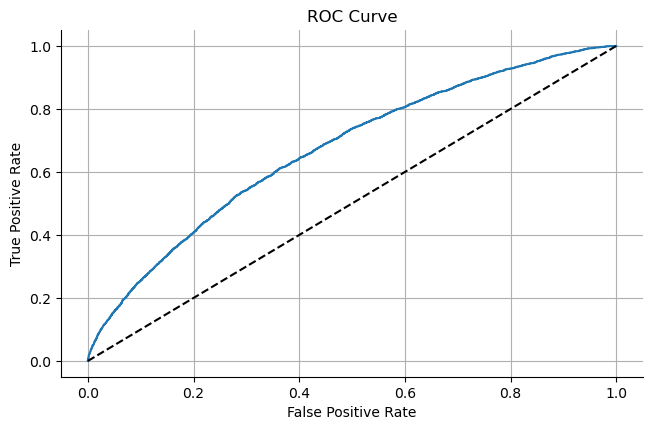

In [185]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# --------------------------
# Final X, y
# --------------------------
y = df_encoded[TARGET].copy()
X = df_encoded.drop(columns=[TARGET])

numeric_cols = [
    'time_in_hospital','num_lab_procedures', 'num_procedures',
    'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient',
    'age_ord', 'A1Cresult_ord', 'max_glu_serum_ord', 'insulin_ord'
]

other_cols = [c for c in X.columns if c not in numeric_cols]

# --------------------------
# Train/test split
# --------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# --------------------------
# ColumnTransformer & pipeline (L1 Regularization)
# --------------------------
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('passthrough', 'passthrough', other_cols)
])

pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', LogisticRegression(
        max_iter=2000,
        class_weight='balanced',
        solver='saga',
        penalty='l1',     # L1 regularization
        C=0.1           # regularization strength (lower = stronger)
    ))
])

# --------------------------
# Fit model
# --------------------------
pipeline.fit(X_train, y_train)

# --------------------------
# Predict & evaluate
# --------------------------
y_prob = pipeline.predict_proba(X_test)[:, 1]
y_pred = (y_prob > 0.45).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


## Model Testing

### Imports

In [190]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import root_mean_squared_error, log_loss, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, TargetEncoder, OrdinalEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

### Defined Tests

In [192]:
# param_dist = {
#     'n_estimators': randint(10, 200),
#     'max_depth': randint(1, 20),
#     'min_samples_split': randint(2, 11),
#     'min_samples_leaf': randint(1, 11),
#     'bootstrap': [True, False]
# }


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=67)


# def print_accuracy_precision_recall_f1_scores(y_test, y_pred):
#     # Tests to see how the model is: Overall Accuracy, Precision, Recall, F1.
#     overall_accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred)
#     recall = recall_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)

#     print(f"Accuracy: {overall_accuracy}")
#     print(f"Precision: {precision}")
#     print(f"Recall: {recall}")
#     print(f"F1 Score: {f1}")

# def generate_roc_curve(y_test, y_prob):
#     # Generate ROC Curve 
#     false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
#     plt.plot(false_positive_rate, true_positive_rate, label="ROC curve")
#     plt.plot([0, 1], [0, 1], 'k--')  
#     plt.xlabel("False Positive Rate")
#     plt.ylabel("True Positive Rate")
#     plt.title("ROC Curve")
#     plt.show()

#     # Area under the curve for ROC chart
#     roc_auc = roc_auc_score(y_test, y_prob)
#     print("ROC AUC:", roc_auc)


# def perform_random_under_sampling(X, y):
#     undersample_dataset = RandomUnderSampler(sampling_strategy='majority')
#     X_undersampled, y_undersampled = undersample_dataset.fit_resample(X, y)

#     print(y_undersampled.value_counts())

#     return X_undersampled, y_undersampled


# def perform_one_hot_encoding(inputX):
#     # Try one hot encoding for the labels and another encoding types.
#     one_hot_encoder = OneHotEncoder(sparse_output=False)
#     one_hot_encoded = one_hot_encoder.fit_transform(inputX)

#     return one_hot_encoded

# def run_target_encoder(inputX, inputY):
#     target_encoded = TargetEncoder(target_type="binary").fit_transform(X = inputX, y = inputY)

#     return target_encoded
    

# def run_ordinal_encoder(inputX):
#     for current_column in inputX.columns:
#         ordinal_encoder = OrdinalEncoder()
#         inputX[current_column] = ordinal_encoder.fit(inputX[[current_column]]).transform(inputX[[current_column]])
    
#     return inputX


# def run_min_max_scaler(inputX):
#     minmax_scaler = MinMaxScaler()
#     minmax_scaler.fit(X_train)
#     minmax_dataframe = minmax_scaler.fit_transform(inputX)
#     minmax_dataframe = pd.DataFrame(minmax_dataframe, columns=inputX.columns)

#     return minmax_dataframe

# def run_standard_scaler(inputX):
#     standard_scaler = StandardScaler()
#     standard_scaler_dataframe = standard_scaler.fit_transform(inputX)
#     standard_scaler_dataframe = pd.DataFrame(standard_scaler_dataframe, columns=inputX.columns)

#     return standard_scaler_dataframe

# def run_robust_scaler(inputX):
#     robust_scaler = RobustScaler()
#     robust_scaler_dataframe = robust_scaler.fit_transform(inputX)
#     robust_scaler_dataframe = pd.DataFrame(robust_scaler_dataframe, columns=inputX.columns)

#     return robust_scaler_dataframe


# def run_variance_inflation_factor_process(inputX):
#     vif_data = pd.DataFrame()
#     vif_data['Feature'] = inputX.columns
#     vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(inputX.shape[1])]
#     print(vif_data)


#     removed_vif_data = pd.DataFrame(columns=vif_data.columns)

#     for index, row in vif_data.iterrows():
#         next_index = len(removed_vif_data)

#         if (row['VIF'] > 5):
#             inputX.drop(row['Feature'], axis=1, inplace=True)
#             removed_vif_data.loc[next_index] = {'Feature':row['Feature'], 'VIF':row['VIF']}

#     print(removed_vif_data)


#     return inputX, removed_vif_data



# def run_Gaussian_NB(X, y, test_size=0.3, random_state_split=67):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state_split)

#     gaussian_nb = GaussianNB()
#     gaussian_nb.fit(X_train, y_train)
#     y_pred = gaussian_nb.predict(X_test)

#     print_accuracy_precision_recall_f1_scores(y_test, y_pred)

#     return gaussian_nb


# def try_Logistic_Regression(X, y, max_iter=5000, test_size=0.3, random_state_split=67):
#     # Split the data into training and test sets - 70% will be used for training and 30% will be used for testing 
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state_split)

#     # allow for a bunch of iterations
#     logRegressionModel = LogisticRegression(max_iter=max_iter) 

#     # train the model
#     logRegressionModel.fit(X_train, y_train)

#     # The model now makes predictions based on our X_test data
#     y_pred = logRegressionModel.predict(X_test)

#     # We also save the probabilities for each prediction so we can evaluate the model and our data
#     y_prob = logRegressionModel.predict_proba(X_test)[:, 1]

#     print_accuracy_precision_recall_f1_scores(y_test, y_pred)

#     generate_roc_curve(y_test, y_prob)

#     return logRegressionModel

# def try_randomized_search_cv(param_dist, X, y, n_estimators=100, max_depth=5, random_state_classifier=42, test_size=0.3, random_state_split=67):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state_split)

#     randomized_search = RandomizedSearchCV(
#         RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state_classifier),
#         param_distributions=param_dist,
#         n_iter=100,
#         cv=5,
#         scoring='accuracy', 
#         n_jobs=-1
#     )

#     # train the model
#     randomized_search.fit(X_train, y_train)

#     # The model now makes predictions based on our X_test data
#     y_pred = randomized_search.predict(X_test)

#     # We also save the probabilities for each prediction so we can evaluate the model and our data
#     y_prob = randomized_search.predict_proba(X_test)[:, 1]

#     print_accuracy_precision_recall_f1_scores(y_test, y_pred)

#     generate_roc_curve(y_test, y_prob)

#     return randomized_search


# def run_gradient_boosting_classifier(X, y, n_estimators=100, learning_rate=1.0, max_depth=1, random_state_classifier=42, test_size=0.3, random_state_split=67):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state_split)
    
#     gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, random_state=random_state_classifier)
#     gradient_boosting_classifier.fit(X_train, y_train)
#     y_pred = gradient_boosting_classifier.predict(X_test)

#     print_accuracy_precision_recall_f1_scores(y_test, y_pred)

#     return gradient_boosting_classifier

# def run_multiple_gradient_boosting_classifier(X, y, n_estimators_list=[100, 200, 500, 1000, 5000, 10000], learning_rate_list=[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0], max_depth=1, random_state_classifier=42, test_size=0.3, random_state_split=67):
#     for current_n_estimator in n_estimators_list:
#         for current_learning_rate in learning_rate_list:
#             print(f"Current n estimator: {current_n_estimator}")
#             print(f"Current learning rate: {current_learning_rate}")
#             run_gradient_boosting_classifier(X, y, n_estimators=current_n_estimator, learning_rate=current_learning_rate, max_depth=max_depth, random_state_classifier=random_state_classifier, test_size=test_size, random_state_split=random_state_split)
#             print("")
#         print("")


# def run_k_fold_cross_validation_Logistic_regression(X, y, Cs=[0.001, 0.01, 0.1, 0.3, 1.0, 3.0, 10.0, 30.0, 100.0], n_splits=5, shuffle=True, random_state_kf=42, max_iter=5000, test_size=0.3, random_state_split=67):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state_split)
    
#     kf = KFold(n_splits=n_splits, shuffle=shuffle, random_state=random_state_kf)

#     rows = []
#     for C in Cs:
#         m = LogisticRegression(max_iter=max_iter, C=C)
#         scores = cross_val_score(m, X, y, cv=kf, scoring="neg_log_loss")
#         rows.append((C, -scores.mean(), scores.std()))
#     cv_logit = pd.DataFrame(rows, columns=["C", "cv_logloss_mean", "cv_logloss_std"]).sort_values("C")
#     best_idx_L = int(np.argmin(cv_logit["cv_logloss_mean"].values))
#     best_C = cv_logit.iloc[best_idx_L]["C"]
#     print("\n=== Logistic CV (Breast Cancer; 5-fold) ===")
#     print(cv_logit.to_string(index=False, float_format=lambda v: f"{v:.4f}"))
#     print(f"Best C: {best_C}")

#     # Bar plot: mean CV Log Loss by C
#     plt.figure(figsize=(7,4))
#     labels = [str(c) for c in cv_logit["C"]]
#     heights = cv_logit["cv_logloss_mean"].values
#     errs    = cv_logit["cv_logloss_std"].values
#     colors  = ["#888888"] * len(labels)
#     colors[best_idx_L] = "#1f77b4"
#     plt.bar(labels, heights, yerr=errs, capsize=4, color=colors)
#     plt.title("Logistic 5-fold CV — Mean Log Loss by C (lower is better)")
#     plt.xlabel("C (inverse of L2 strength)")
#     plt.ylabel("Mean CV Log Loss")
#     plt.annotate(f"best C = {best_C}",
#                 xy=(best_idx_L, heights[best_idx_L]),
#                 xytext=(best_idx_L, heights[best_idx_L] + (heights.max()-heights.min())*0.08),
#                 ha="center", arrowprops=dict(arrowstyle="->"))
#     plt.show()

#     # Refit Logistic with best C and evaluate on test
#     logit_best = LogisticRegression(max_iter=max_iter, C=best_C).fit(X_train, y_train)
#     best_acc = accuracy_score(y_test, logit_best.predict(X_test))
#     best_auc = roc_auc_score(y_test, logit_best.predict_proba(X_test)[:,1])
#     best_ll  = log_loss(y_test, logit_best.predict_proba(X_test)[:,1])
#     print(f"Logistic (best C) — Test Accuracy: {best_acc:.3f} | ROC–AUC: {best_auc:.3f} | Log Loss: {best_ll:.3f}")

#     return logit_best


# def run_random_forest_classifier(X, y, n_estimators=100, max_depth=5, random_state_classifier=42, test_size=0.3, random_state_split=67):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state_split)

#     # Create the model
#     randomForestModel = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state_classifier)

#     # train the model
#     randomForestModel.fit(X_train, y_train)

#     # The model now makes predictions based on our X_test data
#     y_pred = randomForestModel.predict(X_test)

#     # We also save the probabilities for each prediction so we can evaluate the model and our data
#     y_prob = randomForestModel.predict_proba(X_test)[:, 1]

#     print_accuracy_precision_recall_f1_scores(y_test, y_pred)

#     generate_roc_curve(y_test, y_prob)


# def run_k_fold_cross_validation_Ridge_regression(X, y, list_of_alphas=[0.001, 0.01, 0.1, 0.3, 1.0, 3.0, 10.0, 30.0, 100.0], n_splits=5, shuffle=True, random_state_kf=42, test_size=0.3, random_state_split=67):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state_split)
    
#     best_MSE = None
#     all_scores = []
#     all_MSEs_means = []
#     all_MSEs_std = []

#     kf = KFold(n_splits=n_splits, shuffle=shuffle, random_state=random_state_kf)

#     for i in range(len(list_of_alphas)):
#         current_alpha = list_of_alphas[i]

#         current_ridge_regressor = Ridge(alpha=current_alpha)

#         current_MSEs = cross_val_score(current_ridge_regressor, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

#         current_MSEs_mean = -current_MSEs.mean()
#         current_MSEs_std = current_MSEs.std()

#         all_scores.append(current_MSEs)
#         all_MSEs_means.append(current_MSEs_mean)
#         all_MSEs_std.append(current_MSEs_std)
        
#         if (best_MSE == None):
#             best_MSE = (current_alpha, current_MSEs_mean, current_MSEs_std)
#         else:
#             if (best_MSE[1] > current_MSEs_mean):
#                 best_MSE = (current_alpha, current_MSEs_mean, current_MSEs_std)


#     arranged_x_axis = np.arange(len(list_of_alphas))

#     fig, ax = plt.subplots()
#     plt.title('5-fold Cross Validation for Ridge — Mean MSE by Alpha')
#     bars = ax.bar(arranged_x_axis, all_MSEs_means, yerr = all_MSEs_std, width=0.8)
#     ax.set_xticks(arranged_x_axis)
#     ax.set_xticklabels(list_of_alphas)

#     print(best_MSE)

#     count = 0
#     for bar in bars:
#         if (all_MSEs_means[count] == best_MSE[1]):
#             plt.annotate(
#                 f'Best α = {best_MSE[0]}',
#                 xy=(bar.get_x() + (bar.get_width() / 2), bar.get_height()),
#                 xytext=(bar.get_x() + (bar.get_width() / 2), all_MSEs_std[count]),
#                 arrowprops=dict(facecolor='black', shrink=0.05),
#                 fontsize=10,
#                 color='black'
#             )
#         count += 1
#     plt.xlabel('Alphas')
#     plt.ylabel('Mean MSEs from Cross Validation')
#     plt.show()


#     best_ridge_regressor = Ridge(alpha=best_MSE[0]).fit(X_train, y_train)
#     y_pred = best_ridge_regressor.predict(X_test)
#     ridge_rmse = root_mean_squared_error(y_test, y_pred)
#     ridge_mse = mean_squared_error(y_test, y_pred)
#     ridge_mae = mean_absolute_error(y_test, y_pred)
#     print(f"Best Ridge:\nRidge RMSE score = {ridge_rmse}\nRidge MSE score = {ridge_mse}\nRidge MAE score = {ridge_mae}\n")

#     return best_ridge_regressor


# def run_SVM(X, y, chosen_kernel='linear', input_probability=True, svc_random_state=42, test_size=0.3, random_state_split=67):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state_split)

#     # Create the model
#     svm_model = SVC(kernel=chosen_kernel, probability=input_probability, random_state=svc_random_state)

#     # train the model
#     svm_model.fit(X_train, y_train)

#     # The model now makes predictions based on our X_test data
#     y_pred = svm_model.predict(X_test)

#     # We also save the probabilities for each prediction so we can evaluate the model and our data
#     y_prob = svm_model.predict_proba(X_test)[:, 1]
    
#     print_accuracy_precision_recall_f1_scores(y_test, y_pred)

#     generate_roc_curve(y_test, y_prob)

#     return svm_model


# def run_models_non_SVM(X, y, param_dist, Cs, list_of_alphas):
#     print("Lostistic Regression:")
#     try_Logistic_Regression(X, y)
#     print("\n\nGaussian Naive Bayes:")
#     run_Gaussian_NB(X, y)
#     print("\n\nRandomized Search Cross Validation:")
#     try_randomized_search_cv(param_dist, X, y)
#     print("\n\nGradient Boosting Classifiers:")
#     run_multiple_gradient_boosting_classifier(X, y)
#     print("\n\nK-Fold Cross Validation with Logistic Regression:")
#     run_k_fold_cross_validation_Logistic_regression(X, y, Cs)
#     print("\n\nRandom Forest Classifier:")
#     run_random_forest_classifier(X, y)
#     print("\n\nK-Fold Cross Validation with Ridge Regression:")
#     run_k_fold_cross_validation_Ridge_regression(X, y, list_of_alphas)

# def run_models_SVM(X, y):
#     print("\n\nRun Linear Kernel SVM:")
#     run_SVM(X, y, chosen_kernel='linear')
#     print("\n\nRun Polynomial Kernel SVM:")
#     run_SVM(X, y, chosen_kernel='poly')
#     print("\n\nRun Rbf (Gaussian) Kernel SVM:")
#     run_SVM(X, y, chosen_kernel='rbf')
#     print("\n\nRun Sigmoid Kernel SVM:")
#     run_SVM(X, y, chosen_kernel='sigmoid')

In [193]:
# Cs = [0.001, 0.01, 0.1, 0.3, 1.0, 3.0, 10.0]
# list_of_alphas = [0.001, 0.01, 0.1, 0.3, 1.0, 3.0, 10.0]

# X = DiabetesDF.iloc[:, 2:-1]   # all rows, columns 2 to the rest except the last
# y = DiabetesDF.iloc[:, -1]    # all rows, only the last column

### Tests With Entire Dataset

#### Unmodified Dataset

In [196]:
# run_models_non_SVM(X, y, param_dist, Cs, list_of_alphas)

A high accuracy but a very low precision, recall, and f1 score all being 0 means the dataset is extremely imbalanced and likely predicting the majority class (which is 0).

#### Dataset with Min Max Scaler

In [199]:
# run_models_non_SVM(run_min_max_scaler(X), y, param_dist, Cs, list_of_alphas)

#### Dataset with Standard Scaler

In [201]:
# run_models_non_SVM(run_standard_scaler(X), y, param_dist, Cs, list_of_alphas)

#### Dataset with Robust Scaler

In [203]:

# run_models_non_SVM(run_robust_scaler(X), y, param_dist, Cs, list_of_alphas)

#### Dataset with One Hot Encoding

In [205]:
# run_models_non_SVM(perform_one_hot_encoding(X), y, param_dist, Cs, list_of_alphas)

#### Dataset with Target Encoder

In [207]:
# run_models_non_SVM(run_target_encoder(X, y), y, param_dist, Cs, list_of_alphas)

#### Dataset with Ordinal Encoder

In [209]:

# run_models_non_SVM(run_ordinal_encoder(X), y, param_dist, Cs, list_of_alphas)

### Test With Undersampled Dataset

#### Unmodified Dataset

In [212]:
# X_undersampled, y_undersampled = perform_random_under_sampling(X, y)
# run_models_non_SVM(X_undersampled, y_undersampled, param_dist, Cs, list_of_alphas)

#### Dataset with Min Max Scaler

In [214]:
# run_models_non_SVM(run_min_max_scaler(X_undersampled), y_undersampled, param_dist, Cs, list_of_alphas)

#### Dataset with Standard Scaler

In [216]:
# run_models_non_SVM(run_standard_scaler(X_undersampled), y_undersampled, param_dist, Cs, list_of_alphas)

#### Dataset with Robust Scaler

In [218]:
# run_models_non_SVM(run_robust_scaler(X_undersampled), y_undersampled, param_dist, Cs, list_of_alphas)

#### Dataset with One Hot Encoding

In [220]:
# run_models_non_SVM(perform_one_hot_encoding(X_undersampled), y_undersampled, param_dist, Cs, list_of_alphas)

#### Dataset with Target Encoder

In [222]:
# run_models_non_SVM(run_target_encoder(X_undersampled, y_undersampled), y_undersampled, param_dist, Cs, list_of_alphas)

#### Dataset with Ordinal Encoder

In [224]:
# run_models_non_SVM(run_ordinal_encoder(X_undersampled), y_undersampled, param_dist, Cs, list_of_alphas)

## Creating the Encoded CSV Files and Text Information Files

In [226]:
# print("Outputting information to text files.")
# final_output_string_1 = (
#     "Below, please find a list of the unique elements in each column along with how many unique elements there are.\n\n\n"
#     f"{list_of_unique_and_nunique}\n\n"
# )
# final_output_string_2 = (
#     "Introductory Info:\n"
#     "This file: Information on the modifications done to the diabetic_data.csv file and why they were done.\n"
#     "unique_information.txt: A list of unique elements in each column along with how many unique elements there are.\n"
#     "output.csv: A version of diabetic_data.csv modified with the edits described in this file.\n"
#     "output_grouped.csv: A version of output.csv where everything has been grouped together based on patient_nbr.\n"
#     "Percentages for the amount of missing elements for some of the columns can be found here: https://onlinelibrary.wiley.com/doi/10.1155/2014/781670\n\n\n\n\n"
#     "Modifications to diabetic_data.csv:\n\n\n"
#     f"{check_duplicates_in_first_two}\n\n"
#     f"{replacing_race_with_integers}\n\n"
#     f"{replacing_gender_with_integers}\n\n"
#     f"{replace_age_categories_with_integers}\n\n"
#     f"{removing_weight_column}\n\n"
#     f"{condensed_insurance_information}\n\n"
#     f"{replacing_medical_specialty_with_integers}\n\n"
#     f"{replacing_diagnoses_codes_with_integers}\n\n"
#     f"{replacing_medication_used_indication_with_integers}\n\n"
#     f"{replacing_max_glu_serum_with_integers}\n\n"
#     f"{replacing_A1Cresult_with_integers}\n\n"
#     f"{replacing_change_with_integers}\n\n"
#     f"{replacing_diabetesMed_with_integers}\n\n"
#     f"{replacing_readmitted_with_integers}"
# )

In [227]:
# # Save unique element and count information to text file.
# with open("unique_information.txt", 'w') as file:
#     file.write(final_output_string_1)
# # Save explanation information to text file.
# with open("explanation_information.txt", 'w') as file:
#     file.write(final_output_string_2)
# print("Information outputted to text file.")

In [228]:
# # Create modified csv file from resulting dataframe.
# print("Outputting modified csv file.")
# DiabetesDF.to_csv(os.path.join(file_save_loaction, 'output.csv'), index=False)
# print("Modified csv file outputted.")

In [229]:
# # Group resulting dataframe by the 'patient_nbr' column.
# print("Starting Grouping")
# tqdm.pandas()
# # https://stackoverflow.com/questions/60963409/creating-a-dictionary-of-dictionaries-from-groupby
# DiabetesDF_grouped = DiabetesDF.groupby('patient_nbr')
# group_of_groups = DiabetesDF_grouped.progress_apply(lambda x: x.set_index('encounter_id').to_dict())
# print("Grouping Done")

In [230]:
# # Create grouped csv file from the grouped dataframe.
# print("Outputting grouped version of modified csv file.")
# group_of_groups.to_csv(os.path.join(file_save_loaction, 'output_grouped.csv'), index=False)
# print("Grouped version of modified csv file outputted.")